In [1]:
include("/Users/fernandopenaranda/Dropbox/Sync/ShiftCurrents_in_tBLG/src/ShiftCurrents_in_tBLG.jl") # continuum
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/HF_Optics.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_module.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/sublattice_masses.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_compute.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_linear_conductivity.jl")

k_in_plane_bindependent_conductivity_integrand (generic function with 1 method)

In [2]:
using CairoMakie
CairoMakie.disable_mime!("svg", "pdf", "text/html")

#### Plotters

In [3]:
function BZdecorations!(p, ax)
    G1, G2 = bravais_vectors(p);     
    K1 =  κ(G1, G2)
    K2 =  κ(G2, G1)
    scatter!(ax, K1[1], K1[2], color = :red, marker = :x, markersize = 10)
    scatter!(ax, K2[1], K2[2], color = :blue, marker = :x, markersize = 10)
    scatter!(ax, K1[1]-G1[1], K1[2]-G1[2], color = :red, marker = :x, markersize = 10)
    scatter!(ax, K1[1]-G2[1]-G1[1], K1[2]-G2[2]-G1[2], color = :red, marker = :x, markersize = 10)
    scatter!(ax, K1[1]-G2[1], K1[2]-G2[2], color = :red, marker = :x, markersize = 10)
    scatter!(ax, K2[1]-G2[1], K2[2]-G2[2], color = :blue, marker = :x, markersize = 10)
    scatter!(ax, K2[1]-G1[1]-G2[1], K2[2]-G1[2]-G2[2], color = :blue, marker = :x, markersize = 10)
    scatter!(ax, [0, G1[1],G2[1],-G1[1],-G2[1],G1[1]+G2[1],-G1[1]-G2[1]], 
             [0,G1[2],G2[2],-G1[2],-G2[2],G1[2]+G2[2],-G1[2]-G2[2]], 
            color = :black, marker = :x, markersize = 10)
    lines!(ax, [0, G1[1], G1[1]+G2[1], G2[1] , 0], 
             [0, G1[2],  G1[2]+G2[2], G2[2] , 0], 
            color = :black, linestyle = :dash)
end

BZdecorations! (generic function with 1 method)

### Presets

Note vp and v are multiplied by a0 in the HF presets, this is beacause k is divided by a0 in the model description.
λ has units (is artificially multiplied by a0) ,the real value has to be divided by a0.
Note that in hf_velocities we do not have to change anything.

#### Presets both continuum and Heavy fermion model

In [10]:
pBM = ParamsBM(paramsBM(1.05, 3,  1), mass = .0);
p = ParamsHF(paramsHF(1.05, 1,  1),
μ = 0,
nf = 1,
λ = 120,
M = 3.697,
v = -4.303e3*a0,
vp = 1.622e3*a0,
γ = -20,
layerz = 0,
sigmaz = 0.,
sigmazlayerz = 0,
U1 = 0,
U2 = 0,   
J = 0,
VP =true,
twovalleystwospins= true);

### Bands

##### Non interacting Bands: Heavy Fermion model

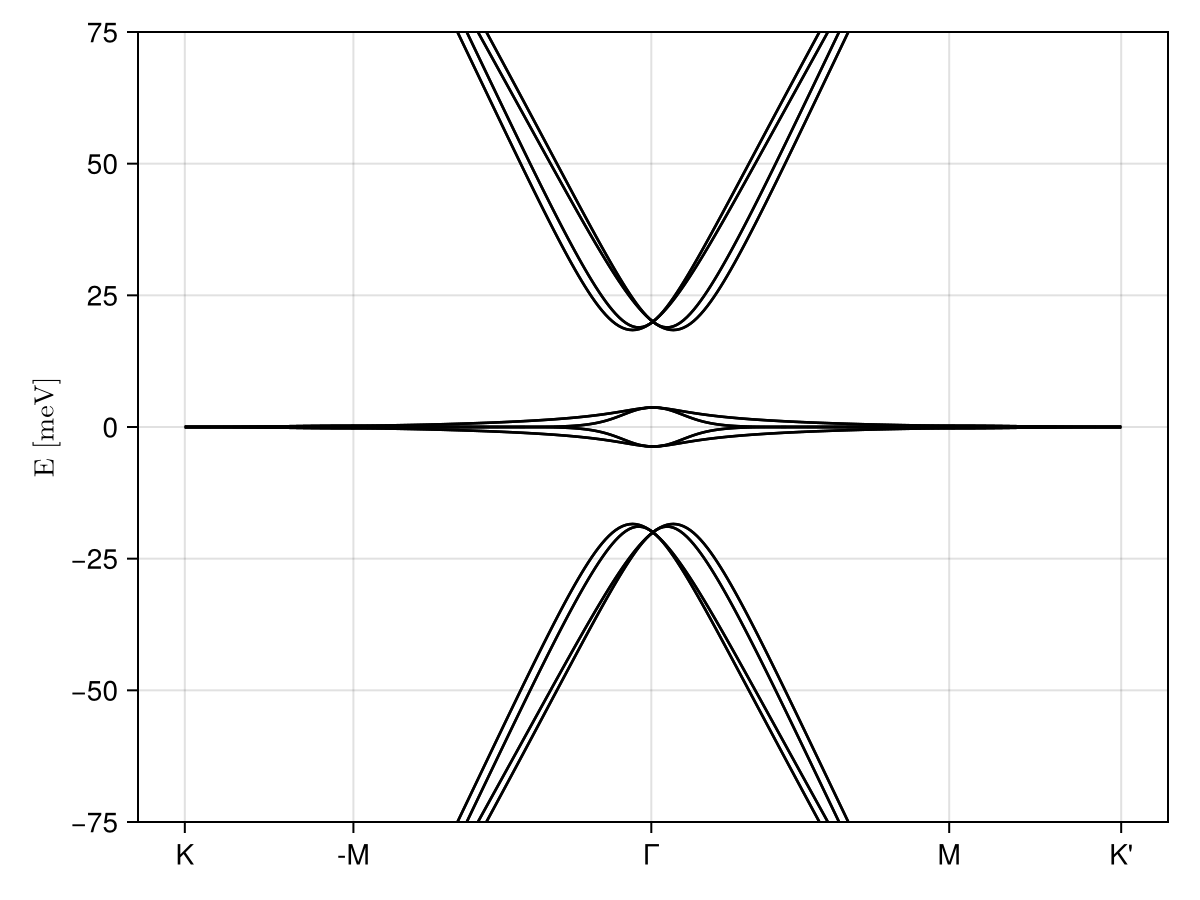

In [12]:
with_theme(CairoMakie=(px_per_unit = 2.0,)) do
    fig1 = Figure(); 
    ax1 = Axis(fig1[1,1], ylabel = L"$\text{E [meV]}$") ;
    plotmybands!(ax1, real.(bands(ParamsHF(p, μ = 0, sigmaz = 0), 0 .* [1,0,1,0,1,0,1,0], 101)),
    ylimits = [-75,75], color = :black); 
    fig1
end

In [ ]:
of = diagm(0.5.*ones(8)) 
of = diagm([1,0,1,0,1,0,1,0]) 
μ = 0
#hf_plotbands(p, of, kpoints = 101, res = (1.5*600,1.5*400))
hf_plotbands(ParamsHF(p, μ = μ), of, kpoints = 101, res = (600,400))


#### Bands in the continuum

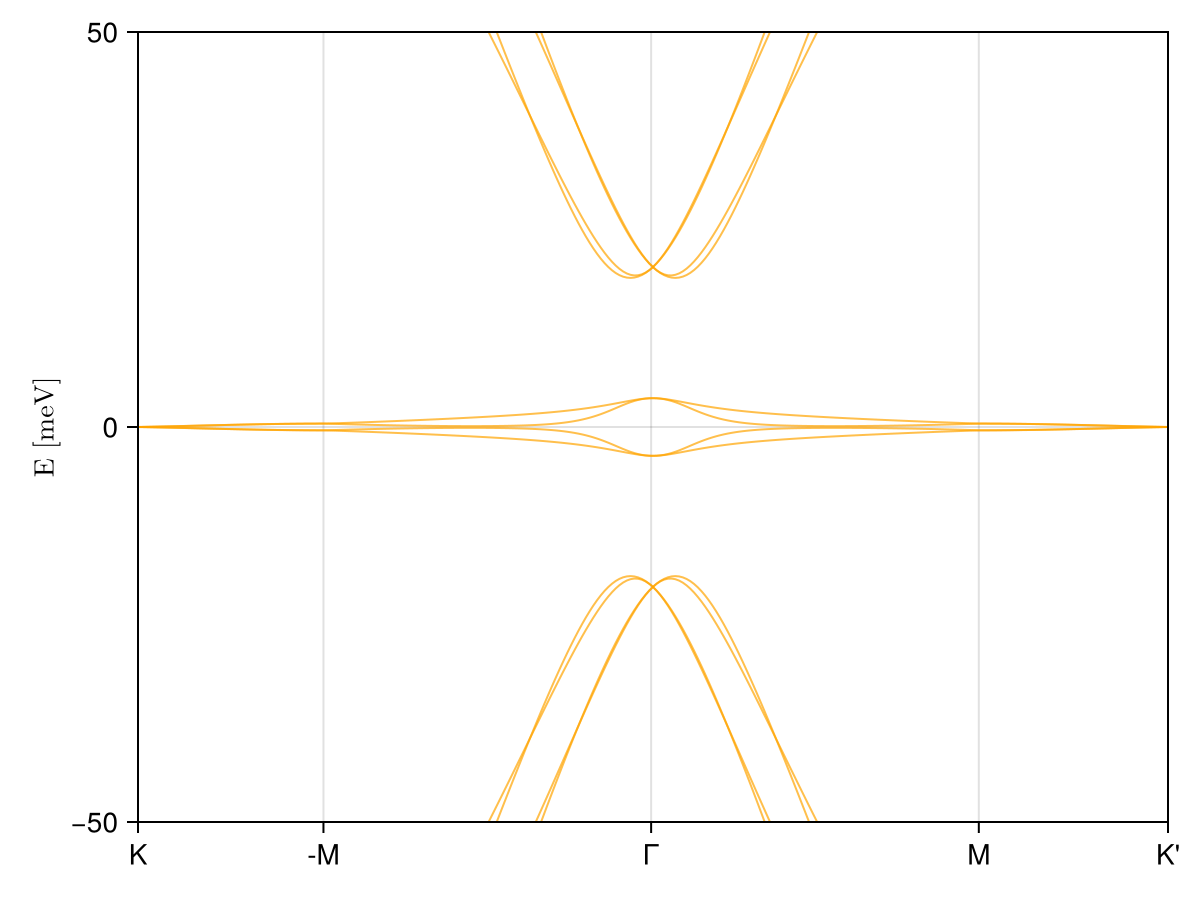

In [311]:

with_theme(CairoMakie=(px_per_unit = 5.0,)) do
    fig1 = Figure(); 
    ax1 = Axis(fig1[1,1], ylabel = L"$\text{E [meV]}$") ;
    compute_bands_continuum!(p, pBM, ax1, ylimits = [-50,50])
    fig1
end

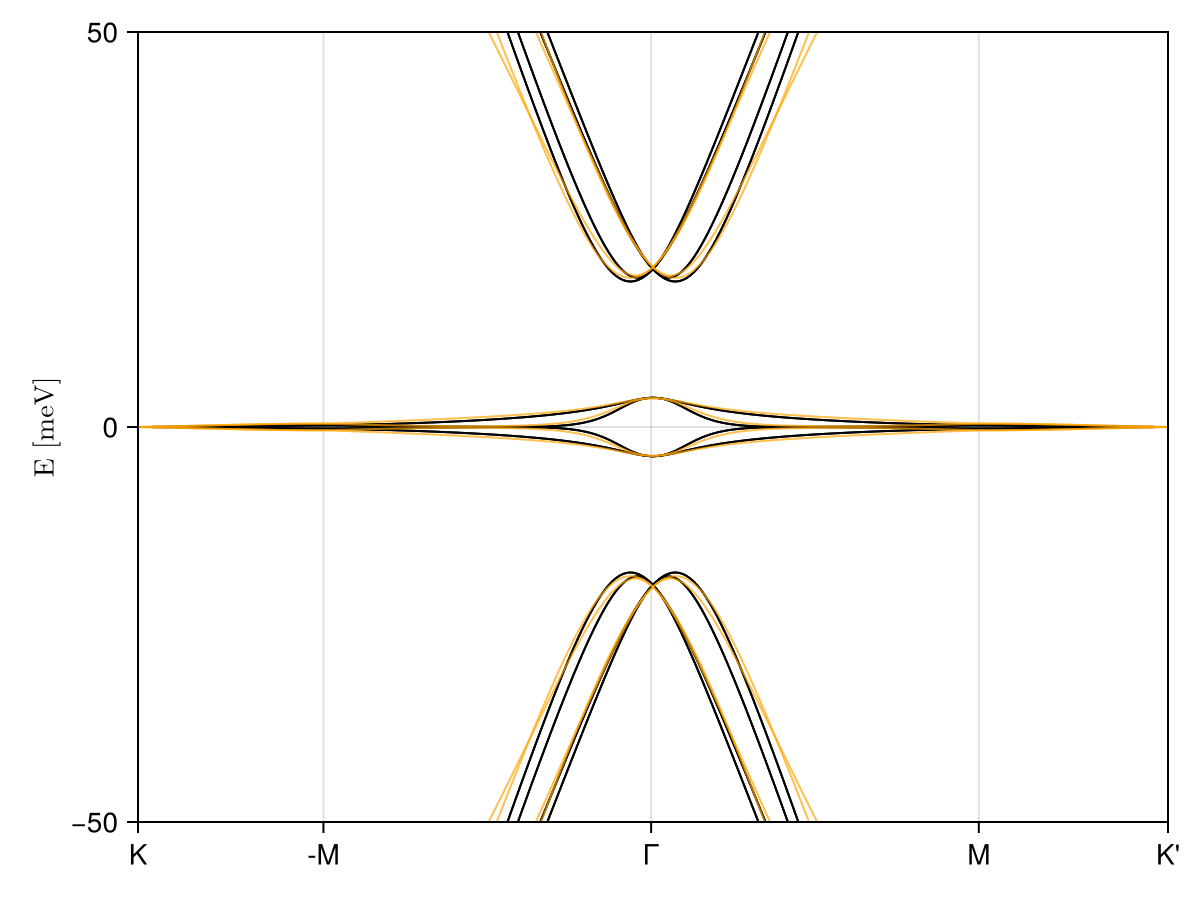

In [312]:
with_theme(CairoMakie=(px_per_unit = 5.0,)) do
    fig1 = Figure(); 
    ax1 = Axis(fig1[1,1], ylabel = L"$\text{E [meV]}$") ;
    plotmybands!(ax1, real.(bands(ParamsHF(p, μ = 0, sigmaz = 0), ones(8), 101)),
        ylimits = [-50,50], color = :black); 
    compute_bands_continuum!(p, pBM, ax1, ylimits = [-50,50]);
    fig1
end

#### Self-consistent bands Heavy Fermion

In [321]:
config = SelfConsistency_config_random(1e-6, 4, 1, 1, 200)
filling = -2.5
sof, sμ, se = guided_sweep(:β, p, config, [filling])
sd = Self_consistent_data(sof, sμ, se, filling) # raw solution
svp, sqah = generate_vp_aqh_solutions(sd)

Progress: 0.0%
0.. Rand seed: 1
 1.. It: 1 with Of: [0.1056, 0.0959, 0.1682, 0.124, 0.1347, 0.0666, 0.1877, 0.3656]
 2.. It: 2 with Of: [0.1844, 0.1831, 0.2566, 0.2347, 0.1883, 0.1792, 0.3291, 0.8246]
 3.. It: 3 with Of: [0.1044, 0.1043, 0.1513, 0.1427, 0.1045, 0.1042, 0.6841, 0.921]
 4.. It: 4 with Of: [0.104, 0.104, 0.105, 0.1047, 0.104, 0.104, 0.7444, 0.8822]
energy: -13122.979282131979
 TIME: 101505 milliseconds
Energy without penalities:-13122.979282131979


(Self_consistent_data([[0.7443899694711797, 0.8821804872125907, 0.10396515690425956, 0.10395826892100103, 0.10498368507135827, 0.10473976729049223, 0.10396221978911385, 0.10396123470016812]], Any[-16.516909984679614], Any[-13122.979282131979], -2.5), Self_consistent_data([[0.7443899694711797, 0.8821804872125907, 0.10396515690425956, 0.10395826892100103, 0.10498368507135827, 0.10473976729049223, 0.10396221978911385, 0.10396123470016812]], Any[-16.516909984679614], Any[-13122.979282131979], -2.5))

In [ ]:
Generate the valley polarized and quantum anomalous hall degen density matrices.

Self consistent Plots

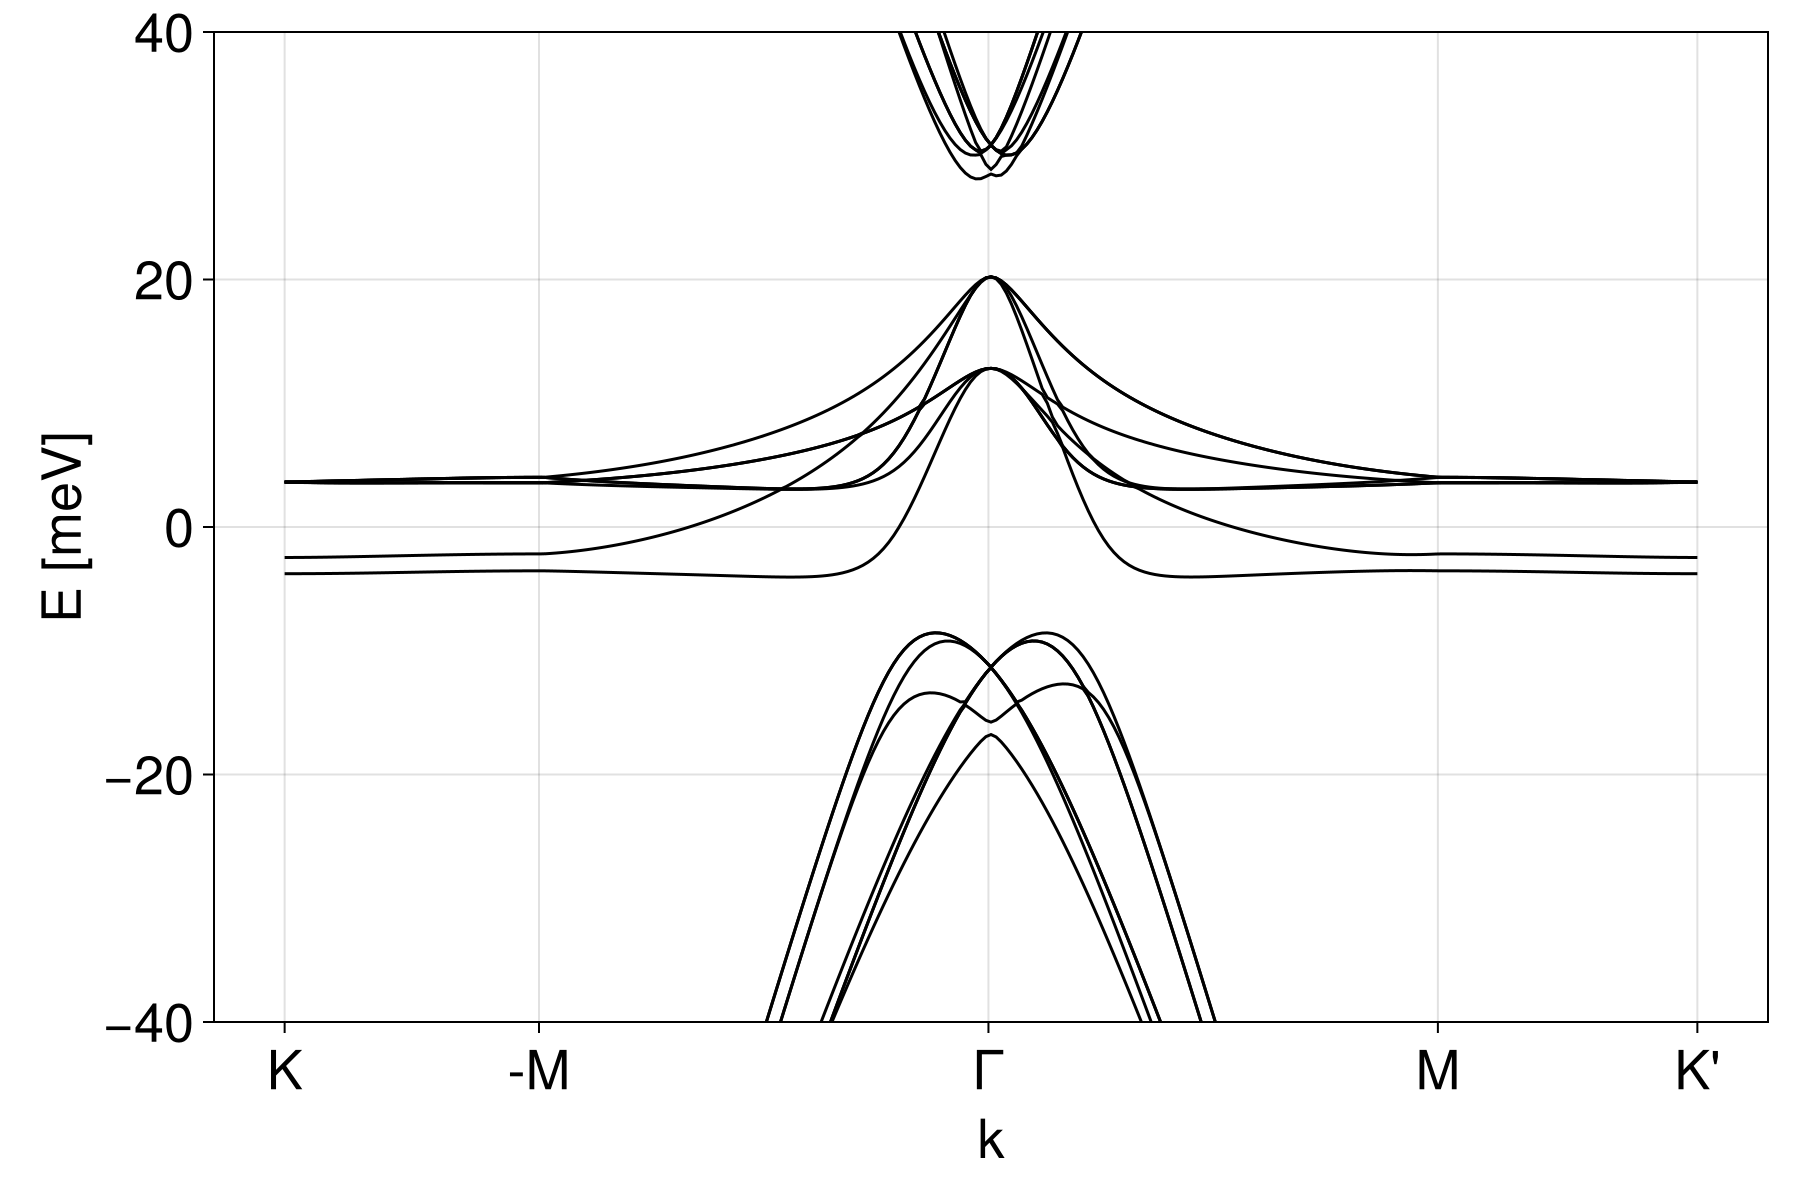

In [334]:
hf_plotbands(ParamsHF(p, μ = svp.mus[1]), diagm(sqah.ofmats[1]), kpoints = 101, res = (1.5*600,1.5*400), ylims = [-15,15])
# hf_plotbands(ParamsHF(p, μ = -2), diagm([1,1,1,1,0,0,0,0]), kpoints = 101, res = (1.5*600,1.5*400), ylims = [-15,15])


### Sublattice masses in the two models:

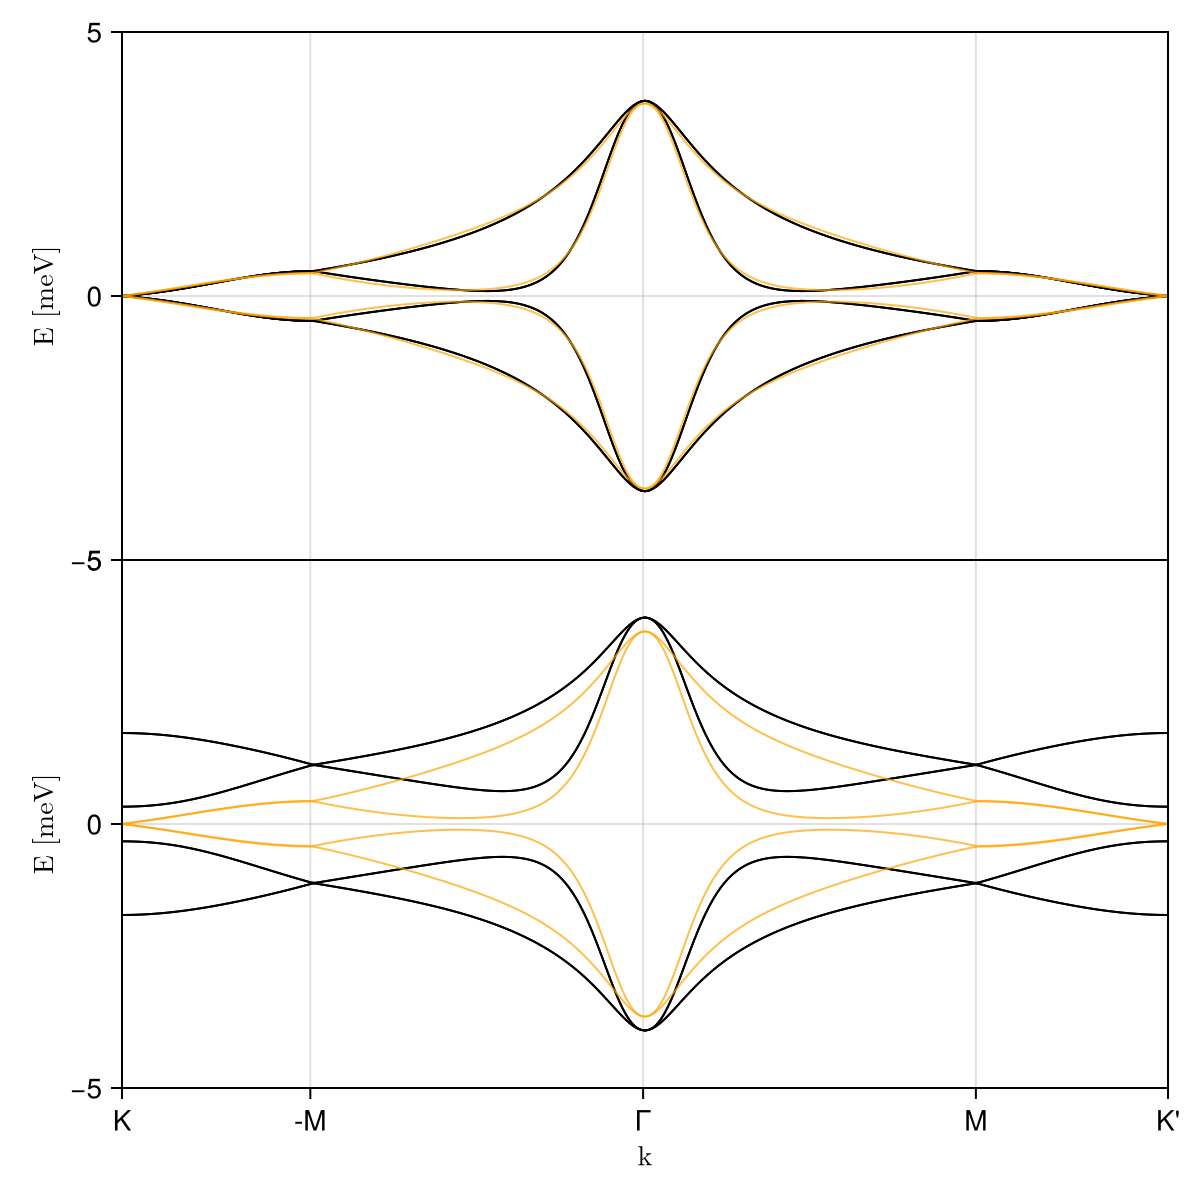

In [23]:
fig = two_plots_sublattice(ParamsHF(p, γ = -24.75,λ = 92, v= -a0*4.303e3, vp =  a0*1.622e3), pBM);
fig

### In-plane Berry

In [ ]:
Summed over all states at the fermi level, they might be degenerate leading to cancellations

In [213]:
# Define number of grid points
# RUN Self-consistent bands Heavy Fermion section
integrand(q) = k_inplaneberry(:x, ParamsHF(p, μ = sd.mus[1]), q, diagm(sd.ofmats[1]); T = 0.1)
M, xmin, xmax = int_boundaries(p)
a = [-xmax[1], xmin[2]];
b = [xmax[1], xmax[2]];

n = 50  # resolution (100x100 grid)
# Generate grid points
x = range(a[1], b[1], length=n)
y = range(a[2], b[2], length=n)


# Evaluate f on the grid
Zb = [integrand([xi, yi]) for xi in x, yi in y];  # notice: [row, column] ordering

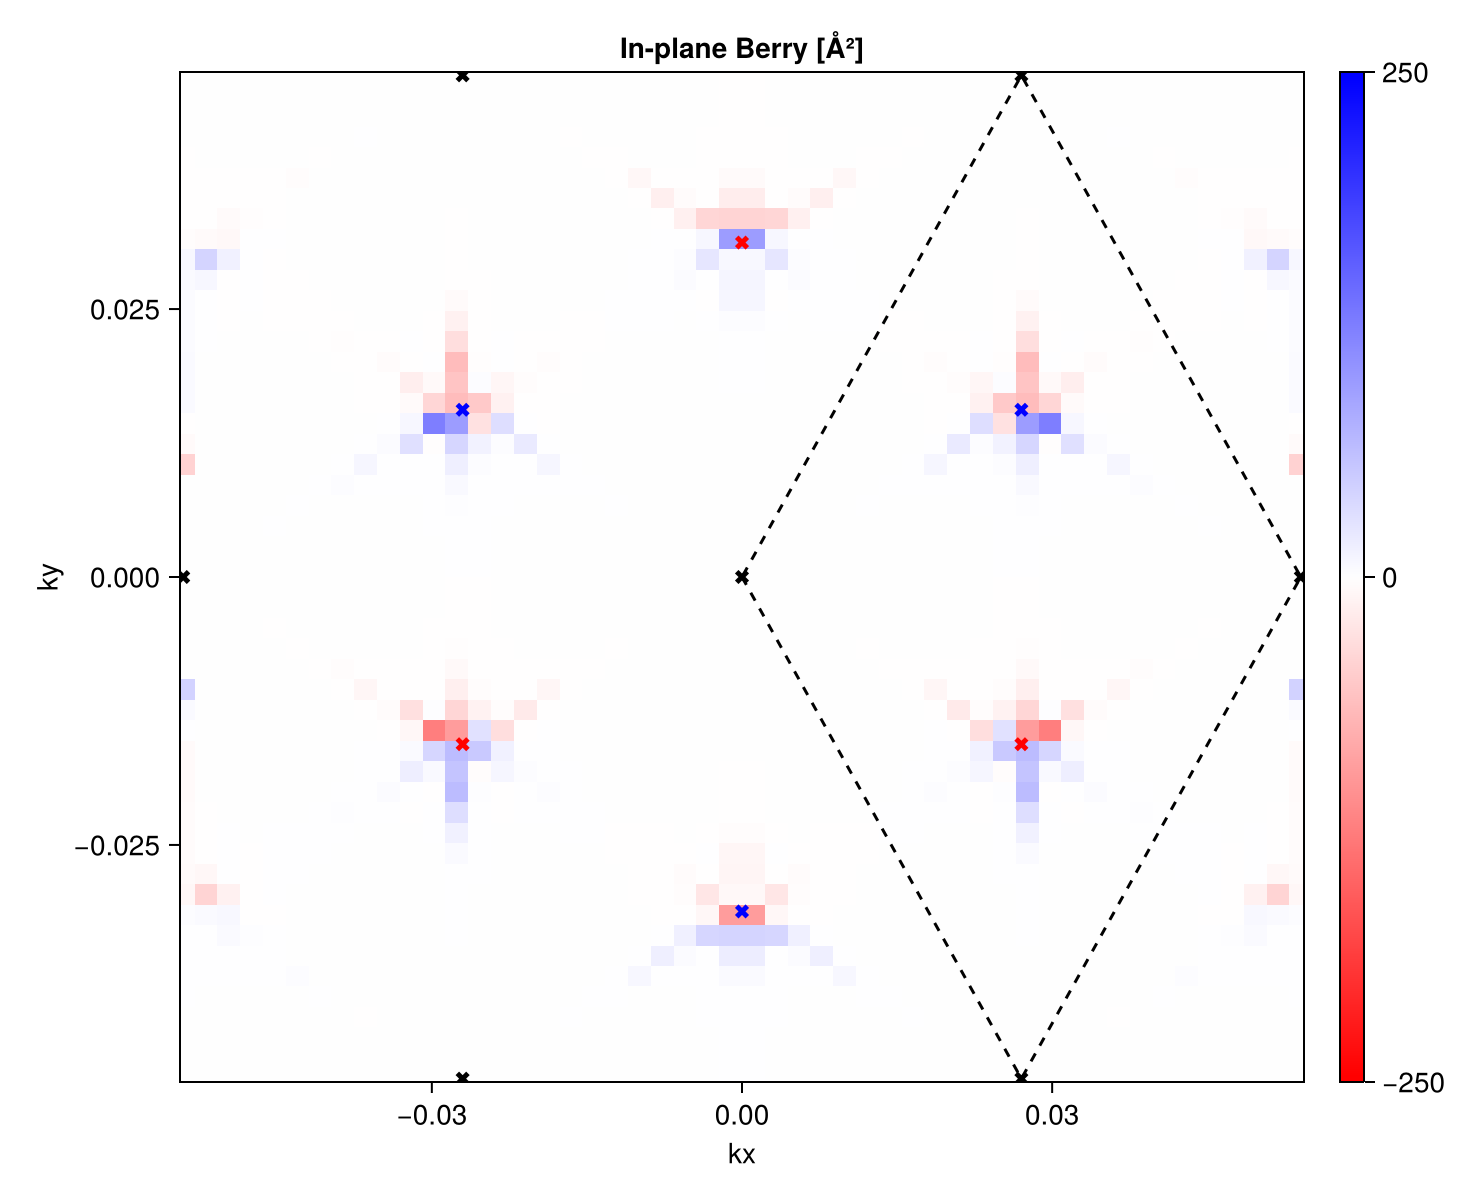

In [ ]:

# Create the density plot
vis = 250
fig = Figure(size=(1.23*600,600))
ax = Axis(fig[1, 1], xlabel="kx", ylabel="ky", title="LMC")
# heatmap!(ax, x, y, Z, colormap=:redsblues)#, colorrange=(-1, 1.0).*vis)
cmap = cgrad([:red, :white, :blue])
hm = heatmap!(ax, x, y, real(Zb), colormap=cmap, colorrange=(-1, 1.0).*vis)
BZdecorations!(p, ax)
# Colorbar(fig[1,2], ax)  # Add a colorbar
cb = Colorbar(fig[1, 2], hm)
xlims!(ax, a[1]-ϵ, b[1]+ϵ)
ylims!(ax, a[2]-ϵ, b[2]+ϵ)
fig

#### In plane berry along the x direction for the eigenvalue l \in 1:8 at the fermi level

In [228]:
# Define number of grid points
# RUN Self-consistent bands Heavy Fermion section
l = 3
integrand(q) = k_inplaneberry(:x, ParamsHF(p, μ = sd.mus[1]), q, diagm(sd.ofmats[1]), l; T = 0.1)
M, xmin, xmax = int_boundaries(p)
a = [-xmax[1], xmin[2]];
b = [xmax[1], xmax[2]];

n = 100  # resolution (100x100 grid)
# Generate grid points
x = range(a[1], b[1], length=n)
y = range(a[2], b[2], length=n)


# Evaluate f on the grid
Zb = [integrand([xi, yi]) for xi in x, yi in y];  # notice: [row, column] ordering

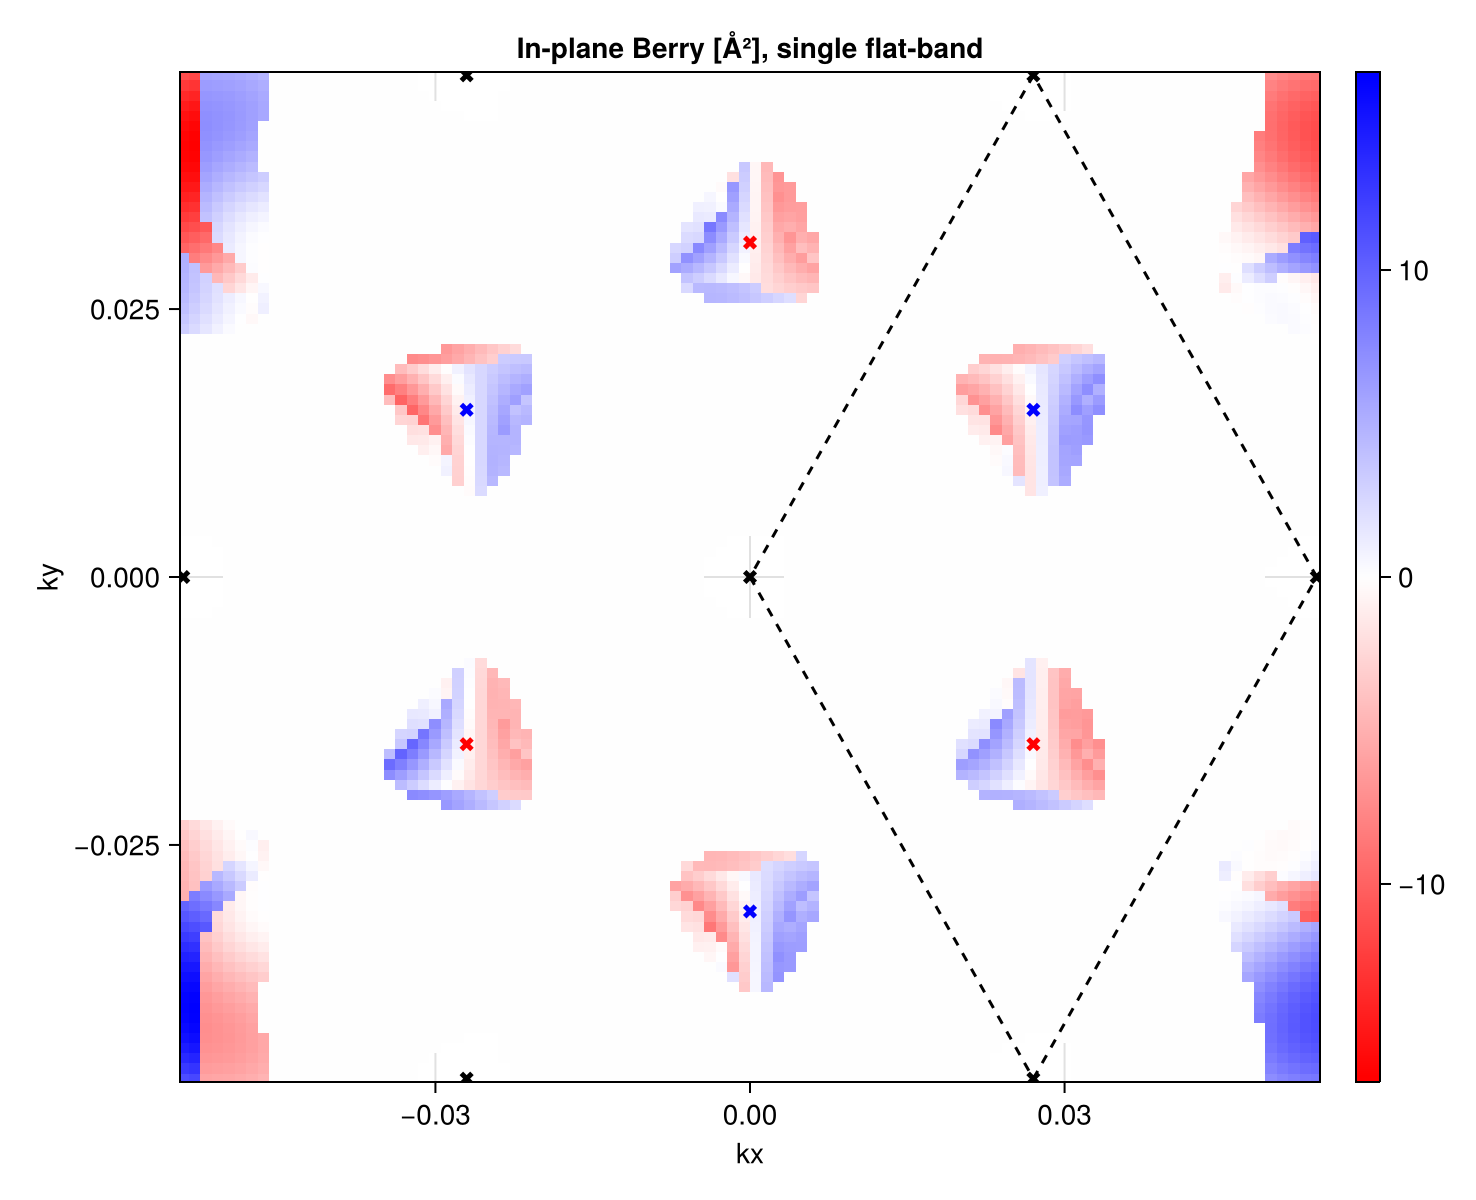

In [229]:

# Create the density plot
vis = 250
fig = Figure(size=(1.23*600,600))
ax = Axis(fig[1, 1], xlabel="kx", ylabel="ky", title="In-plane Berry [Å²], single flat-band")
# heatmap!(ax, x, y, Z, colormap=:redsblues)#, colorrange=(-1, 1.0).*vis)
cmap = cgrad([:red, :white, :blue])
hm = heatmap!(ax, x, y, real(Zb), colormap=cmap)#, colorrange=(-1, 1.0).*vis)
BZdecorations!(p, ax)
# Colorbar(fig[1,2], ax)  # Add a colorbar
cb = Colorbar(fig[1, 2], hm)
xlims!(ax, a[1]-ϵ, b[1]+ϵ)
ylims!(ax, a[2]-ϵ, b[2]+ϵ)
fig

### Magneto Conductivity

#### Integrand

Units:

velocity operators are in meV A so they have to be divided by hbar
\Delta has the appropiate units 
momentum has the correct units L^-2
Nota creo que solo con \xi estamos para rz pero tenemos que multiplicarlo por a0 para darle las unidades.

Las unidades tras integrar de la magnetoconductividad son e^2/\hbar 1/Tesla




### Tests custom

In [334]:
pcustom = ParamsHF(paramsHF(1.05, 1,  1),
μ = 0,
nf = 1,
λ = 120,
M = 2*3.697,
v = -4.303e3*a0,
vp =1.622e3*a0,
γ = -40,
sigmaz = 0,
sigmazlayerz = 0,
U1 = 0,
U2 = 0,   
J = 0,
VP =true,
twovalleystwospins= true);
G1, G2 = bravais_vectors(ParamsHF(pcustom, ν = 1));  
K1 =  κ(G1, G2)
K2 =  κ(G2, G1)
M = m(G1, G2)

ofmts = diagm([0,0,0,0,0,0,0,0].*0.5);
mu = -15

-15

In [324]:
kvects = [K1, -K1, [0.,0], K2];#, M + [0,norm(M)/2],-M-[0,norm(M)/2], [0.,0.]]#, -M, [0.,0.], M, K2, -K2]
kv = kvects[1];

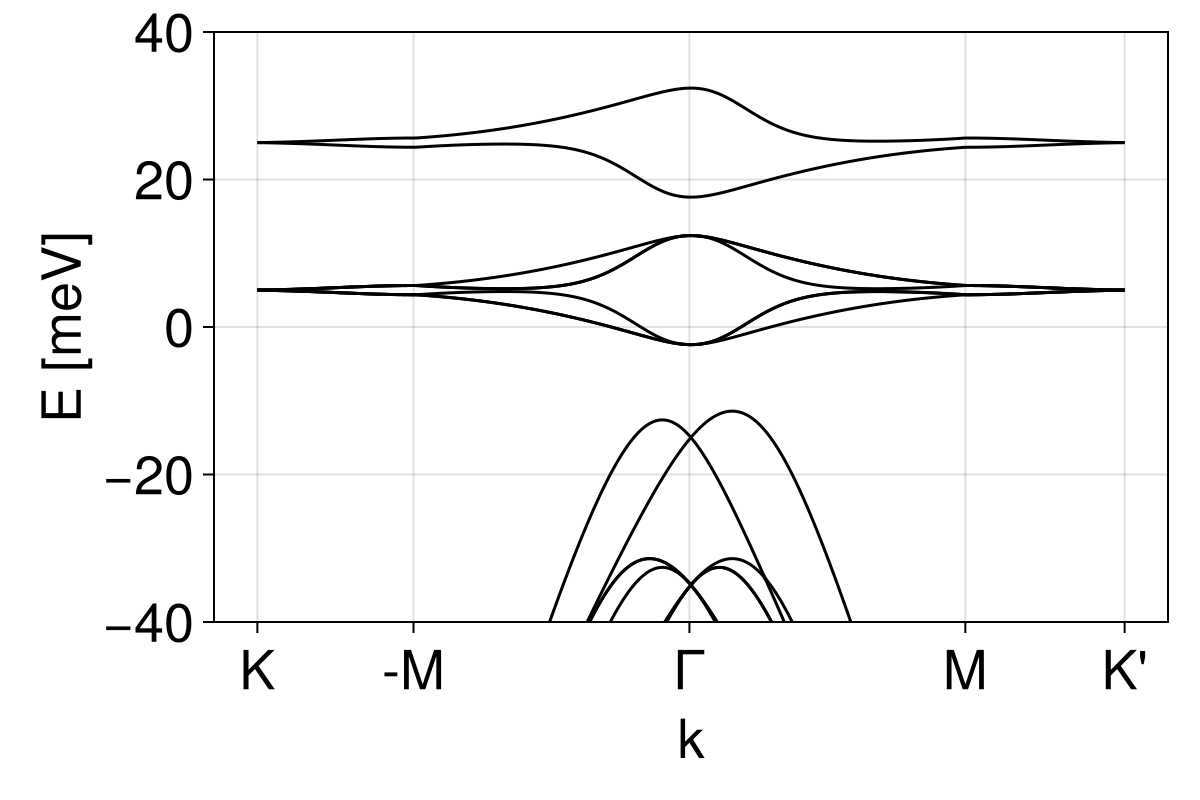

In [335]:
hf_plotbands(ParamsHF(pcustom, μ =mu), ofmts, kpoints = 101, res = (600,400), ylims = [-15,15])

##### In-plane Berry complicated plots

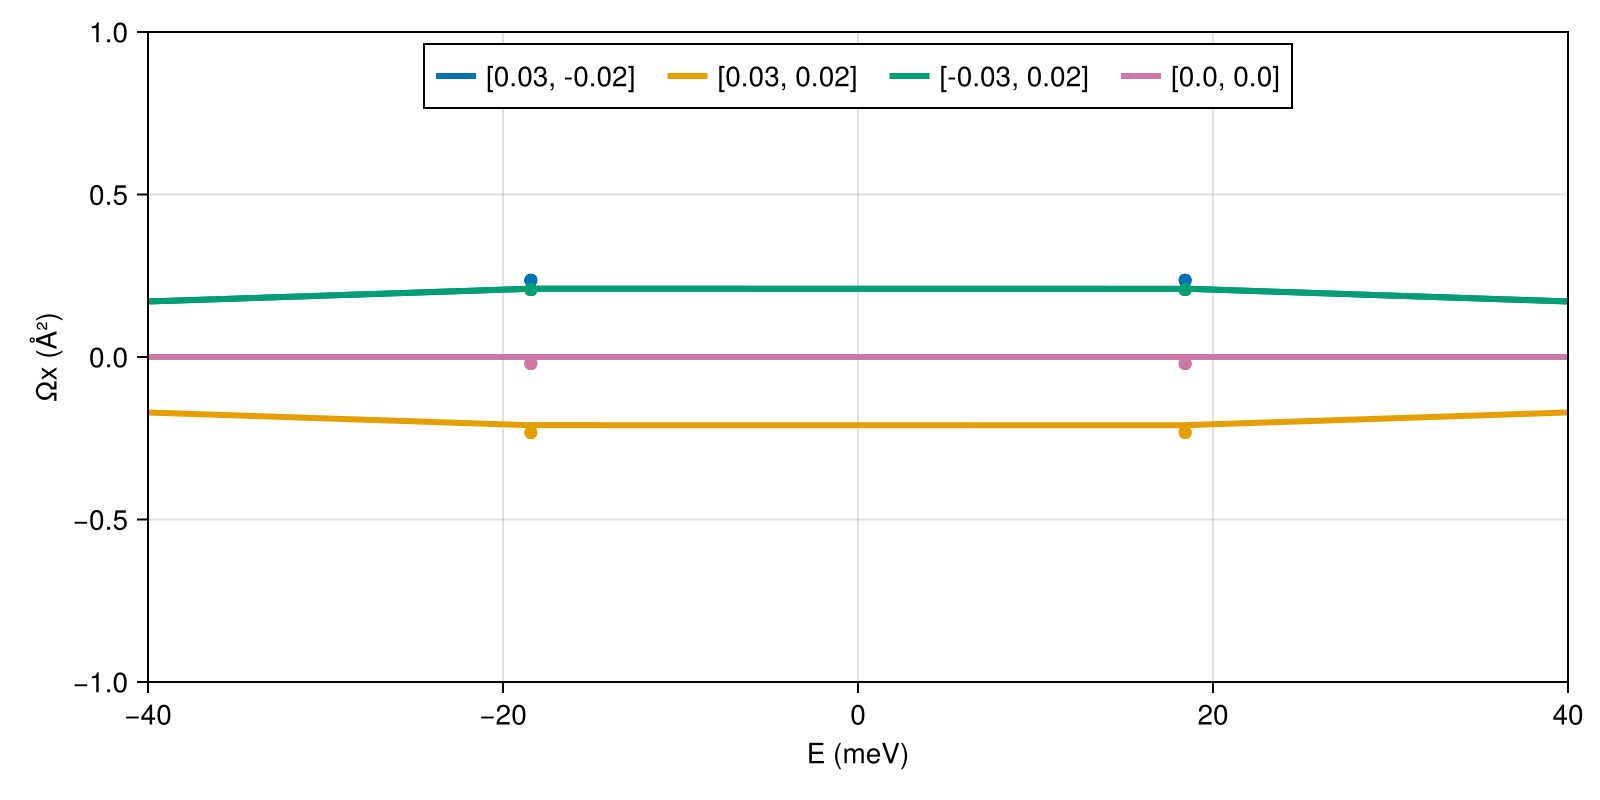

CairoMakie.Screen{IMAGE}


In [200]:
fig = Figure(size = (800, 400)); ax = Axis(fig[1,1], xlabel = "E (meV)", ylabel = "Ωx (Å²)");
h = hf_valley_spin_hamiltonian(ParamsHF(pcustom, μ = mu), kvects[1], ofmts);
ϵs, ψs = eigen(Matrix(h));

for kvect in kvects
    rn = (rand() * (0.04 + 0.04) - 0.04) 
    omegas = berryinplane(pcustom, mu, ofmts, kvect)
    lines!(ax, ϵs, omegas, alpha = 1, linewidth = 3, label = "$(round.(kvect, digits = 2))");
    scatter!(ax, ϵs, omegas .+ rn)
end
xlims!(ax, -40,40)
ylims!(ax, -1, 1)
axislegend(ax, orientation = :horizontal, position= :ct)
display(fig)


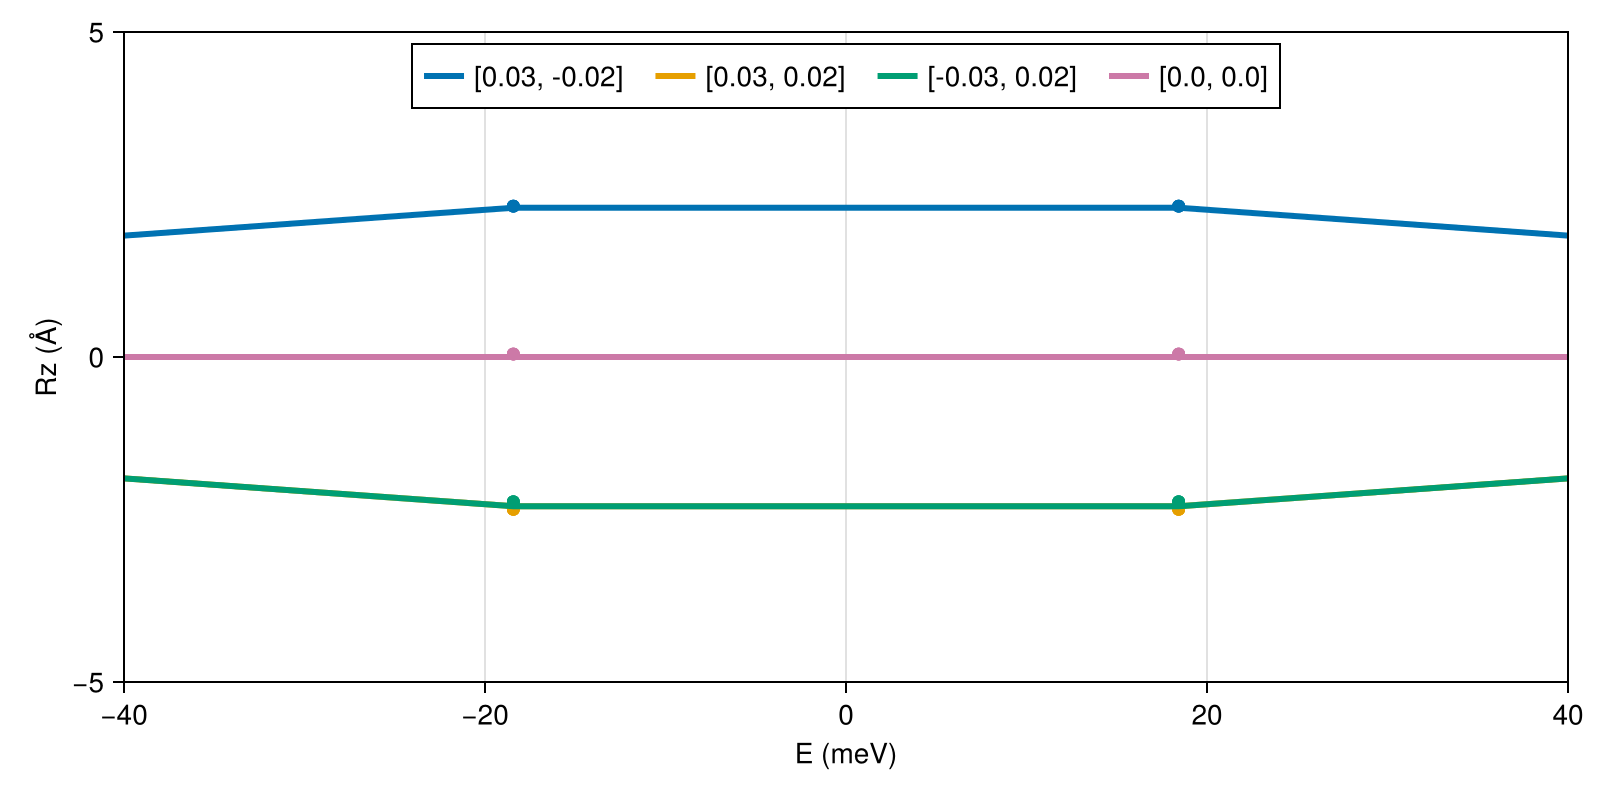

CairoMakie.Screen{IMAGE}


In [204]:
fig = Figure(size = (800, 400)); ax = Axis(fig[1,1], xlabel = "E (meV)", ylabel = "Rz (Å)");
h = hf_valley_spin_hamiltonian(ParamsHF(pcustom, μ = mu), kvects[1], ofmts);
ϵs, ψs = eigen(Matrix(h));

for kvect in kvects
    rn = rand() * (0.08 + 0.08) - 0.08
    rzvals = real.(diagrz(pcustom, mu, ofmts, kvect))
    lines!(ax, ϵs, rzvals, alpha = 1, linewidth = 3, label = "$(round.(kvect, digits = 2))");
    scatter!(ax, ϵs, rzvals .+ rn);
end
xlims!(ax, -40,40)
ylims!(ax, -5, 5)
axislegend(ax, orientation = :horizontal, position= :ct)
display(fig)


In [299]:
function berryinplane(pcustom, mu, ofmts, kvect)
    h = hf_valley_spin_hamiltonian(ParamsHF(pcustom, μ = mu), kvect, ofmts)
    ϵs, ψs = eigen(Matrix(h))
    dhx = dhf_hamiltonian(ParamsHF(pcustom, μ = mu), :x, ofmts)
    # dhy = dhf_hamiltonian(ParamsHF(pcustom, μ = mu), :y, ofmts);
    rzmat = rz(ψs, ParamsHF(pcustom, μ = mu), kvect, ofmts) * a0;
    rx = r(ϵs, ψs, dhx) 
    # ry = r(ϵs, ψs, dhy)
    # omegas=Ωin(:x, sign.(rzmat) .* rzmat, rzmat)
    omegas=Ωin(:x, rx, rzmat)
    # omegas= Ωin(:x,0I, rzmat)
    return omegas
end

berryinplane (generic function with 1 method)

#### In§-plane Berry complicated plots

In [ ]:
fig = Figure(); ax = Axis(fig[1,1], xlabel = "Ωx_n [Å^²]", title = "Histogram of Ωx at k = $(round.(kv, digits = 2))")
rzvals = berryinplane(pcustom, mu, ofmts, kv)
hist!(ax, rzvals, bins = 100)
# xlims!(ax, -3,3) 
ylims!(ax, 0,9)
fig

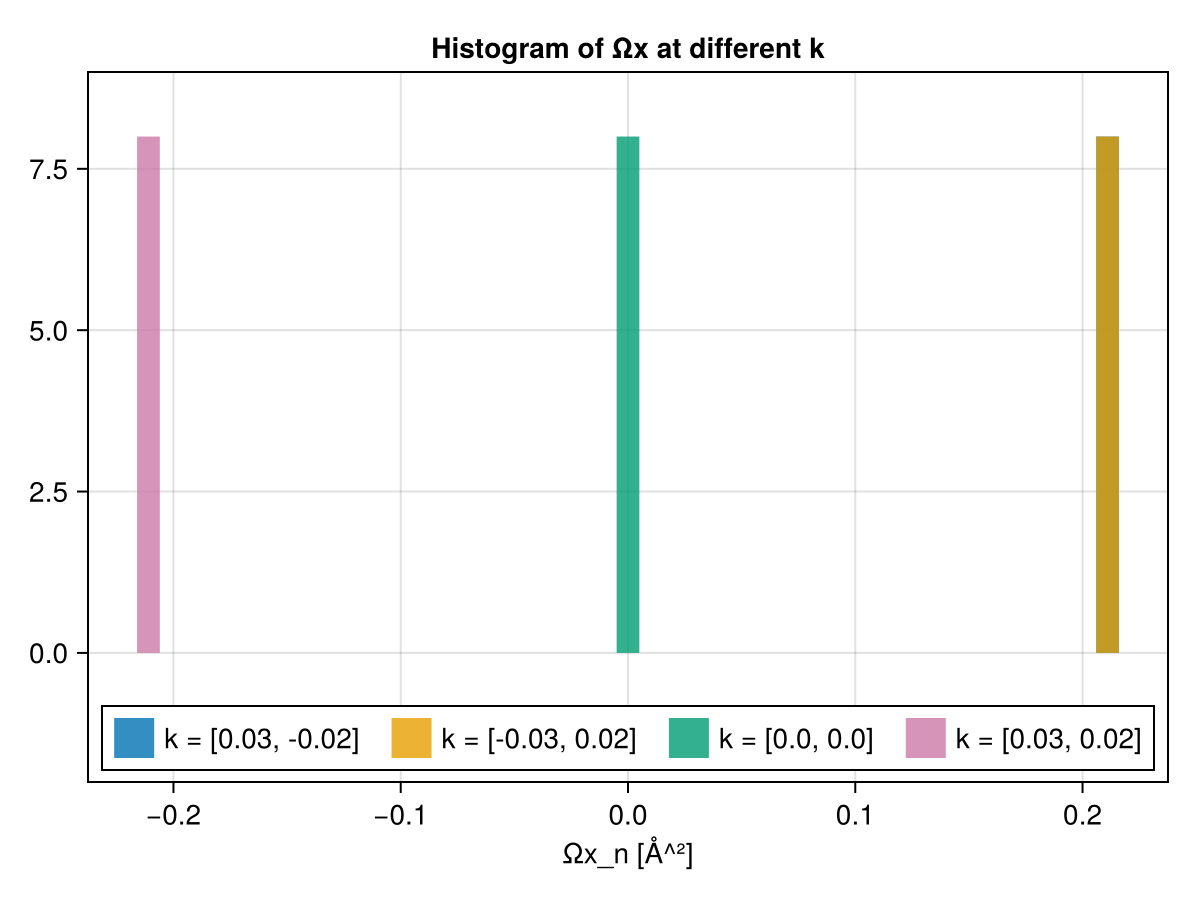

In [385]:


fig = Figure(); ax = Axis(fig[1,1], xlabel = "Ωx_n [Å^²]", title = "Histogram of Ωx at different k")
for kv in kvects
    rzvals = [k_inplaneberry(:x, ParamsHF(pcustom, μ = mu), kv, ofmts, it; T = 10) for it in 1:8]
    hist!(ax, rzvals, bins = 1, width = 0.01, label = "k = $(round.(kv, digits = 2))")
end
# xlims!(ax, -2*maximum(abs.(rzvals)),2maximum(abs.(rzvals)))
ylims!(ax, -2,9)
axislegend(ax, position = :cb, orientation = :horizontal)
 fig

### Rz, Berry maps

In [77]:
function funcmaps(p, func, n = 100)
    M, xmin, xmax = int_boundaries(p)
    a = [-xmax[1], xmin[2]];
    b = [xmax[1], xmax[2]];
    x = range(a[1], b[1], length=n)
    y = range(a[2], b[2], length=n)
    Zb = [func([xi, yi]) for xi in x, yi in y]
    return Zb
end   # notice: [row, column] ordering


# Create the density plot
function plotmap(pcustom, Zb, title = "In-plane Berry [Å²], single flat-band", n = 100; colormap = cgrad([:red, :white, :blue]), zrange = nothing)
    M, xmin, xmax = int_boundaries(p)
    a = [-xmax[1], xmin[2]];
    b = [xmax[1], xmax[2]];
    x = range(a[1], b[1], length=n)
    y = range(a[2], b[2], length=n)
    vis = 250
    fig = Figure(size=(1.23*600,600))
    ax = Axis(fig[1, 1], xlabel="kx", ylabel="ky", title=title)
# heatmap!(ax, x, y, Z, colormap=:redsblues)#, colorrange=(-1, 1.0).*vis)
    # cmap = cgrad([:red, :white, :blue])
 if zrange === nothing
    hm = heatmap!(ax, x, y, Zb, colormap=colormap)
    else
    hm = heatmap!(ax, x, y, Zb, colormap=colormap, colorrange=zrange)#, colorrange=(-1, 1.0).*vis)
end
    BZdecorations!(pcustom, ax)
# Colorbar(fig[1,2], ax)  # Add a colorbar
    ϵ = 0.00001
    cb = Colorbar(fig[1, 2], hm)
 
    xlims!(ax, a[1], b[1])
    ylims!(ax, a[2], b[2])
    return fig
end

plotmap (generic function with 3 methods)

#### OMM contribution

In [336]:
# Berry
points= 100
temp = 5
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_module.jl")
integrand(q) = k_linear_magnetorresistance(:x,:x,:x, ParamsHF(pcustom, μ = mu), q, ofmts; T = temp, 
    Ω_contr = false)
Zo = funcmaps(ParamsHF(pcustom, μ = mu), integrand, points);

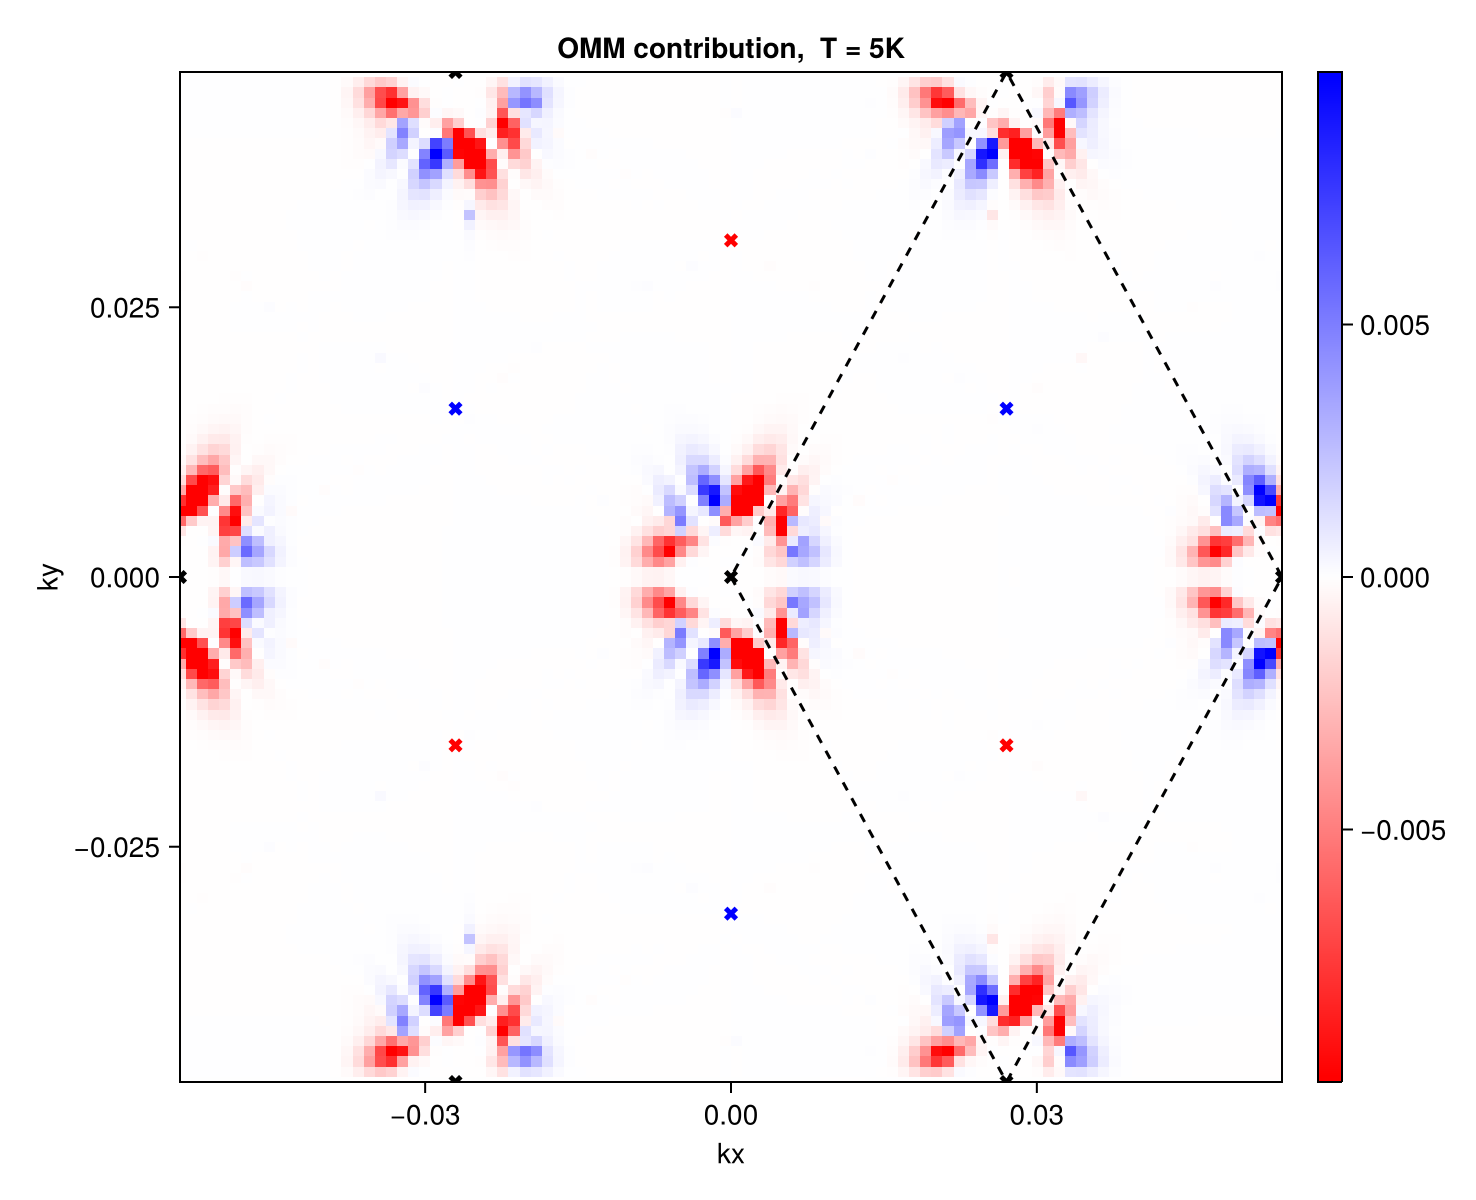

In [337]:
plotmap(pcustom, Zo, "OMM contribution,  T = $(temp)K", points, zrange = (-1,1).*1e-2)

In [263]:
magneto_conductivity(:x,:x,:x, ParamsHF(pcustom, μ = mu), ofmts; T = 5, 
    τ = 200, evals = 1000, Ω_contr = false)

1.6337251678763797e-14

In [262]:
sum(Zo)

1.2656542480726785e-13

#### BC contribution

In [338]:
# Berry
points= 100
temp = 5
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_module.jl")
integrand(q) = k_linear_magnetorresistance(:x,:x,:x, ParamsHF(pcustom, μ = mu), q, ofmts; T = temp, omm_contr = false)
Zb = funcmaps(ParamsHF(pcustom, μ = mu), integrand, points);

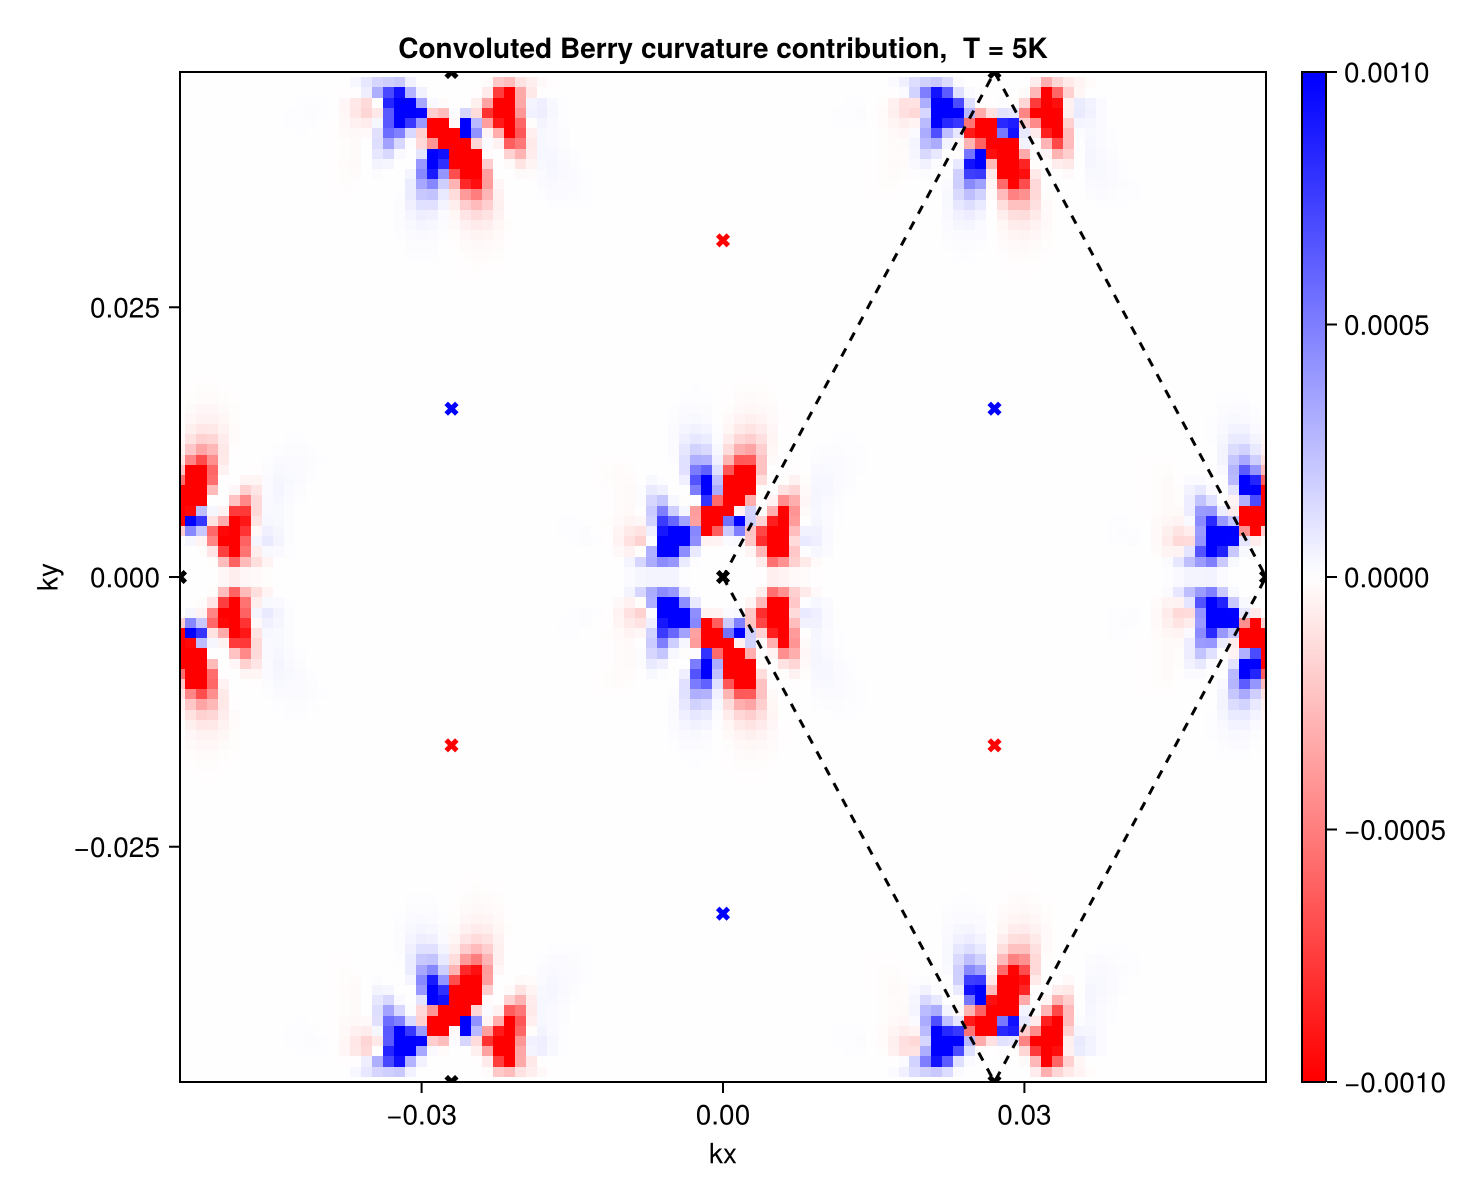

In [339]:
plotmap(pcustom, Zb, "Convoluted Berry curvature contribution,  T = $(temp)K", points, zrange = (-1,1).*1e-3)
# plotmap(pcustom, Zb, "Convoluted -vx^2 Ωx + vxvy Ωy [Å²],  T = $(temp)K", points)

In [234]:
magneto_conductivity(:x,:x,:x, ParamsHF(pcustom, μ = mu), ofmts; T = 5, 
    τ = 200, evals = 10000, Ω_contr = true, omm_contr = false, fermi_surface = false)

1.5795147514794505e-5

In [261]:
sum(Zb)

-1.8471837393008173e-9

#### Berry curvature

In [250]:
# Berry
points= 50
temp = 1
l = 8
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_module.jl")
integrand(q) = k_inplaneberry(:x, ParamsHF(pcustom, μ = mu), q, ofmts, l; T = temp)
Zb = funcmaps(ParamsHF(pcustom, μ = mu), integrand, points);

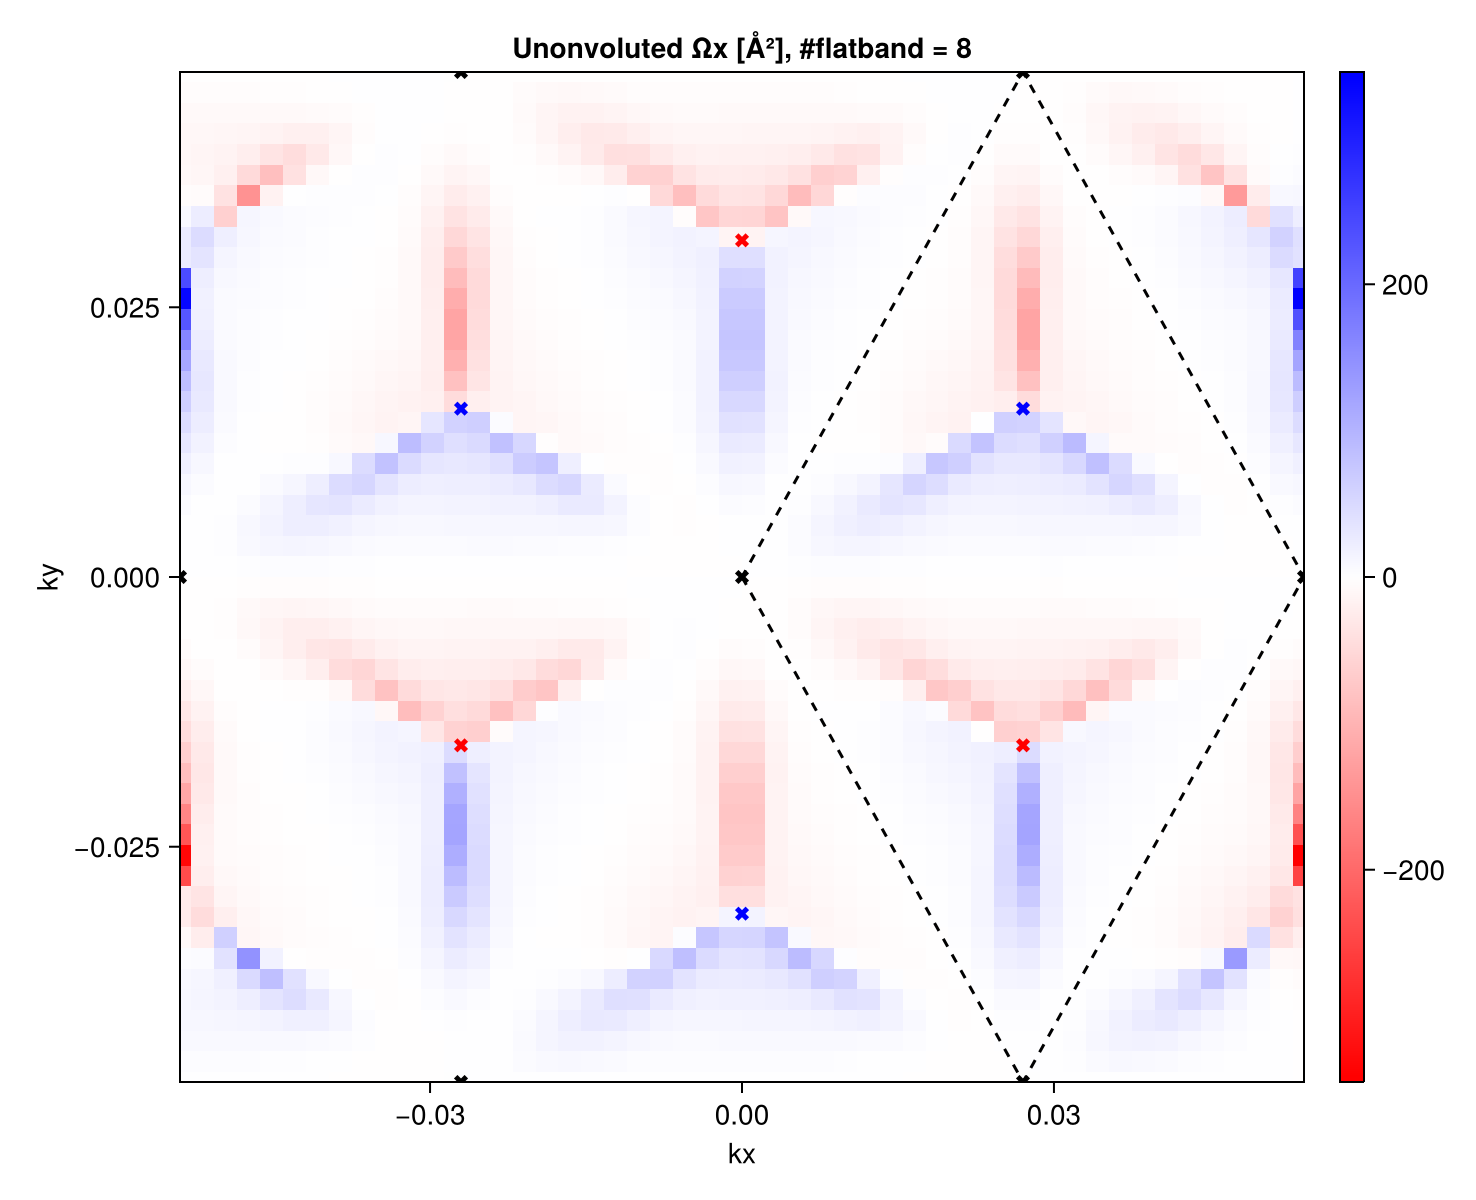

In [251]:
plotmap(pcustom, Zb, "Unonvoluted Ωx [Å²], #flatband = $(l)", points)

In [246]:
# Berry Fermi surface
points= 50
temp = 10
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_module.jl")
integrand(q) = k_inplaneberry(:x, ParamsHF(pcustom, μ = mu), q, ofmts; T = temp)
Zb = funcmaps(ParamsHF(pcustom, μ = mu), integrand, points);

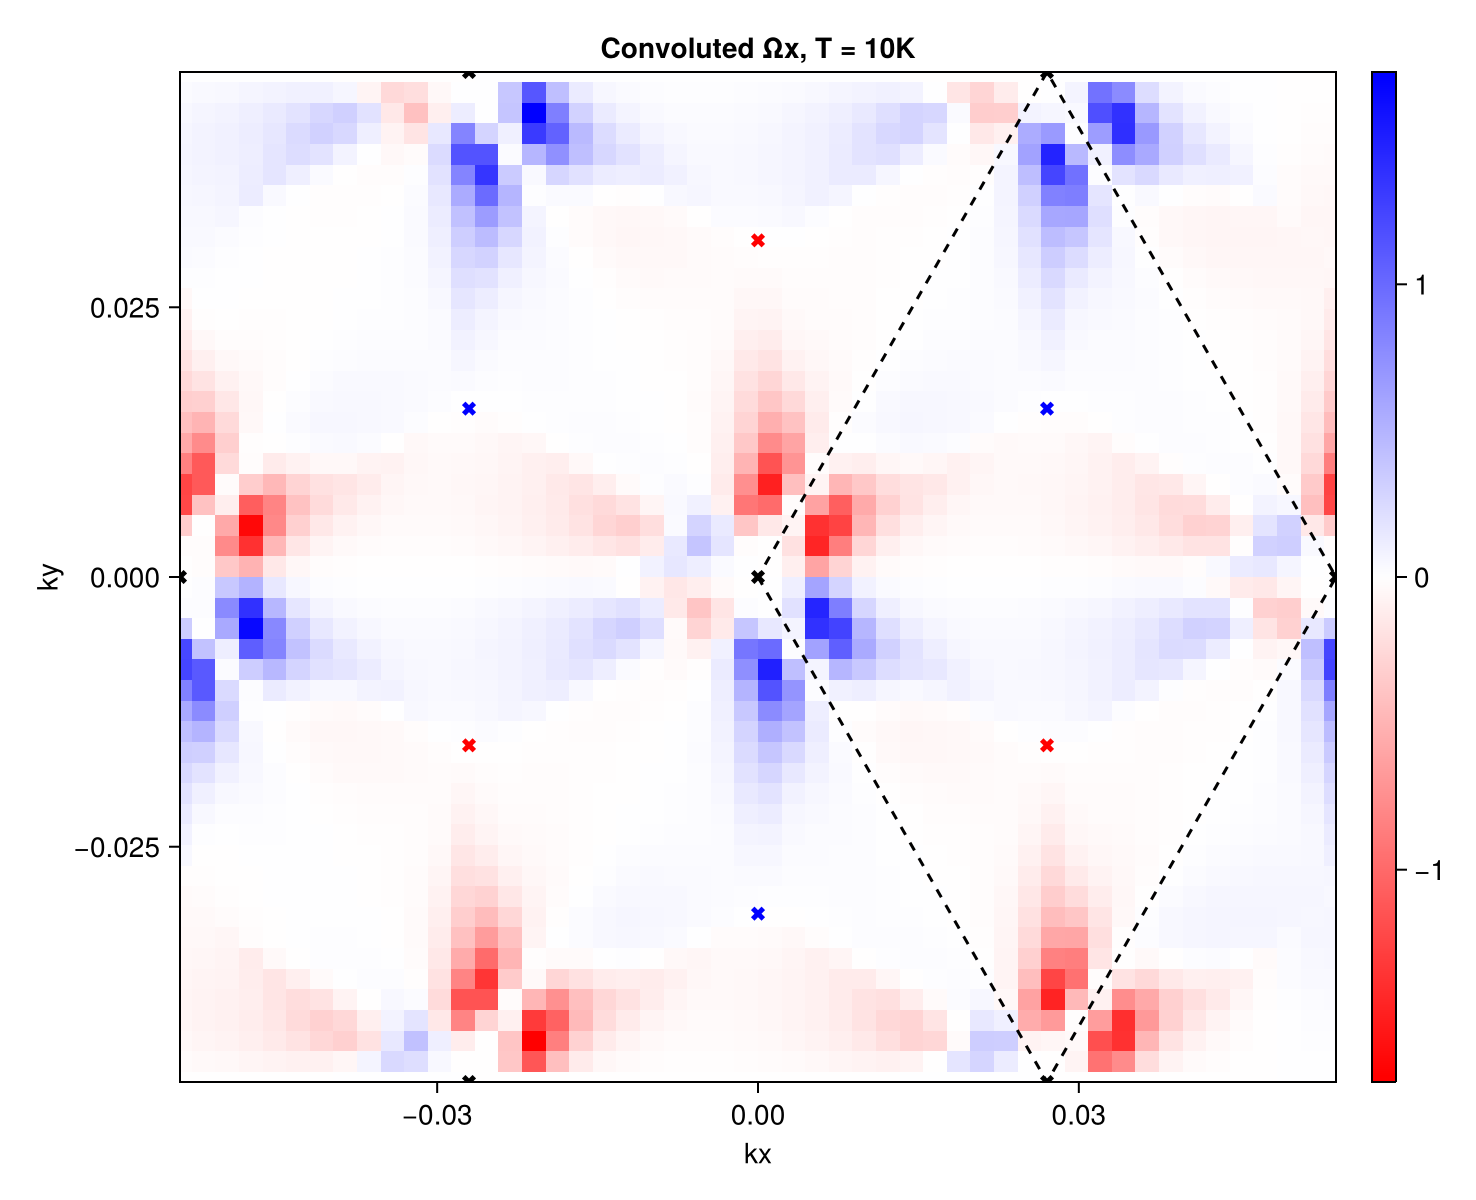

In [247]:
plotmap(pcustom, Zb, "Convoluted Ωx, T = $(temp)K", points)#, zrange = (-5,5) )

In [ ]:
plotmap(pcustom, Zb, "Convoluted vx, T = $(temp)K", points)

#### Fermi surface

In [226]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_module.jl")
temp = 5
points= 200
integrand(q) = k_fermisurface(:x, ParamsHF(pcustom, μ = mu), q, ofmts; T = temp)
Zf = funcmaps(ParamsHF(pcustom, μ = mu), integrand, points);

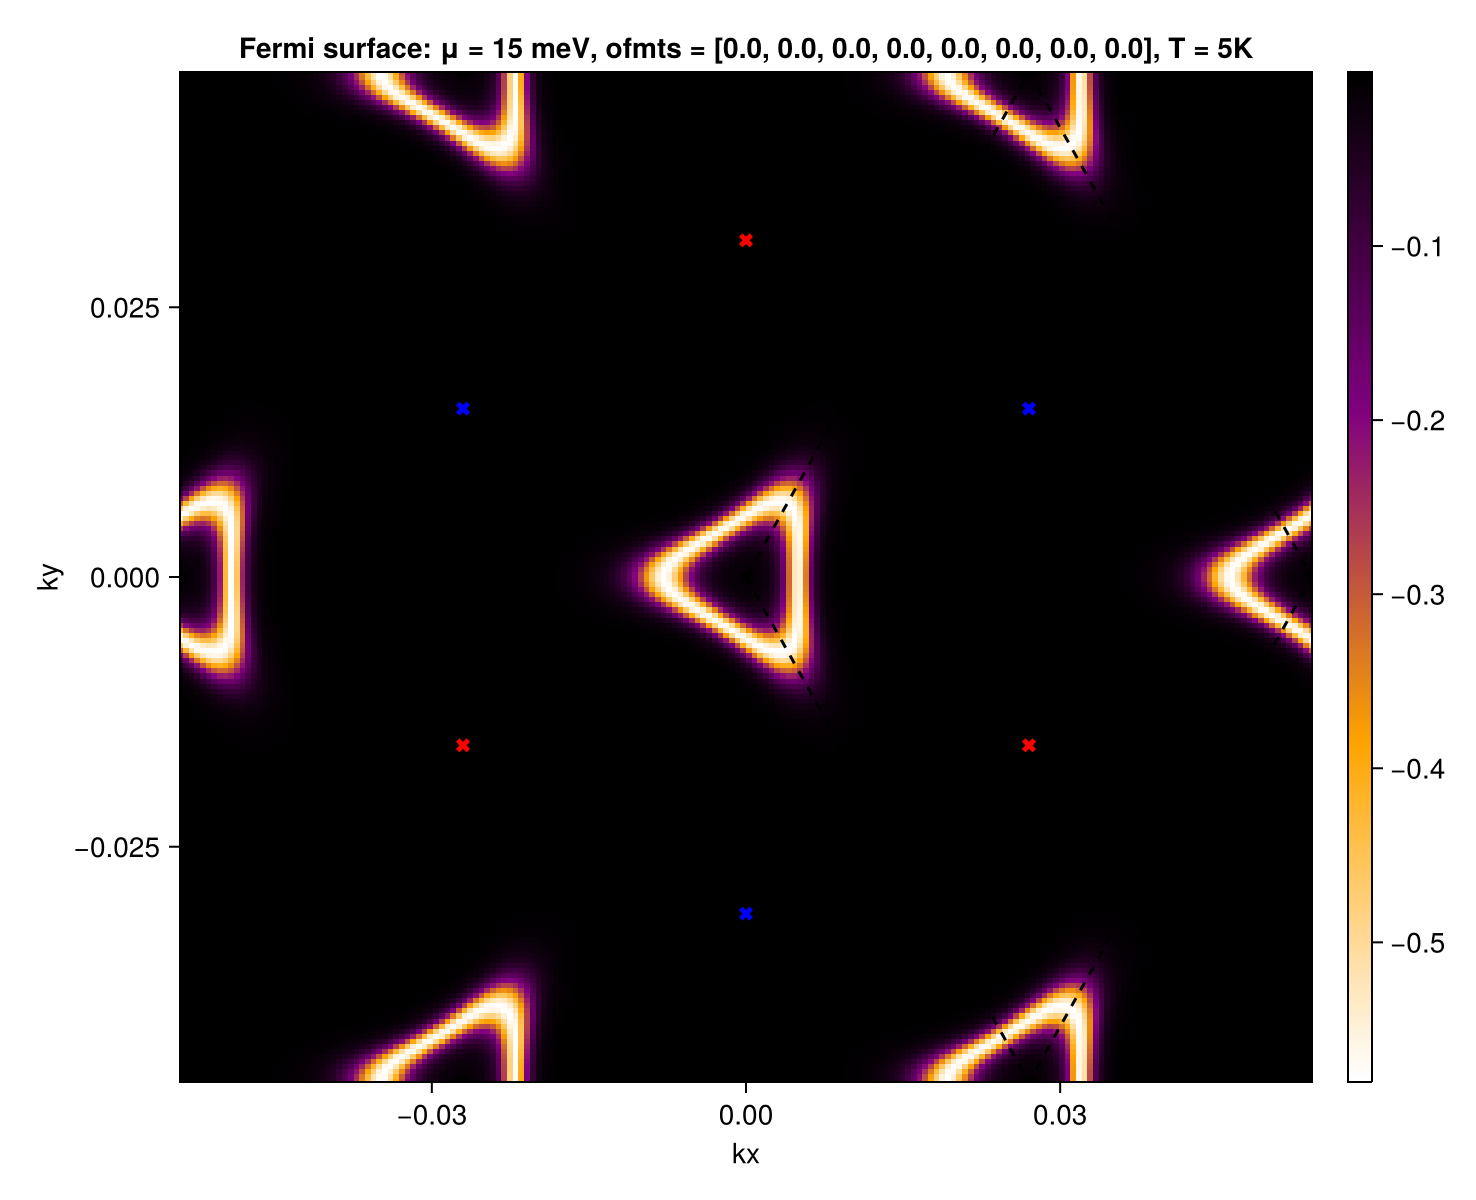

In [227]:
plotmap(pcustom, Zf, "Fermi surface: μ = $(mu) meV, ofmts = $(round.(diag(ofmts), digits = 1)), T = $(temp)K", points,
    colormap = cgrad([:white,:orange, :purple, :black]))

In [ ]:
hist(Zb)

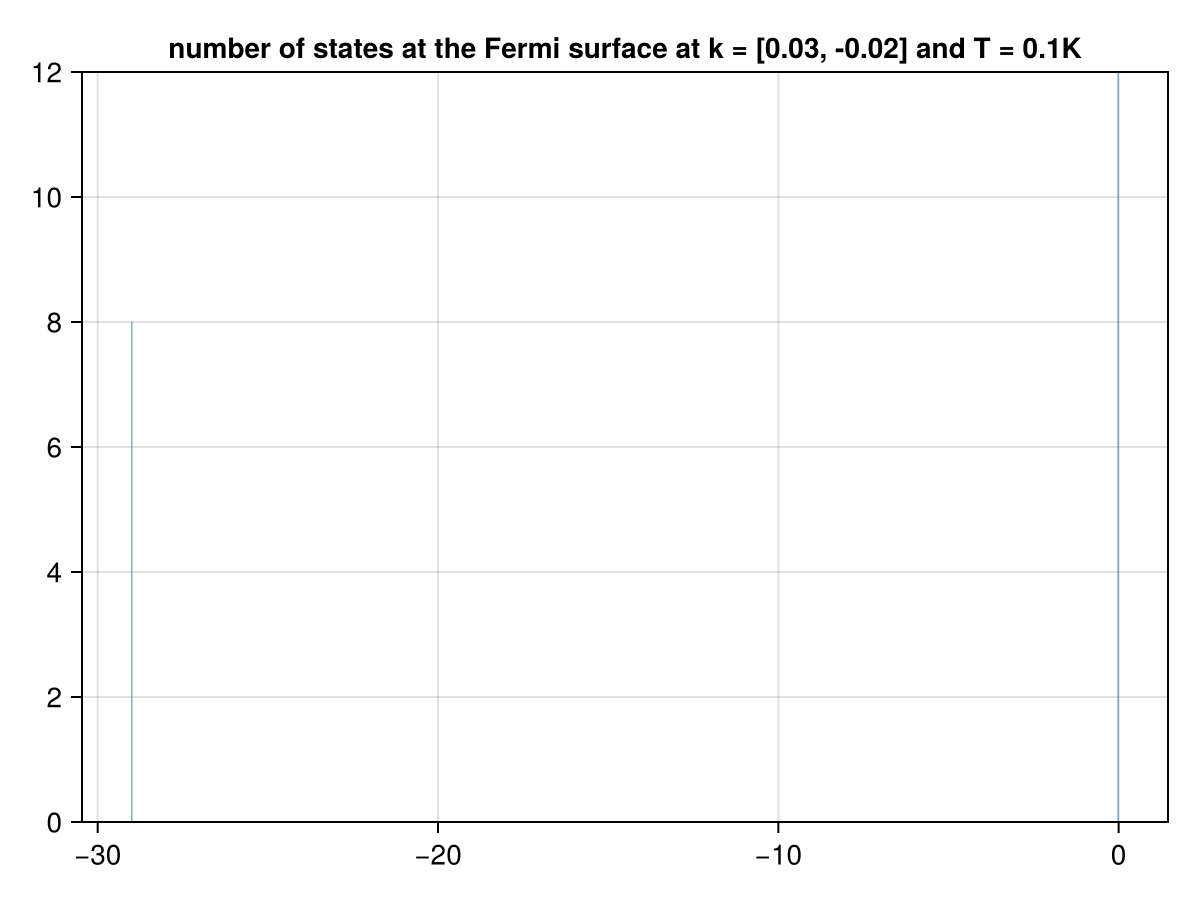

In [49]:
kv = K1
temp = 0.1
h = hf_valley_spin_hamiltonian(ParamsHF(pcustom, μ = mu), kv, ofmts);
ϵs, ψs = eigen(Matrix(h))
dfs = d_f(ϵs, 0, temp);
fig = Figure(); ax = Axis(fig[1,1], title = "number of states at the Fermi surface at k = $(round.(kv,digits=2)) and T = $(temp)K")
hist!(ax, dfs, bins = 1000)
ylims!(ax, 0, 12)
# xlims!(ax, -0.1, 0)
fig

##### Form of Rz

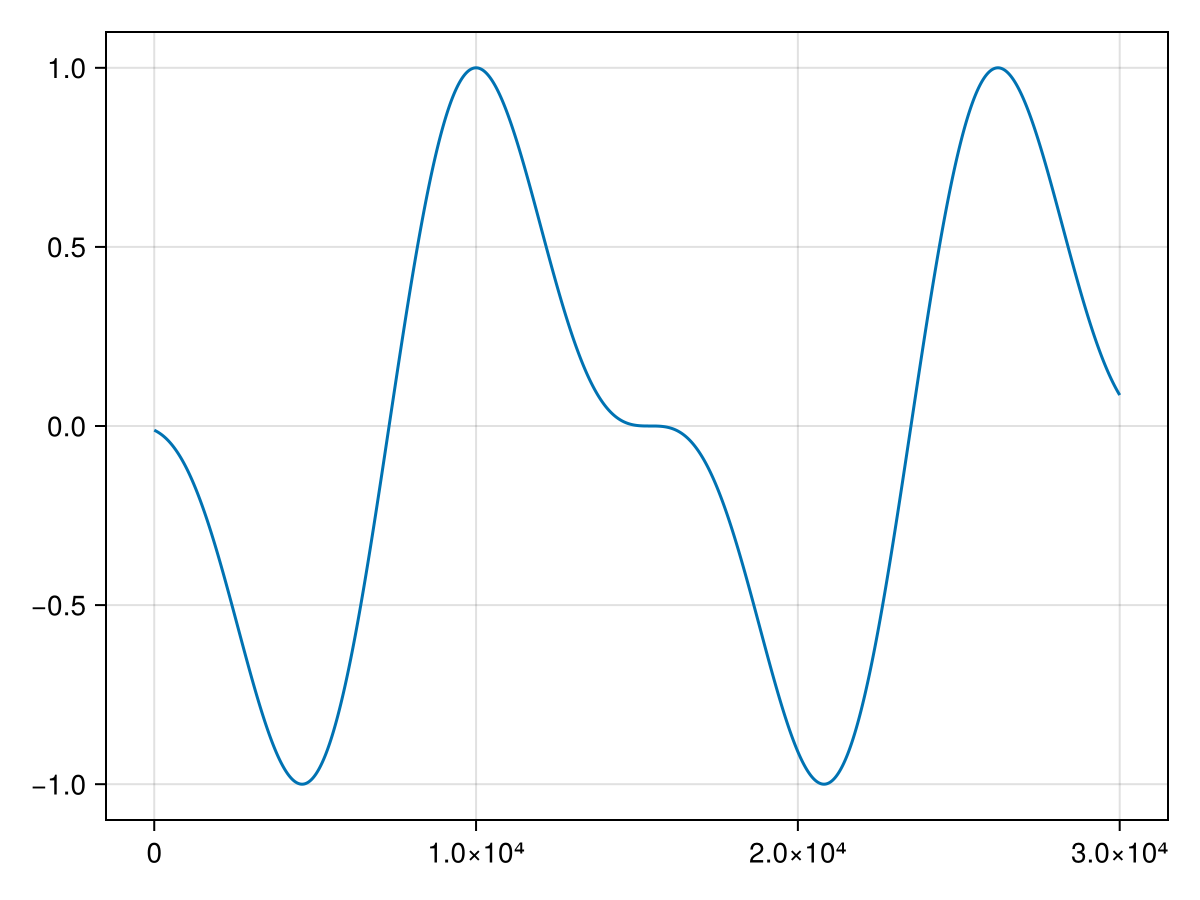

In [176]:
pend = K2[2] / K2[1]
vals = real([non_local(p,-K2 + abs(K1[1]) .* [i, i*pend] ./ abs(2K1[1])   ) for i in -0.1:0.00001:0.2])
fig = Figure(); ax = Axis(fig[1,1]); lines!(ax, vals)
fig

##### Rz

In [379]:

h = hf_valley_spin_hamiltonian(ParamsHF(pcustom, μ = mu), kv, ofmts)
ϵs, ψs = eigen(Matrix(h));

hist(ϵs, bins = 1000);

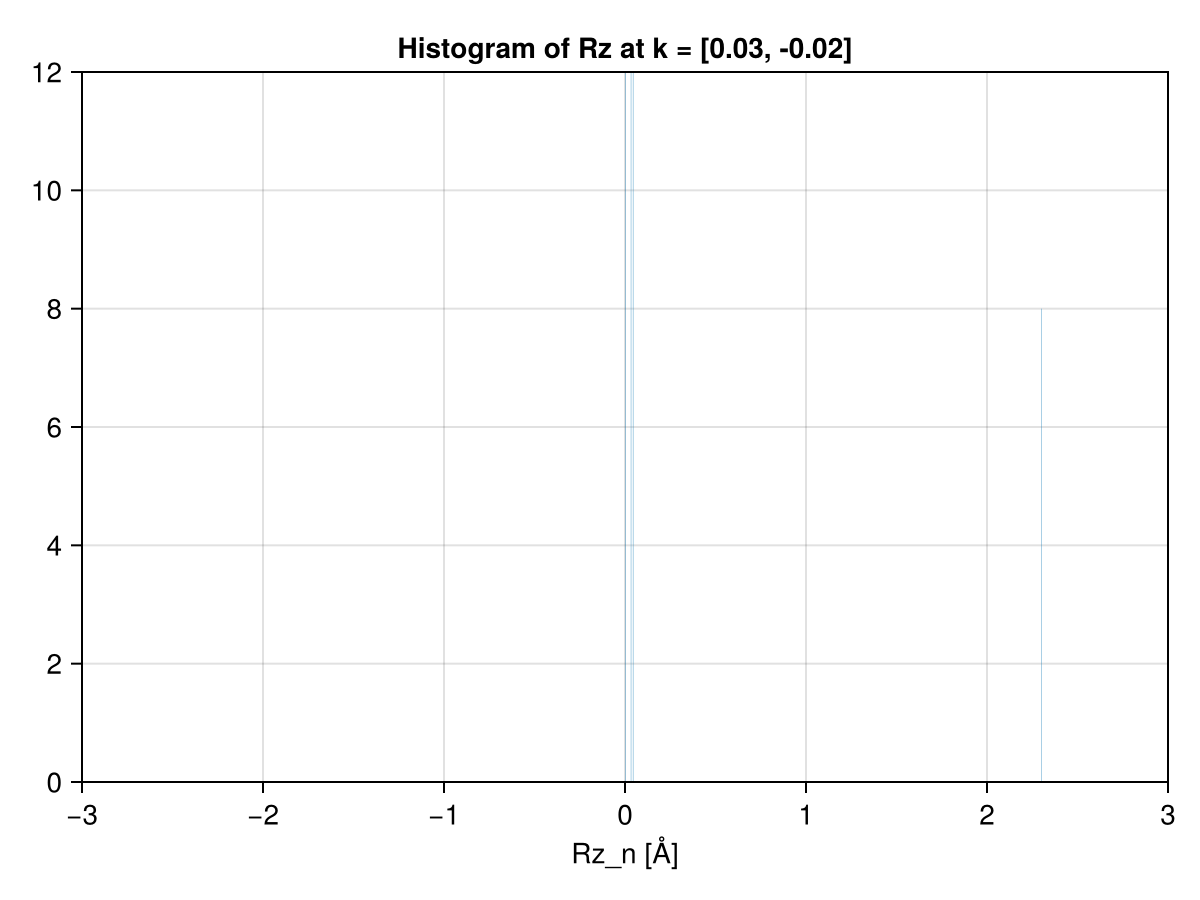

In [381]:
fig = Figure(); ax = Axis(fig[1,1], xlabel = "Rz_n [Å]", title = "Histogram of Rz at k = $(round.(kv, digits = 2))")
rzvals = real.(diagrz(pcustom, mu, ofmts, kv))
hist!(ax, rzvals, bins = 1000)
xlims!(ax, -3,3)
ylims!(ax, 0,12)

fig

In [154]:
function diagrz(pcustom, mu, ofmts, kvect, l)
    d = Dict(1 => 57, 2 => 58, 3 => 59, 4 => 60, 5 => 61, 6 => 62, 7 => 63, 8 => 64)
    diagrz(pcustom, mu, ofmts, kvect)[d[l]]
end
function diagrz(pcustom, mu, ofmts, kvect)
    h = hf_valley_spin_hamiltonian(ParamsHF(pcustom, μ = mu), kvect, ofmts)
    ϵs, ψs = eigen(Matrix(h))
    rzmat = rz(ψs, ParamsHF(pcustom, μ = mu), kvect, ofmts) #* a0;
    return diag(rzmat)
end

diagrz (generic function with 2 methods)

In [155]:

include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_module.jl")
l = 2
integrandrz(q) = diagrz(pcustom, mu, ofmts, q, l)
rzmap = funcmaps(pcustom, integrandrz);

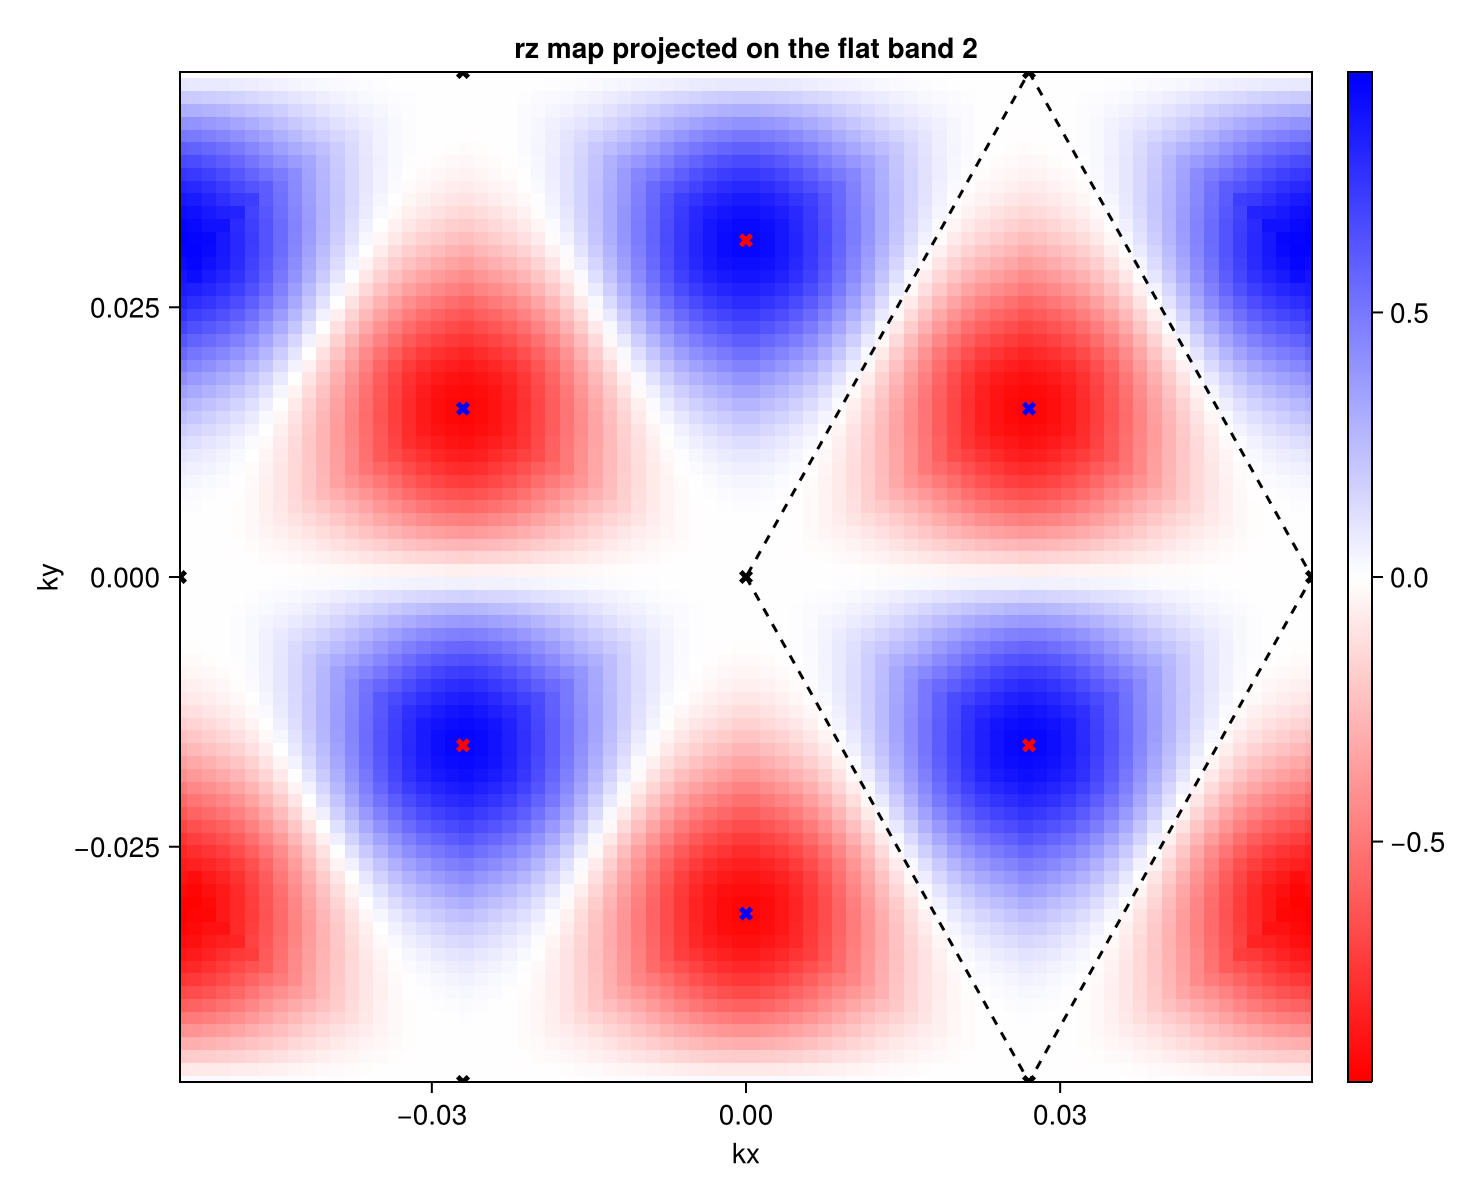

In [153]:
plotmap(pcustom, real.(rzmap), "rz map projected on the flat band $(l)")

##### velocities

In [50]:
function diagrx(pcustom, mu, ofmts, kvect)
    h = hf_valley_spin_hamiltonian(ParamsHF(pcustom, μ = mu), kvect, ofmts)
    ϵs, ψs = eigen(Matrix(h))
    dhx = dhf_hamiltonian(p, :x, ofmts)
    # rx = r(ϵs, ψs, dhx) 
    vx = vel(ψs, dh)
    diag(vx)
end

diagrx (generic function with 1 method)

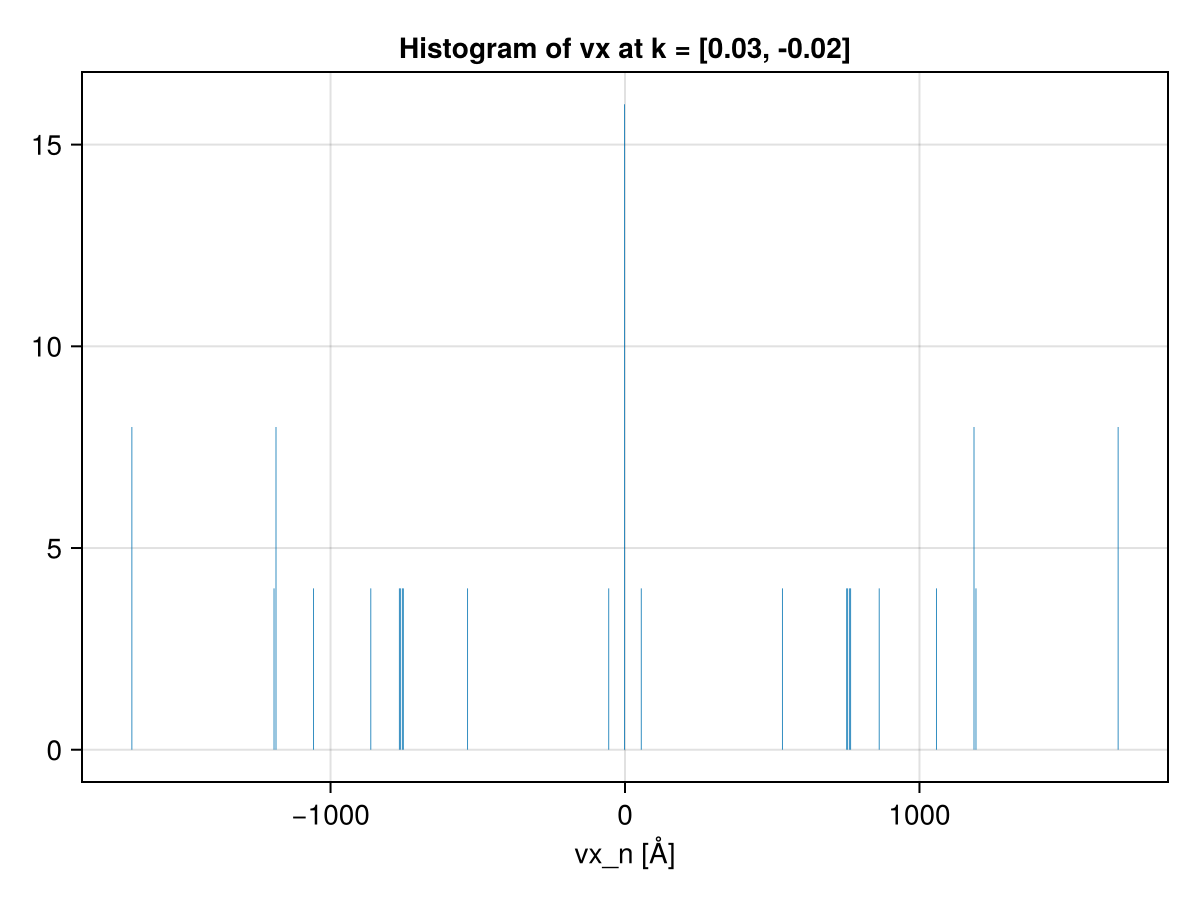

In [54]:
fig = Figure(); ax = Axis(fig[1,1], xlabel = "vx_n [Å]", title = "Histogram of vx at k = $(round.(kv, digits = 2))")
rzvals = real(diagrx(pcustom, mu, ofmts, kv))
hist!(ax, rzvals, bins = 1000)
# xlims!(ax, -3,3)
# ylims!(ax, 0,12)
fig

#### INTEGRAND

In [705]:
# Define number of grid points
# RUN Self-consistent bands Heavy Fermion section
integrand(q) = k_linear_magnetorresistance(:x, :x, :x,
    ParamsHF(pcustom, μ = mu), q, ofmts; T = 1, τ = 200, Ω_contr = true, omm_contr = true, fermi_surface = false)
M, xmin, xmax = int_boundaries(p)
a = [-xmax[1], xmin[2]]
b = [xmax[1], xmax[2]]

n = 40  # resolution (100x100 grid)
# Generate grid points
x = range(a[1], b[1], length=n)
y = range(a[2], b[2], length=n)

# Evaluate f on the grid
Z = [integrand([xi, yi]) for xi in x, yi in y];  # notice: [row, column] ordering

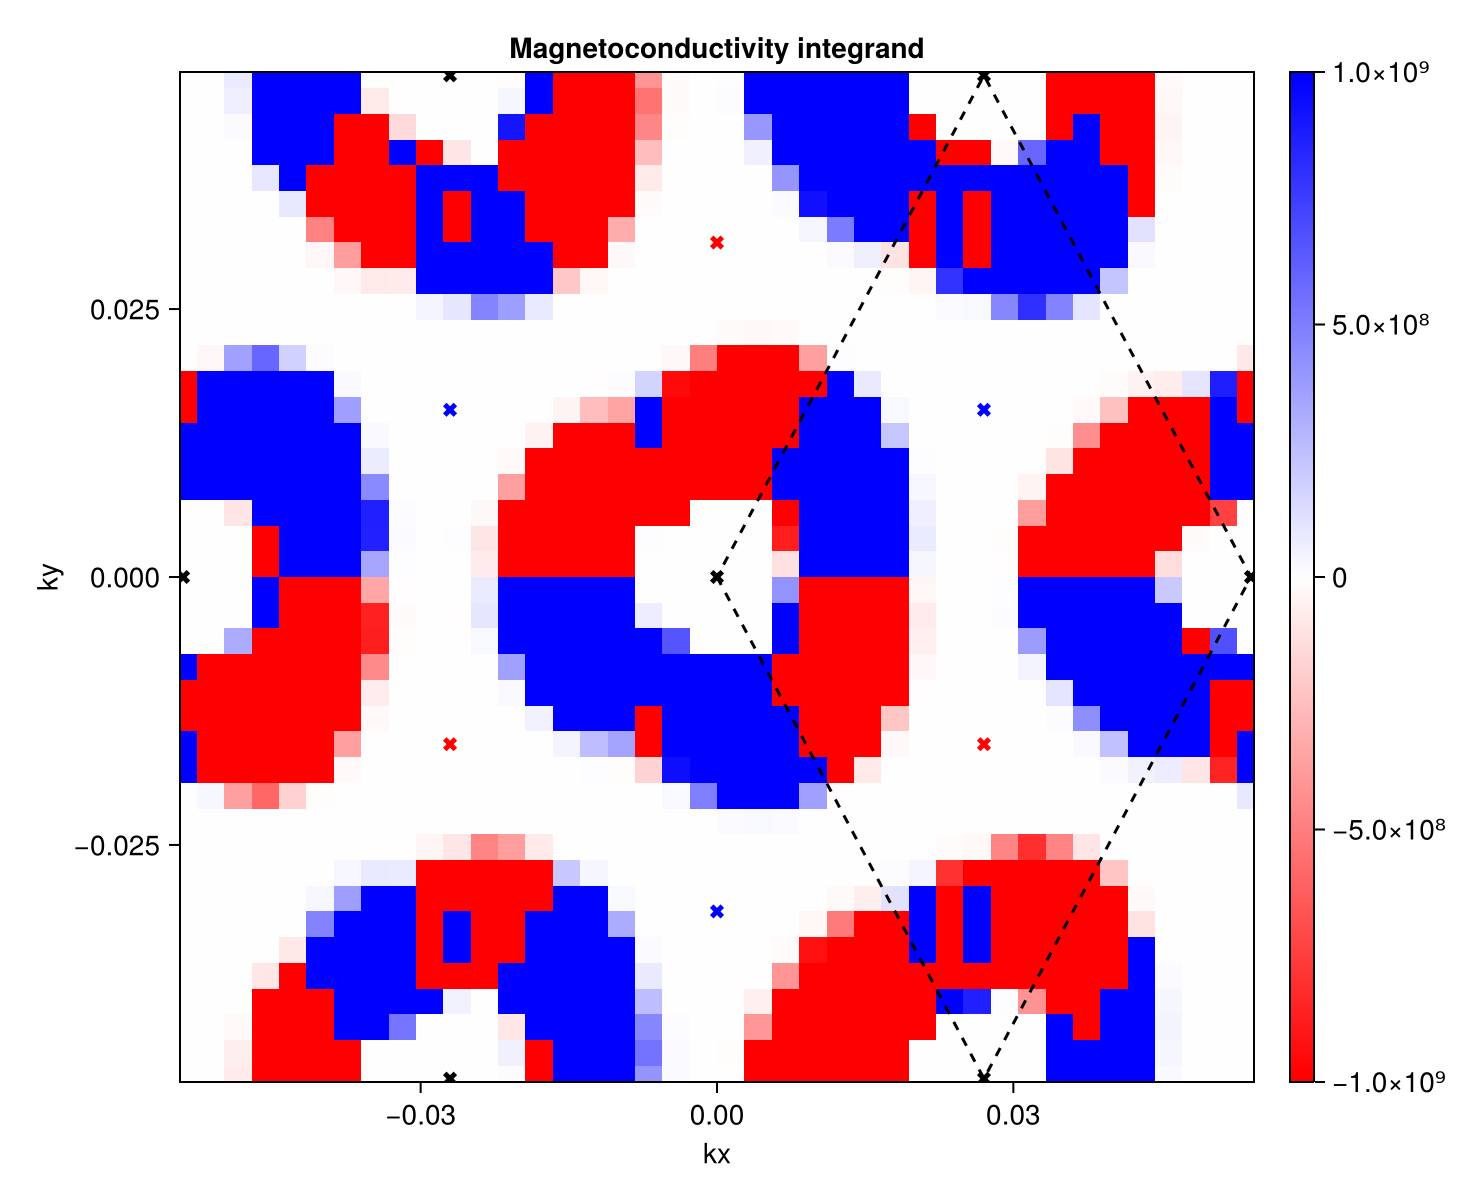

In [707]:

# Create the density plot

vis = 1e9
fig = Figure(size=(1.23*600,600))
ax = Axis(fig[1, 1], xlabel="kx", ylabel="ky", title="Magnetoconductivity integrand")
# heatmap!(ax, x, y, Z, colormap=:redsblues)#, colorrange=(-1, 1.0).*vis)
cmap = cgrad([:red, :white, :blue])
hm = heatmap!(ax, x, y, real(Z), colormap=cmap, colorrange=(-1, 1.0).*vis)
BZdecorations!(pcustom, ax)
# Colorbar(fig[1,2], ax)  # Add a colorbar
cb = Colorbar(fig[1, 2], hm)
xlims!(ax, a[1]-ϵ, b[1]+ϵ)
ylims!(ax, a[2]-ϵ, b[2]+ϵ)
fig

In [713]:
magneto_conductivity(:x, :x, :x, ParamsHF(pcustom, μ = mu), 
ofmts, T = 1, τ = 200, evals = 10000, Ω_contr = true, omm_contr = true, fermi_surface = false)

0.00015419230608512707

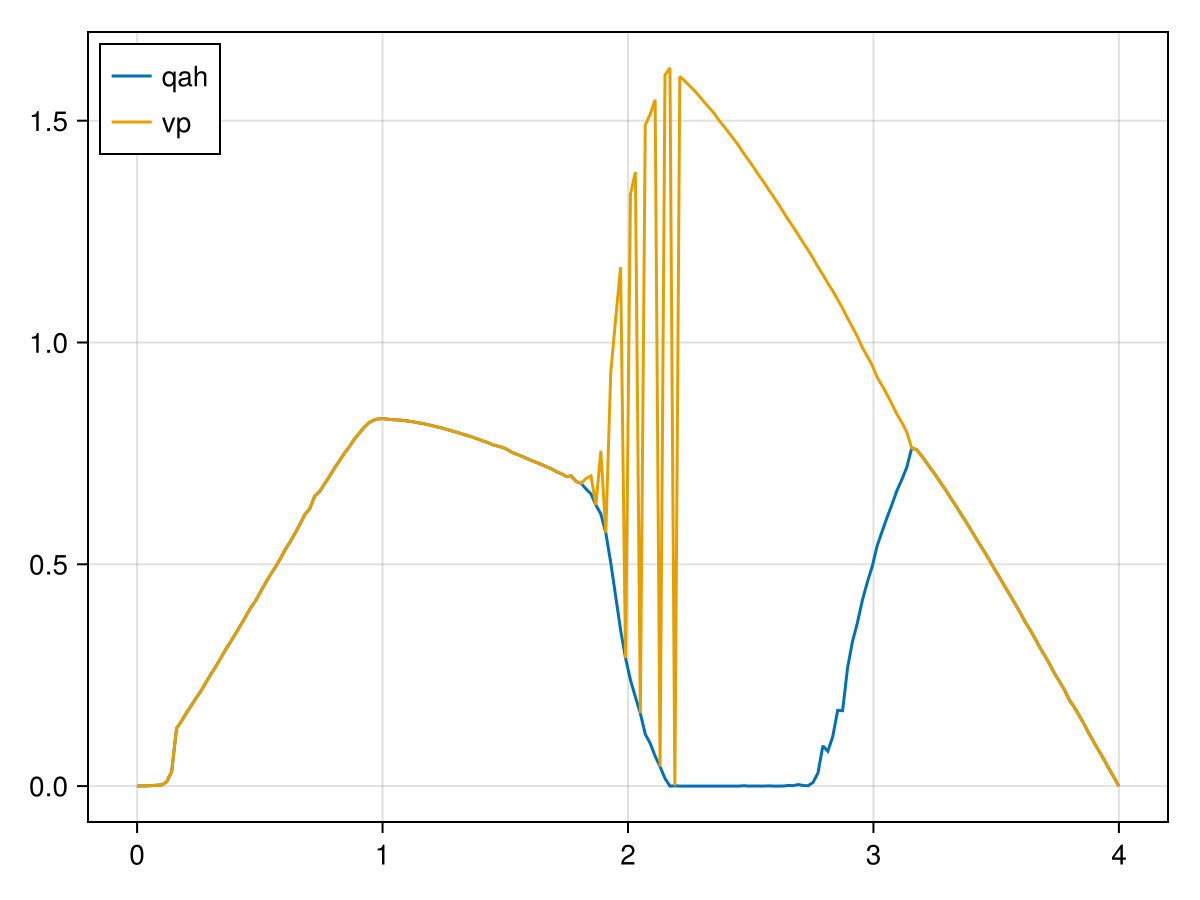

In [38]:
t1 = tauz(simportedqah)
t2 = tauz(simportedvp)
fig = Figure()
ax = Axis(fig[1,1]) 
lines!(ax, simportedvp.ns, t1, label = "qah")
lines!(ax, simportedvp.ns, t2, label = "vp")
axislegend(ax, position = :lt)
fig

### Selfconsistent

In [307]:
# Define number of grid points
# RUN Self-consistent bands Heavy Fermion section

integrand(q) = k_linear_magnetorresistance(:x, :x, :x, 
    ParamsHF(p, μ = sd.mus[itn]), q, diagm(sd.ofmats[itn]); T = 1, τ = 200,
    Ω_contr = true, omm_contr = false, fermi_surface = false)
M, xmin, xmax = int_boundaries(p)
a = [-xmax[1], xmin[2]];
b = [xmax[1], xmax[2]];

n = 40  # resolution (100x100 grid)
# Generate grid points
x = range(a[1], b[1], length=n)
y = range(a[2], b[2], length=n)


# Evaluate f on the grid
Z = [integrand([xi, yi]) for xi in x, yi in y];  # notice: [row, column] ordering


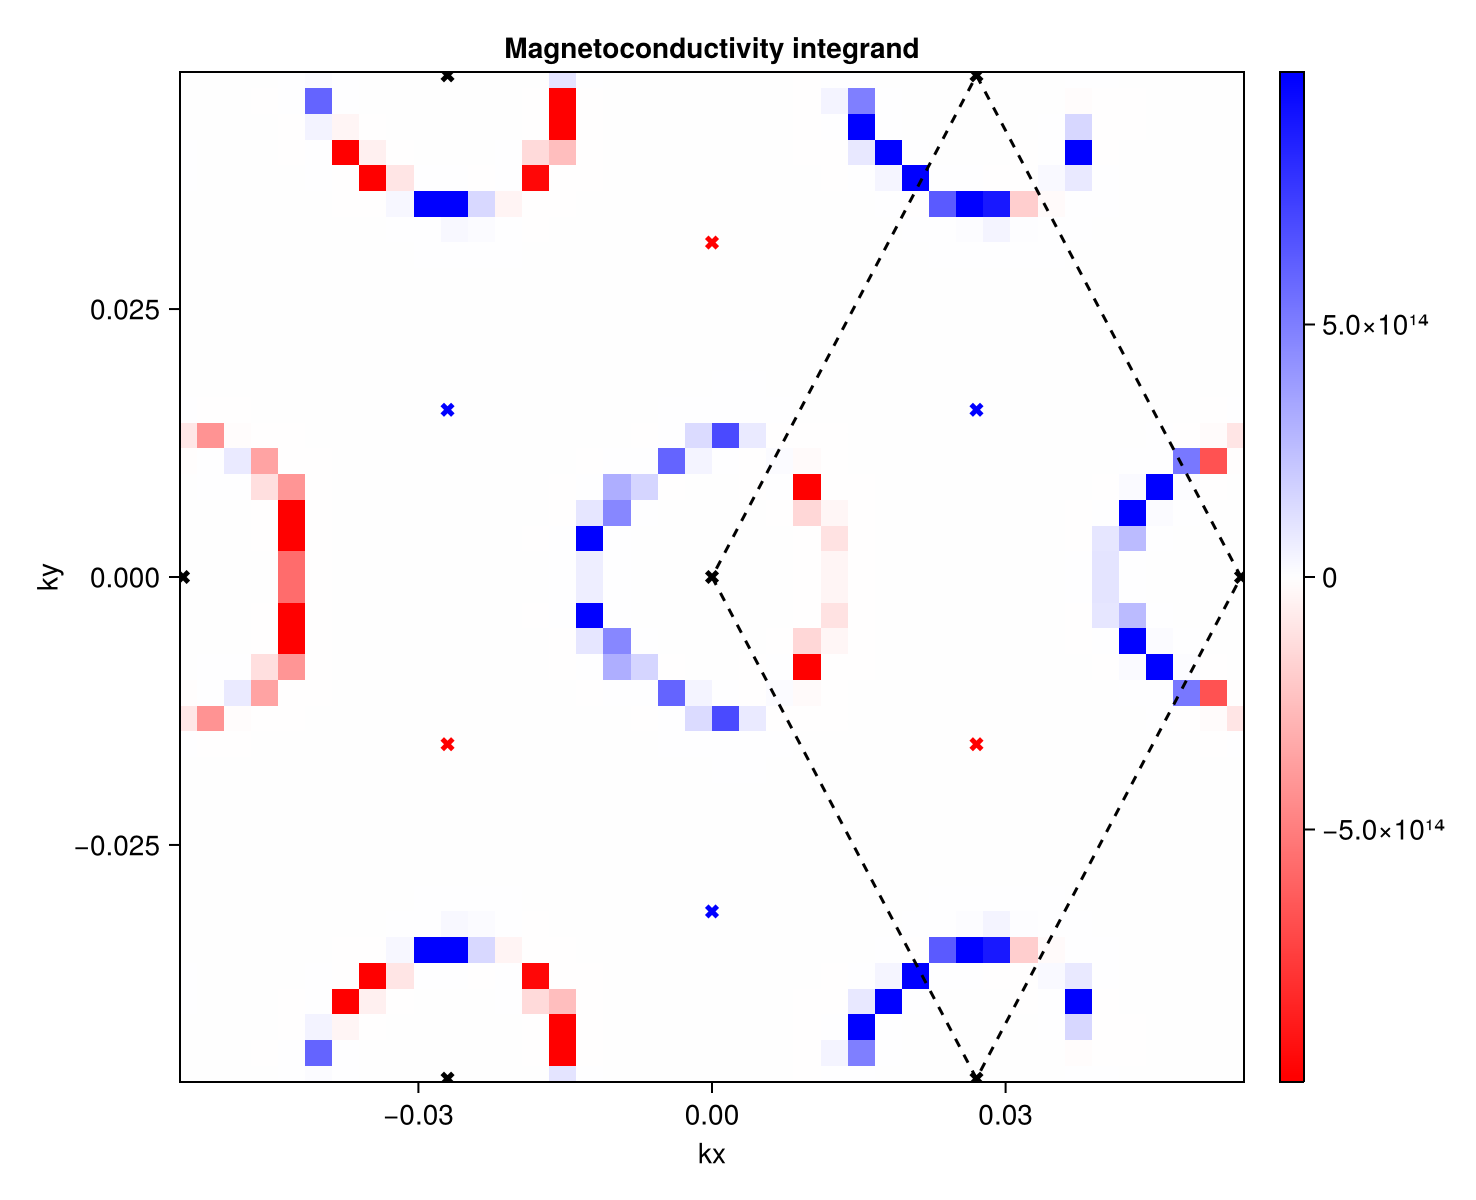

In [309]:

# Create the density plot

vis = 1e15
fig = Figure(size=(1.23*600,600))
ax = Axis(fig[1, 1], xlabel="kx", ylabel="ky", title="Magnetoconductivity integrand")
# heatmap!(ax, x, y, Z, colormap=:redsblues)#, colorrange=(-1, 1.0).*vis)
cmap = cgrad([:red, :white, :blue])
hm = heatmap!(ax, x, y, real(Z), colormap=cmap, colorrange=(-1, 1.0).*vis)
BZdecorations!(p, ax)
# Colorbar(fig[1,2], ax)  # Add a colorbar
cb = Colorbar(fig[1, 2], hm)
xlims!(ax, a[1]-ϵ, b[1]+ϵ)
ylims!(ax, a[2]-ϵ, b[2]+ϵ)
fig

#### Electron density

In [301]:
electron_density(p, sd; evals = 10000) / 10^4 # in #electrons/cm^{2}

8.942366859151096e12

#### Fermi Surface

In [231]:
# Define number of grid points
integrand(q) = k_linear_magnetorresistance(:x, :x, :x, 
    ParamsHF(p, μ = sd.mus[1]), q, diagm(sd.ofmats[1]); T = 1, τ = 200,
    Ω_contr = true, omm_contr = true, fermi_surface = true)
M, xmin, xmax = int_boundaries(p)
# a = [0, xmin[2]];
# b = [xmax[1]/2, xmax[2]];
a = [-xmax[1], xmin[2]];
b = [xmax[1], xmax[2]];
n = 50  # resolution (100x100 grid)

# Generate grid points
x = range(a[1], b[1], length=n)
y = range(a[2], b[2], length=n)

# Evaluate f on the grid
Z = [integrand([xi, yi]) for xi in x, yi in y];  # notice: [row, column] ordering

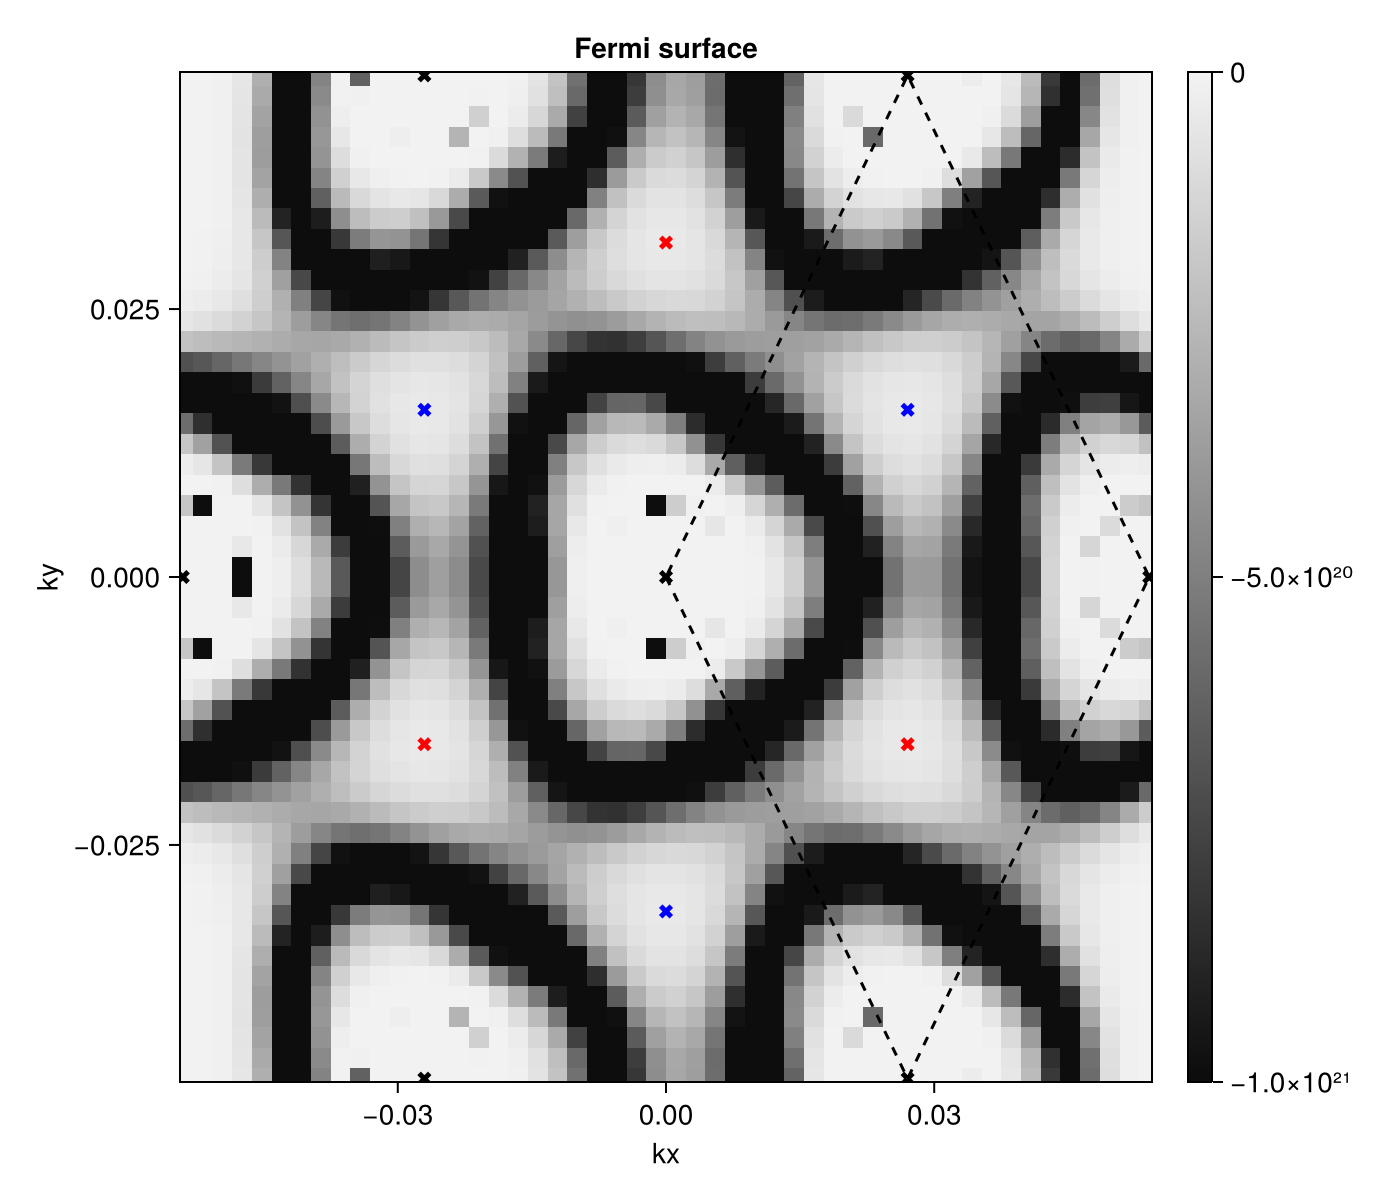

In [232]:

# Create the density plot
vis = 1e21
ϵ = norm(K1)/100
fig = Figure(size=(1.154*600,600))
ax = Axis(fig[1, 1], xlabel="kx", ylabel="ky", title="Fermi surface")
# heatmap!(ax, x, y, Z, colormap=:redsblues)#, colorrange=(-1, 1.0).*vis)
hm = heatmap!(ax, x, y, Z, colormap=:grays, colorrange=(-1, 0).*vis)
BZdecorations!(p, ax)
xlims!(ax, a[1]-ϵ, b[1]+ϵ)
ylims!(ax, a[2]-ϵ, b[2]+ϵ)
cb = Colorbar(fig[1, 2], hm)

# Colorbar(fig[1,2], ax)  # Add a colorbar
fig

#### Integral

In [479]:
# of = diagm([1,1,1,1,0,0,0,0]) .*2
# # of0 = diagm(ones(8) .* 0.5)
# hf_plotbands(ParamsHF(p, μ = 0), of, kpoints = 101, res = (1.5*600,1.5*400))

In [242]:

#of = diagm(rand(8))
magneto_conductivity(:x, :x, :x, ParamsHF(p, μ = 0), of, T = 10, τ = 200, evals = 10,
    Ω_contr = true, omm_contr = true)

UndefVarError: UndefVarError: `of` not defined

In [ ]:
A =  0.0025297643588104214 # area of the BZ

#### Density of states at the Fermi level

In [239]:
τp = 200
N0 = -magneto_conductivity(:x, :x, :x, p, sd, T = 1, τ = τp, evals = 5000,
    fermi_surface = true)*(ang_to_m^2)/(τp*femto_to_seconds) #units #kpoints/Å^2 meV

6.559837527117984e-5

Self consistent dos with the filling

In [523]:
function DOS_selfconsistent(p, fillings; config = SelfConsistency_config_random(1e-6, 4, 1, 1, 30))
    DOS = []
    for ν in fillings
        sof, sμ, se = guided_sweep(:β, p, config, [ν])
        sd = Self_consistent_data(sof, sμ, se, ν) 
        N0 = -magneto_conductivity(:x, :x, :x, p, sd, T = 10, τ = τp, evals = 500,
        fermi_surface = true)*(ang_to_m^2)/(τp*femto_to_seconds)
        append!(DOS, N0)
    end
    return DOS
end

DOS_selfconsistent (generic function with 2 methods)

In [526]:
fillings = 0:0.05:3.999
mydos = DOS_selfconsistent(p, config, fillings)

Progress: 0.0%
0.. Rand seed: 1
 1.. It: 1 with Of: [0.0589, 0.9096, 0.061, 0.9146, 0.0537, 0.9225, 0.06, 0.9261]
 2.. It: 2 with Of: [0.0616, 0.9378, 0.0643, 0.9403, 0.0616, 0.938, 0.0643, 0.9404]
 3.. It: 3 with Of: [0.0605, 0.9368, 0.063, 0.9394, 0.0605, 0.9368, 0.063, 0.9394]
 4.. It: 4 with Of: [0.0606, 0.9369, 0.0631, 0.9395, 0.0606, 0.9369, 0.0631, 0.9395]
energy: -13162.782622249208
 TIME: 2706 milliseconds
Energy without penalities:-13162.782622249208
Progress: 0.0%
0.. Rand seed: 1
 1.. It: 1 with Of: [0.014, 0.9321, 0.0588, 0.9212, 0.0586, 0.9311, 0.0688, 0.93]
 2.. It: 2 with Of: [0.061, 0.9379, 0.0641, 0.9402, 0.1761, 0.9418, 0.0643, 0.9403]
 3.. It: 3 with Of: [0.0591, 0.9353, 0.0615, 0.938, 0.1749, 0.9399, 0.0615, 0.938]
 4.. It: 4 with Of: [0.0593, 0.9355, 0.0617, 0.9382, 0.1751, 0.9401, 0.0617, 0.9382]
energy: -13161.951948252447
 TIME: 2763 milliseconds
Energy without penalities:-13161.951948252447
Progress: 0.0%
0.. Rand seed: 1
 1.. It: 1 with Of: [0.0564, 0.9265, 0

80-element Vector{Any}:
 4.3774144716288986e-5
 4.1102755158603524e-5
 4.5779894657059546e-5
 4.264135675654276e-5
 4.485076452690312e-5
 5.684785831836835e-5
 5.963508219298237e-5
 3.9463928313332866e-5
 6.736582345684225e-5
 5.568927372251461e-5
 ⋮
 4.251851390129224e-5
 4.0819011612533184e-5
 5.733227064863141e-5
 5.193022102131948e-5
 4.241490704004475e-5
 4.337368940893094e-5
 4.2258396281373365e-5
 5.536521421891138e-5
 5.527490657216989e-5

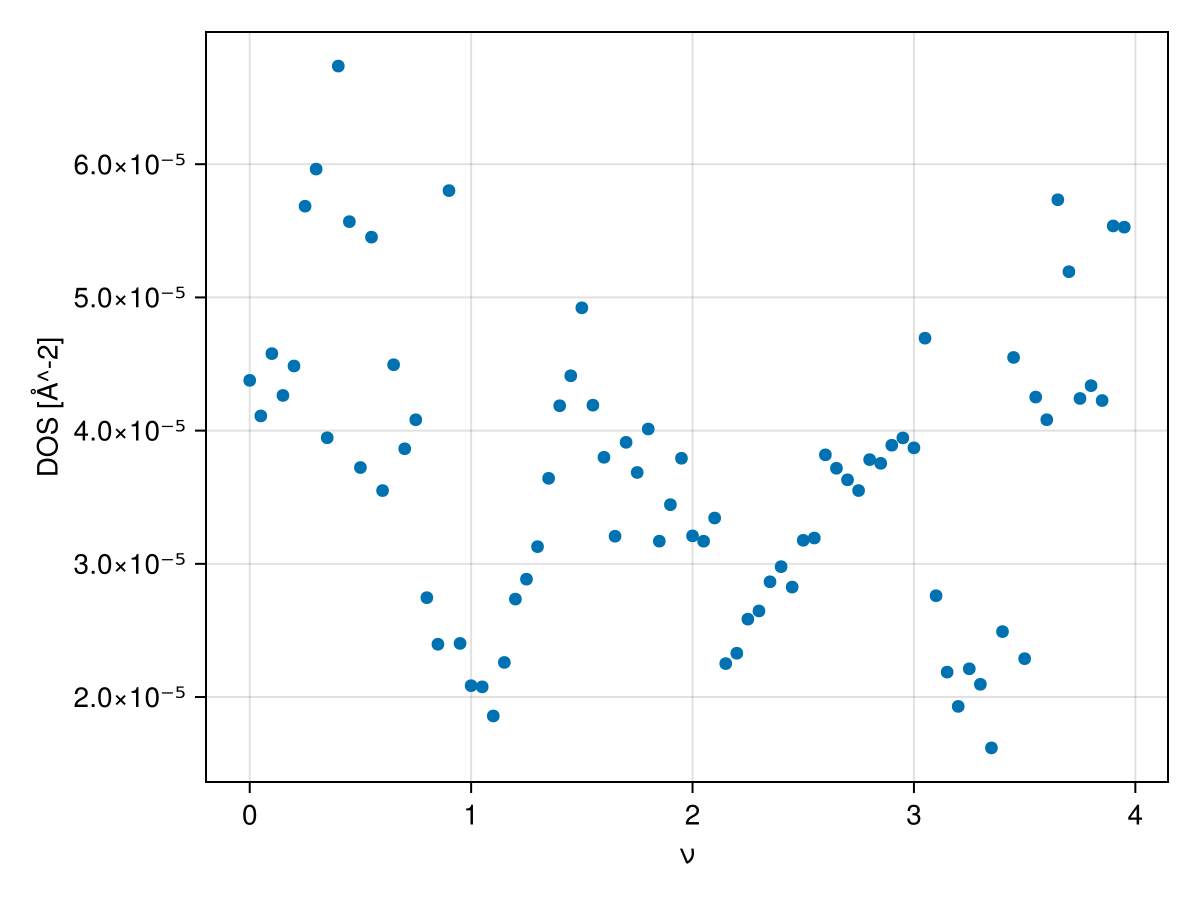

In [528]:
fig = Figure()
ax = Axis(fig[1,1], xlabel = "ν", ylabel = "DOS [Å^-2]")
scatter!(ax, fillings, [m for m in mydos])
fig

#### Self-consistent integral

In [332]:
magneto_conductivity(:x, :x, :x, p, sd, T = 1000, τ = 200, evals = 400,
    Ω_contr = true, omm_contr = true, fermi_surface = false)

-3.0450042949323292e-5

In [83]:
it = 30
simportedqah.ns[it]

0.5829145728643216

In [107]:
magneto_conductivity(:x, :x, :x, ParamsHF(pimported, μ = simportedqah.mus[it]), diagm(simportedqah.ofmats[it]),
  T = 0.1, τ = 200, evals = 40000, Ω_contr = true, omm_contr = true, fermi_surface = false)

6.036456071800199e-5

##### Convergence tests

In [426]:
conv_xs = [2^l for l in 1:12]
conv_list = [magneto_conductivity(:x, :x, :x, p, sd, T = 10, τ = 200, evals = it,
    Ω_contr = true, omm_contr = false) for it in conv_xs]

12-element Vector{Float64}:
 4.3976481709434515e-9
 4.3976481709434515e-9
 4.3976481709434515e-9
 4.3976481709434515e-9
 3.28747618978529e-9
 1.6646384363067327e-9
 1.3534974593952797e-9
 1.7306071274265184e-9
 3.4239936305571604e-9
 4.47851131761299e-9
 4.2726544180788134e-9
 4.270490624449422e-9

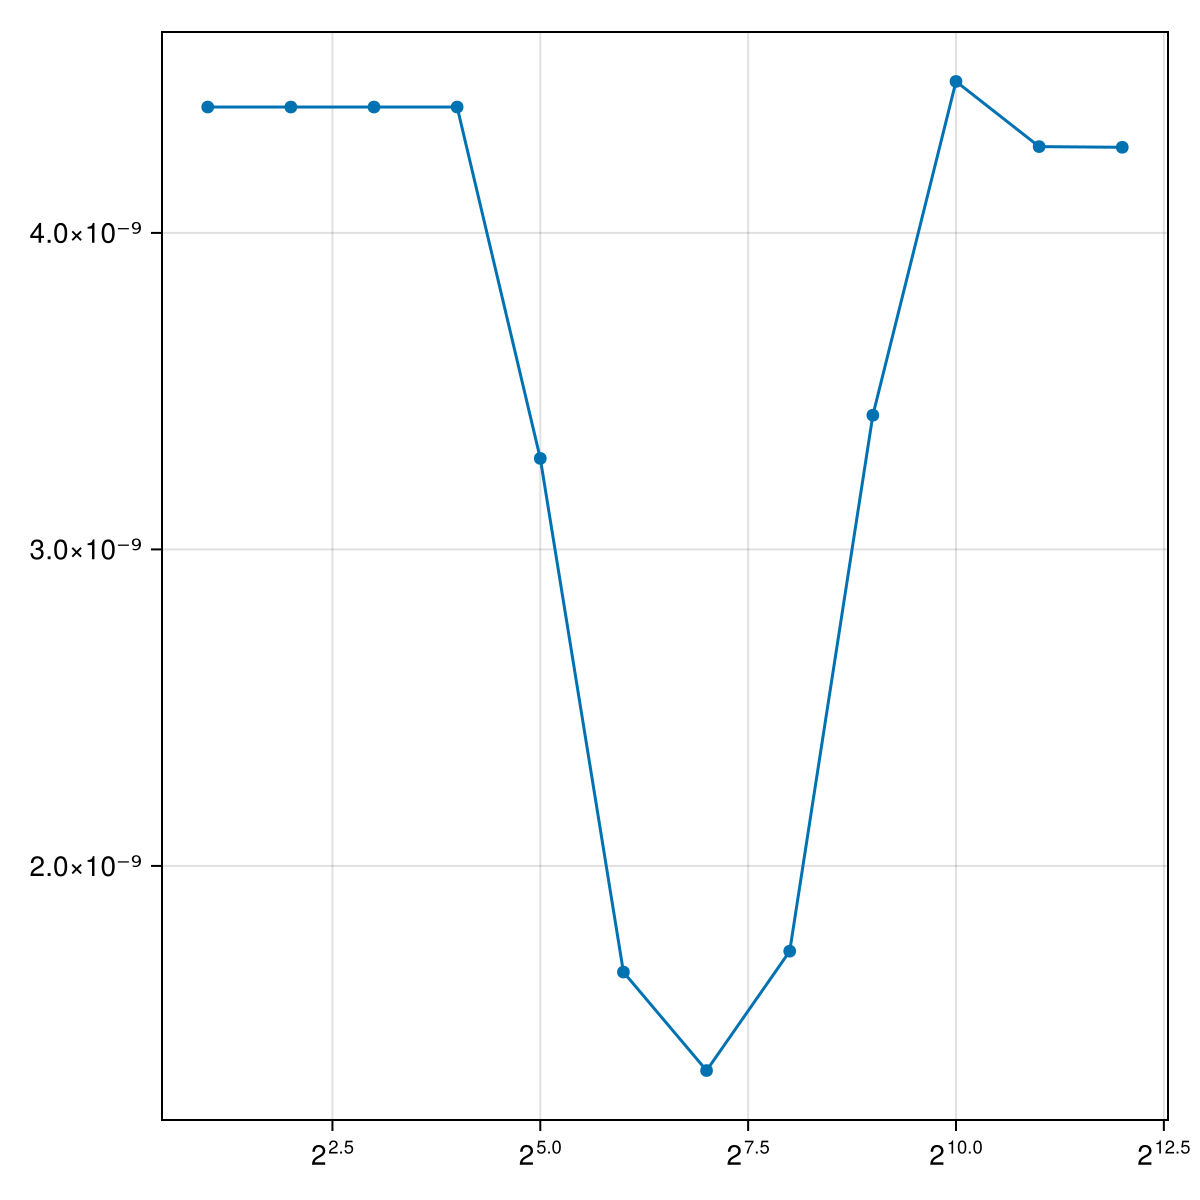

In [433]:
fig_conv = Figure(size = (600,600))
ax = Axis(fig_conv[1,1], xscale = log2)
scatter!(ax, conv_xs, conv_list)
lines!(ax, conv_xs, conv_list)

fig_conv

conv_xs = [2^l for l in 1:14]
conv_list = [magneto_conductivity(:x, :x, :x, p, of0, T = 2, τ = 1e-5, evals = it) for it in conv_xs]

###### Non interacting MC

In [23]:
magneto_conductivity(:x,:x,:x, p, of0, T = 2, τ = 1e-5, evals = 1000)

-8.087497872943983e-12

## Import selfconsistent data

#### Load data

In [4]:
function provide_folder_get_observables_atlas_reshuffled(folder, rs = "rs")
    str = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/cluster_temp/exportdata"* "/" * string(folder)
       es_path = str * "/joined_es_"*rs*".csv"
       mus_path = str * "/joined_mus_"*rs*".csv"
       ns_path = str * "/joined_ns_"*rs*".csv"
       ofmats_path = str * "/joined_ofmats_"*rs*".csv"
       s = return_variables_reshuffled(es_path,mus_path, ns_path, ofmats_path )
       Self_consistent_data(s[1], s[2], s[3], s[4])
end

provide_folder_get_observables_atlas_reshuffled (generic function with 2 methods)

In [6]:
folder = 2281379#2281278
simportedvp = provide_folder_get_observables_atlas_reshuffled(folder,  "vp")
simportedqah = provide_folder_get_observables_atlas_reshuffled(folder,  "qah")

Self_consistent_data([[0.09248597839072112, 0.908853201771746, 0.0924933035449448, 0.9088589101910344, 0.09248597838969216, 0.90885320177277, 0.09222112819114495, 0.859951488489925], [0.15101352818867486, 0.9068628972476661, 0.15077382374336623, 0.9068635358602989, 0.09017338682520522, 0.9064929391669588, 0.09017338682640343, 0.90649293916569], [0.1729167151552881, 0.907514342122199, 0.09069654480705693, 0.9070457271730571, 0.09069276272222107, 0.9070393091545979, 0.09069654482063129, 0.907045727158133], [0.18240332777761858, 0.9075444215784596, 0.09056584386716382, 0.906908937150437, 0.09056196015715325, 0.9069021606210251, 0.09056584388014072, 0.9069089371368], [0.19301422816973526, 0.907582845853099, 0.09042016695866993, 0.9067550319592647, 0.09041642207528787, 0.9067480594872857, 0.09042016695867028, 0.906755031959264], [0.20819353320367368, 0.907533720934867, 0.0902092937689471, 0.9065268977565859, 0.09021540724195691, 0.9065373030920587, 0.0902092937681701, 0.90652689775743], [0.

In [9]:
l = readparams(folder);
pimported = ParamsHF(paramsHF(1.05, 1,  1),
    μ = 0,
    nf = l.nf[1],
    λ = l.λ[1],
    M = l.M[1],
    v = l.v[1],
    vp = l.vp[1],
    γ =l.γ[1],
    sigmaz = l.sigmaz[1],
    sigmazlayerz = l.sigmazlayerz[1],
    U1 = l.U1[1],
    U2 = l.U2[1],
    J = 0*l.J[1],
    VP =l.VP[1],
    twovalleystwospins= l.twovalleystwospins[1]);


In [10]:
l.vp

1-element Vector{Float64}:
 2000.0

#### Bands for the QAH and VH states

In [18]:
filling = 3
itn = argmin(abs.(simportedvp.ns .- filling))

150

ν=2.9949748743718594
 nf =[0.87, 0.89, 0.49, 0.89, 0.87, 0.89, 0.17, 0.88]


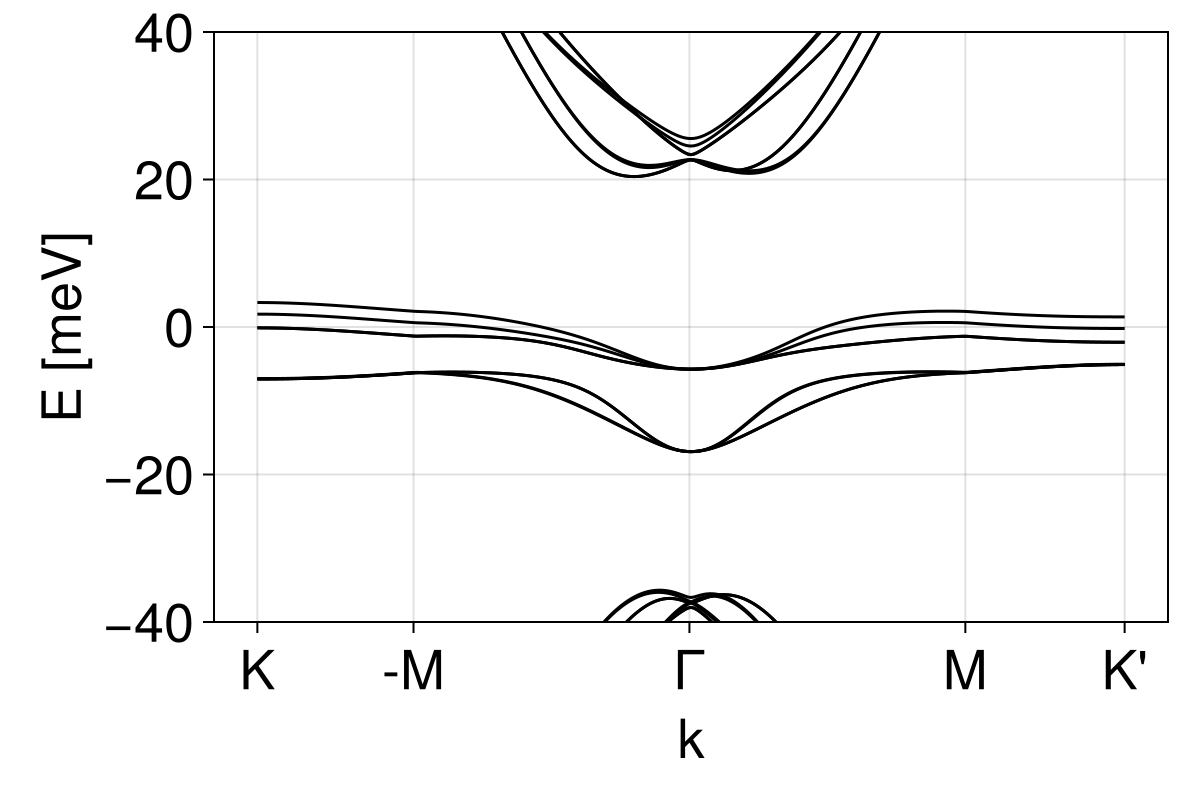

In [19]:
println("ν=", simportedvp.ns[itn])
println(" nf =", round.(simportedvp.ofmats[itn],digits = 2))
hf_plotbands(ParamsHF(pimported, μ = simportedvp.mus[itn]), diagm(simportedvp.ofmats[itn]), kpoints = 101, res = (600,400), ylims = [-15,15])   



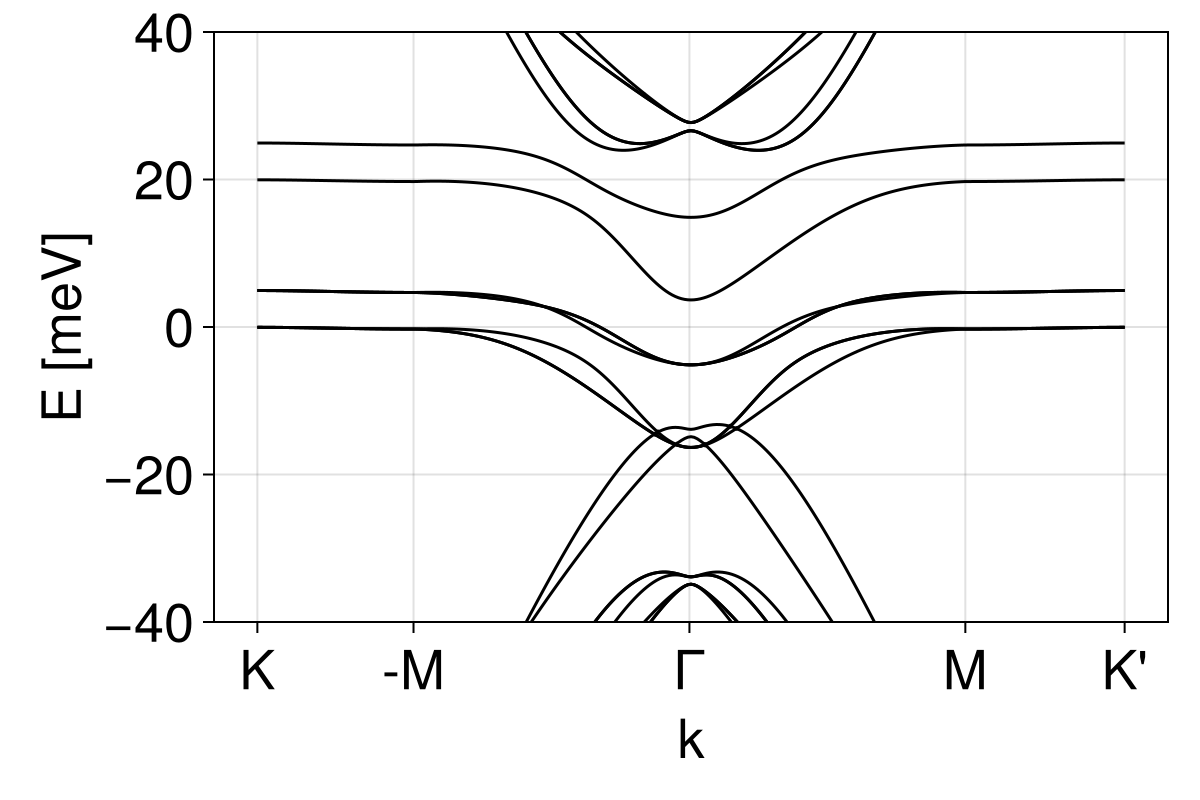

In [65]:
hf_plotbands(ParamsHF(pimported, μ = 0), diagm(simportedqah.ofmats[itn]), kpoints = 101, res = (600,400), ylims = [-15,15])

### Magnetorresistance over imported data

In [257]:
magneto_conductivity(:x, :x, :x, ParamsHF(pimported, μ = simportedvp.mus[itn]), 
diagm(simportedvp.ofmats[itn]), T = 0.1, τ = 200, evals = 100000, Ω_contr = true, omm_contr = true, fermi_surface = false)

-0.0005542616966999506

In [258]:
magneto_conductivity(:x, :x, :x, ParamsHF(pimported, μ = simportedqah.mus[itn]), 
diagm(simportedqah.ofmats[itn]), T = 0.1, τ = 200, evals = 100000, Ω_contr = true, omm_contr = true, fermi_surface = false)

0.0001382083743173613

##### Valley Hall

In [489]:
ns, mcvh = mc_sweep(:x, :x, :x, pimported, simportedvp; 
    T = 1, τ = 200, evals = 5120, Ω_contr = true, omm_contr = true, fermi_surface = false)

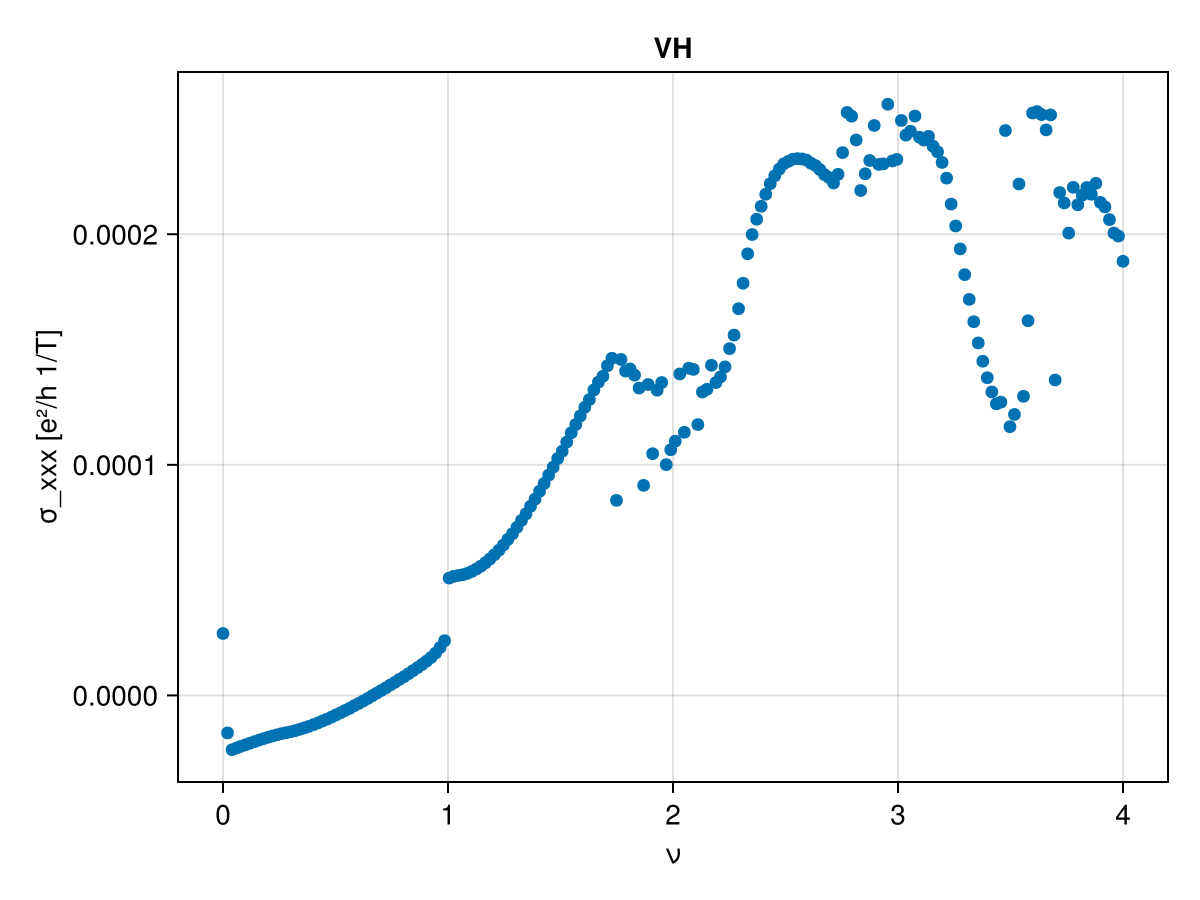

In [464]:
fig = Figure()
ax = Axis(fig[1,1], xlabel = "ν", ylabel = "σ_xxx [e²/h 1/T]", title = "VH")
scatter!(ax, [n for n in ns], [m for m in mcvh])
fig

##### Anomalous Hall

In [8]:
ns, mcqah = mc_sweep(:x, :x, :x, pimported, simportedqah; 
    T = 1, τ = 200, evals = 5120, Ω_contr = true, omm_contr = true, fermi_surface = false)

progress: 0.005 |  val: 9.240846214892541e-5
progress: 0.01 |  val: -0.00010580562941458657
progress: 0.015 |  val: -0.00012223536397734815
progress: 0.02 |  val: -0.0001366963031208039
progress: 0.025 |  val: -0.00015111870241575184
progress: 0.03 |  val: -0.00016506966941396466
progress: 0.035 |  val: -0.00017331935024200173
progress: 0.04 |  val: -0.00016360042496774344
progress: 0.045 |  val: -4.955604963553906e-5
progress: 0.05 |  val: -3.100449549275924e-5
progress: 0.055 |  val: -7.372509781567268e-5
progress: 0.06 |  val: 0.00032138602209528985
progress: 0.065 |  val: 5.302311901773812e-6
progress: 0.07 |  val: -1.4453937888636079e-5
progress: 0.075 |  val: -0.00012510069339952506
progress: 0.08 |  val: 7.734687240872613e-5
progress: 0.085 |  val: 1.3832529443622704e-5
progress: 0.09 |  val: -7.346057731298076e-5
progress: 0.095 |  val: 0.00020511560888868924
progress: 0.1 |  val: 3.4395859377120246e-5
progress: 0.105 |  val: 0.00029736164116968554
progress: 0.11 |  val: 0.0001

([0.0, 0.020100502512562814, 0.04020100502512563, 0.06030150753768844, 0.08040201005025126, 0.10050251256281408, 0.12060301507537688, 0.1407035175879397, 0.16080402010050251, 0.18090452261306533  …  3.819095477386935, 3.8391959798994977, 3.85929648241206, 3.879396984924623, 3.899497487437186, 3.919597989949749, 3.9396984924623117, 3.959798994974874, 3.979899497487437, 4.0], Any[9.240846214892541e-5, -0.00010580562941458657, -0.00012223536397734815, -0.0001366963031208039, -0.00015111870241575184, -0.00016506966941396466, -0.00017331935024200173, -0.00016360042496774344, -4.955604963553906e-5, -3.100449549275924e-5  …  -9.546756245126057e-7, -5.951759003361987e-6, -1.0643351660751598e-6, 3.921431528934951e-7, -0.00010833996446551602, -4.369914274631802e-6, -5.127563850686262e-6, -3.2325481603070954e-7, 0.0001757660881353476, -3.084433688649997e-6])

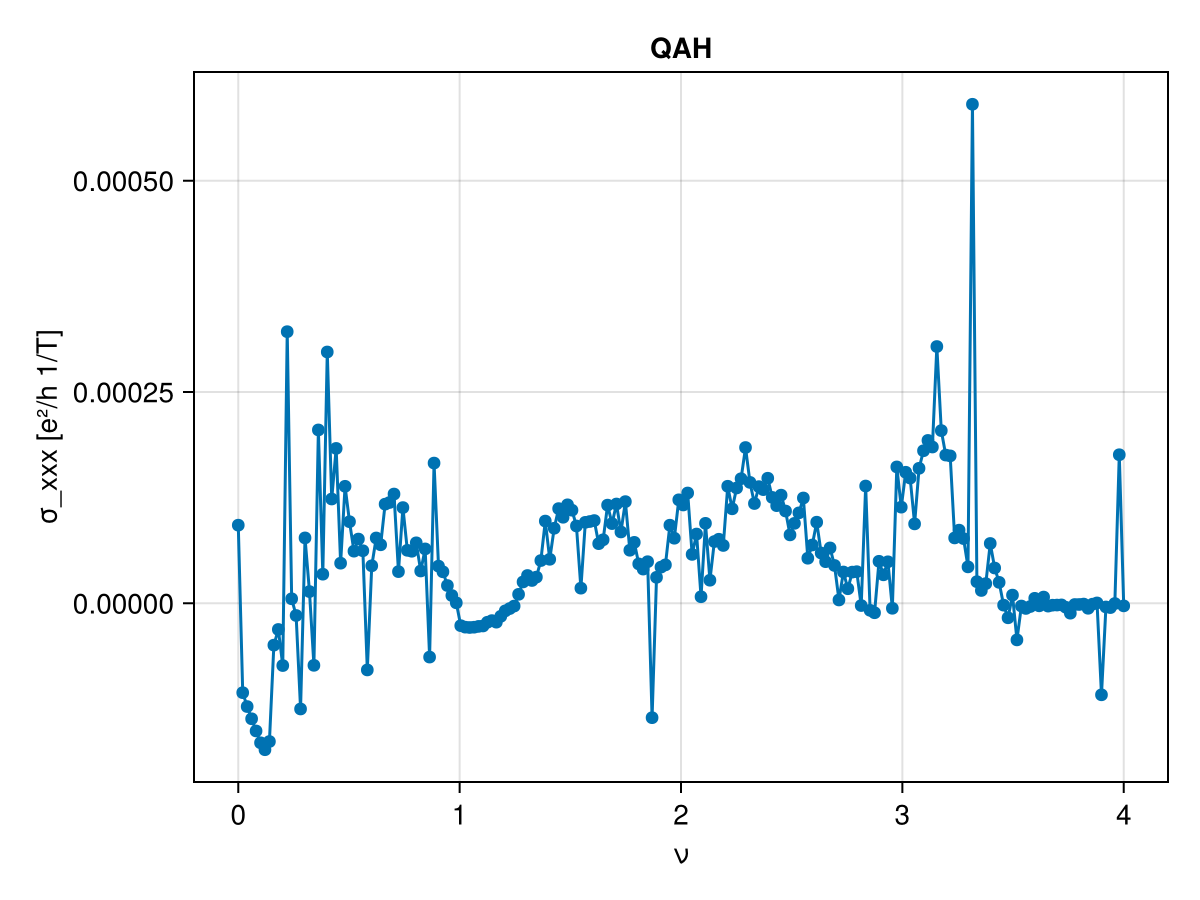

In [15]:
fig = Figure()
ax = Axis(fig[1,1], xlabel = "ν", ylabel = "σ_xxx [e²/h 1/T]", title = "QAH")
scatter!(ax, [n for n in ns], [m for m in mcqah])
lines!(ax, [n for n in ns], [m for m in mcqah])
fig

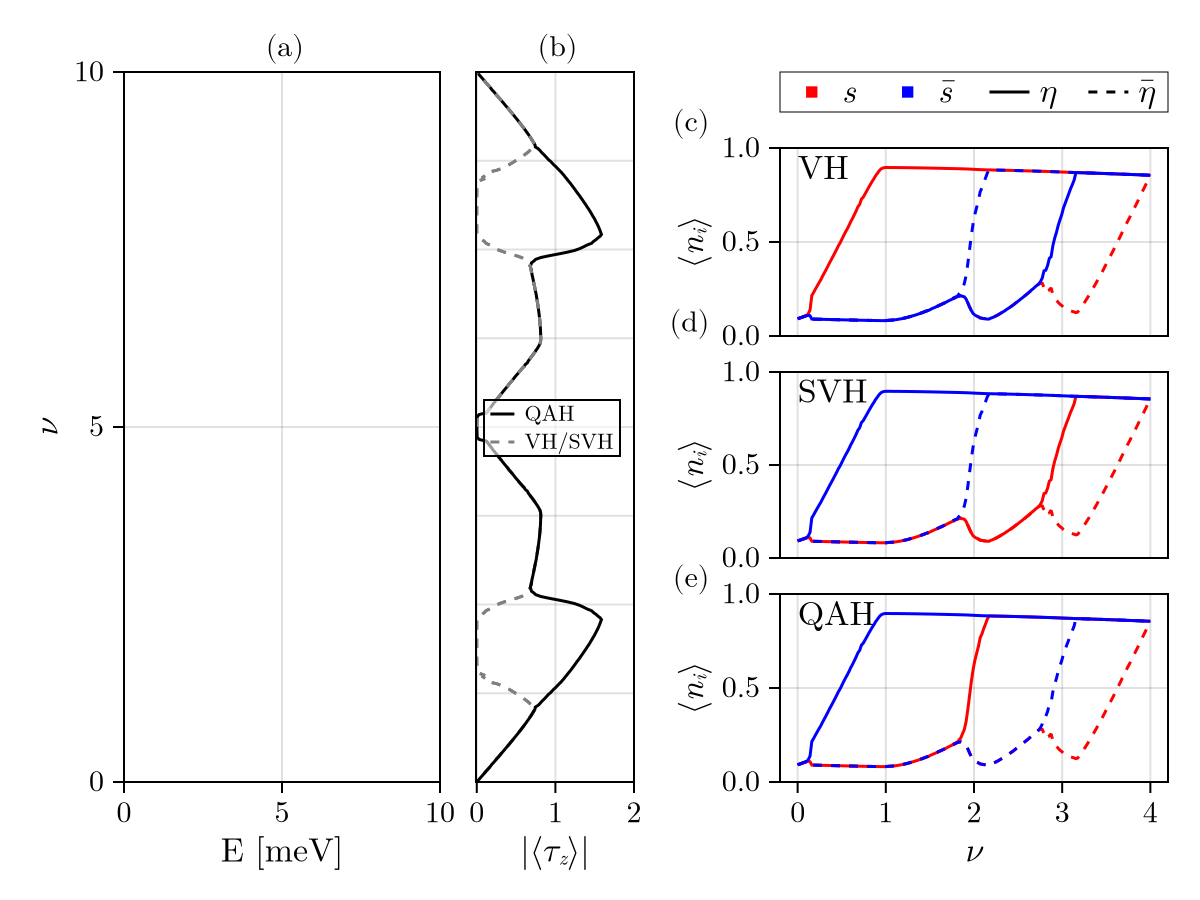

In [14]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/figures_arxiv_v1.jl")
lat_fig2(folder)

### B-independent \sigma_xx conductivity

In [180]:
in_plane_bindependent_conductivity(:x, ParamsHF(pimported, μ = simportedvp.mus[it]), 
    diagm(simportedvp.ofmats[it]), T = 10, τ = 200, evals = 4000)

-0.5293577074816685

### sigma_xxx/sigma_xx [1/T]

In [176]:
magneto_conductivity(:x, :x, :x, ParamsHF(pimported, μ = simportedvp.mus[it]), 
diagm(simportedvp.ofmats[it]), T = 10, τ = 200,
    evals = 4000, Ω_contr = true, omm_contr = true, fermi_surface = false)

-1.1060341354207312e-5

In [199]:

mc_ratio(:x, :x, :x, ParamsHF(pimported, μ = simportedvp.mus[it]), diagm(simportedvp.ofmats[it]),
  T = 10, τ = 200, evals = 4000, Ω_contr = true, omm_contr = true)

(-1.1060341354207312e-5, -0.5293577074816685, 2.0893889326416066e-5)

## Atlas Calculations

### Substrate

In [561]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_module.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_read_atlas")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_atlas_plotters.jl")

plot_mc_atlas_rat (generic function with 3 methods)

In [263]:
# PID = "MR2604173-2281278"
# PID = "MR2604409-2281278"
# PID = "MR2605392-2281278"
# PID = "MR2606874-2281278"
# PID = "MR2607521-2281278"
#PID = "MR2608158-2281278"
# PID = "MR2604408-2281278"
# PID = "MR2604411-2281278"
# PID = "MR2606873-2281278"
# PID = "MR2607520-2281278"
# PID = "MR2608156-2281278" # T = 1 100000
#  PID2 = "MR2608150-2281278"  # QAH 100000 1K  T = 1 100000
PID = "MR2608157-2281278" # vp 100000 5K
PID2= "MR2608158-2281278"# qah 100000 5K
# PID ="MR2613437-2281278"
# PID2 = "MR2613539-2281278"
# No substrate
PID = "MR2620964-2618196" #1K


"MR2620964-2618196"

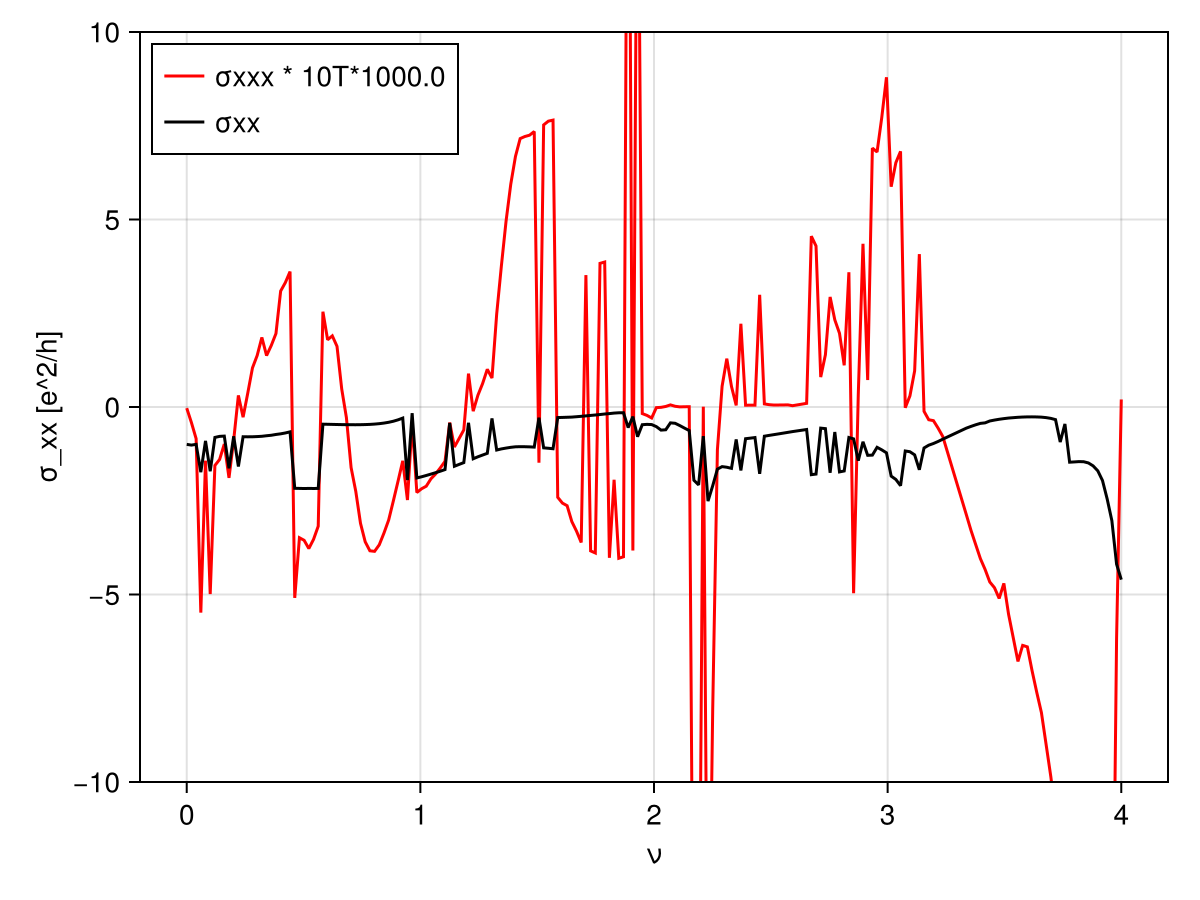

In [265]:

plot_mc_atlas(PID, ylims = (-10,10))

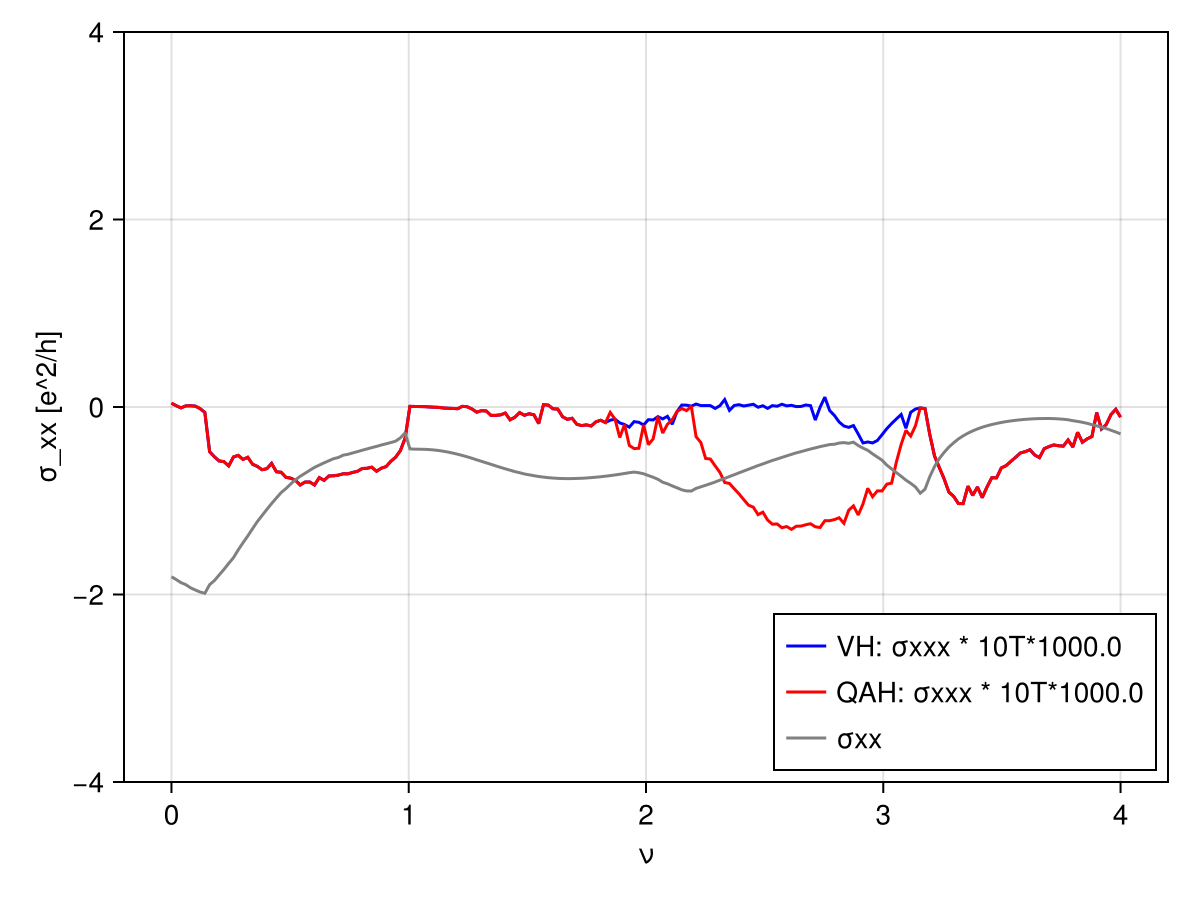

In [260]:
twoplot_mc_atlas(PID, PID2, ylims = (-4,4))

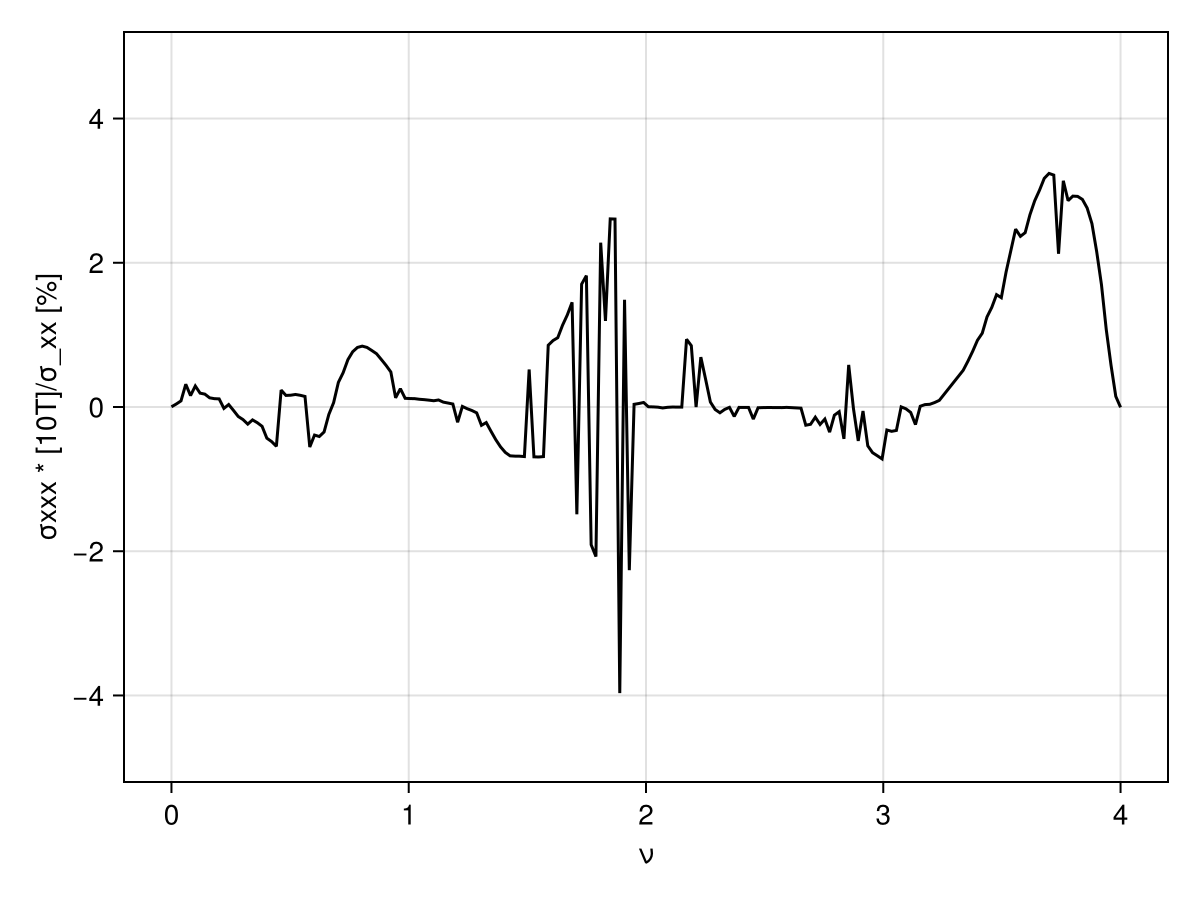

In [266]:
plot_mc_atlas_rat(PID, ylims = (-5.2,5.2))

In [589]:
nlist, mrlist = reshapemrdata(PID)

(Any[1.9899497487437185, 2.0100502512562812, 2.030150753768844, 2.050251256281407, 2.07035175879397, 2.090452261306533, 2.1105527638190953, 2.130653266331658, 2.150753768844221, 2.170854271356784  …  1.8090452261306533, 1.829145728643216, 1.849246231155779, 1.8693467336683418, 1.8894472361809045, 1.9095477386934674, 1.92964824120603, 1.949748743718593, 1.9698492462311559, 0.16080402010050251], Any[-4.731273215695355e-5, -5.8934934060623764e-5, -7.261906434448887e-5, -7.13726111551266e-5, -7.016808546579355e-5, -7.368425725428547e-5, -7.239442278621462e-5, -6.9464254898198e-5, -7.023908481289946e-5, -7.140725571776371e-5  …  7.382006955394195e-5, 7.371958852362402e-5, 7.18421182586218e-5, 8.044026368970996e-5, 7.612761454854505e-5, 7.011592941318045e-5, 5.3822364242735265e-5, 2.078415754409314e-5, -1.5466893538700185e-5, 0.00016247016754344554], Any[-0.7873630543356264, -0.7966997639011911, -0.8069806365669476, -0.8189603254078007, -0.8372674564693322, -0.8459600682237678, -0.8559563714

### Without substrate

In [8]:
function substrateoff(PID::Array)
    s = [substrateyesornot(p) for p in PID]
    numbers[findall(x-> x == false, s)]
end
substrateyesornot(PID::Number) = substrateyesornot(string(PID))
function substrateyesornot(PID::String)
    file = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/MRDATA/" * PID *"/1/" * "params.csv"
    if isfile(file)
        l = CSV.read(file, DataFrame)
        if :sigmaz in names(l) && :sigmazlayerz in names(l)
            return ifelse(abs(l.sigmaz[1] + l.sigmazlayerz[1]) > 1e-3, true, false)
        else 
            return ifelse(abs(l.sigmaz[1]) > 0, true, false)
        end
    else nothing end
end

readparams(PID::Number) = readparams(string(PID))
function readparams(PID::String)
    file = "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/MRDATA/" * PID *"/1/" * "params.csv"
    if isfile(file)
        l = CSV.read(file, DataFrame)
        return l
    end
end



readparams (generic function with 2 methods)

In [392]:
foldernosubstrate = 2281278#2618196
l = readparams(foldernosubstrate);
l

1×23 DataFrame
 Row │ J        KIVC   M        U1       U2       VP    c2ybreakingmass  n     ⋯
     │ Float64  Bool   Float64  Float64  Float64  Bool  Float64          Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1.0  false      5.0      5.0      0.0  true              0.0      0 ⋯
                                                              16 columns omitted

In [393]:
pnosubstrate = ParamsHF(paramsHF(1.05, 1,  1),
    μ = l.μ[1],
    nf = l.nf[1],
    λ = l.λ[1],
    M = l.M[1],
    v = l.v[1],
    vp = l.vp[1],
    γ =l.γ[1],
    sigmaz = l.sigmaz[1],
    sigmazlayerz = l.sigmazlayerz[1],
    U1 = l.U1[1],
    U2 = l.U2[1],
    J = l.J[1],
    VP =l.VP[1],
    twovalleystwospins= l.twovalleystwospins[1]);

In [394]:
simportedvpnosubs = provide_folder_get_observables_atlas_reshuffled(foldernosubstrate,  "vp")
simportedqahnosubs = provide_folder_get_observables_atlas_reshuffled(foldernosubstrate,  "qah")

Self_consistent_data([[0.09177345774687988, 0.9082266953889119, 0.09177332560351777, 0.9082265632458201, 0.09177345774707828, 0.9082266953886995, 0.09177332560324447, 0.90822656324608], [0.09511348277570118, 0.9082511047894717, 0.09488496101520044, 0.9082363274508053, 0.09506482891973579, 0.9082485860070545, 0.09488496101520041, 0.9082363274508], [0.09837451965982014, 0.9082578457346432, 0.09819466351798244, 0.9082466677698788, 0.09837451965980154, 0.9082578457346596, 0.09819466212611173, 0.908246668566111], [0.10245915358429471, 0.9083252464279664, 0.10138957737766345, 0.9082700970840478, 0.1014245880034912, 0.9082721917421305, 0.10138957737766344, 0.908270097084047], [0.1063219445813836, 0.908357447941392, 0.10450540358549186, 0.9082591487666652, 0.10465143137966329, 0.9082700749993093, 0.10450540358549182, 0.908259148766665], [0.10919545986212188, 0.9083505993834553, 0.10789113601393205, 0.9082876665175774, 0.10893827608404896, 0.9083380869167671, 0.107891136013932, 0.90828766651757

In [395]:
pos = findclosest(2, simportedvpnosubs.ns);
round.(simportedvpnosubs.ofmats[itn]', digits = 2)

1×8 Matrix{Float64}:
 0.89  0.9  0.2  0.9  0.2  0.9  0.32  0.9

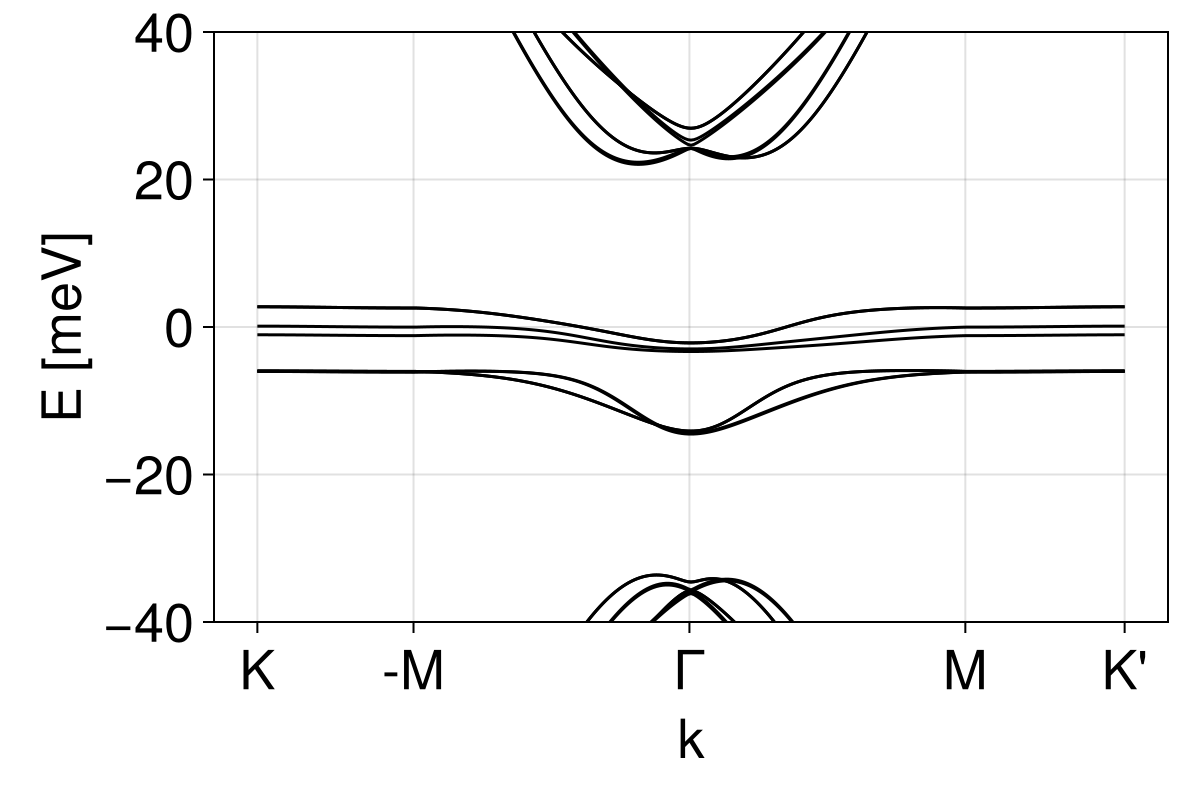

In [396]:
itn = pos
hf_plotbands(ParamsHF(pnosubstrate, μ = simportedvpnosubs.mus[itn]), 
simportedvpnosubs.ofmats[itn], kpoints = 101, res = (600,400), ylims = [-15,15])

In [335]:
ParamsHF(pnosubstrate, μ = 0*simportedvpnosubs.mus[itn]);

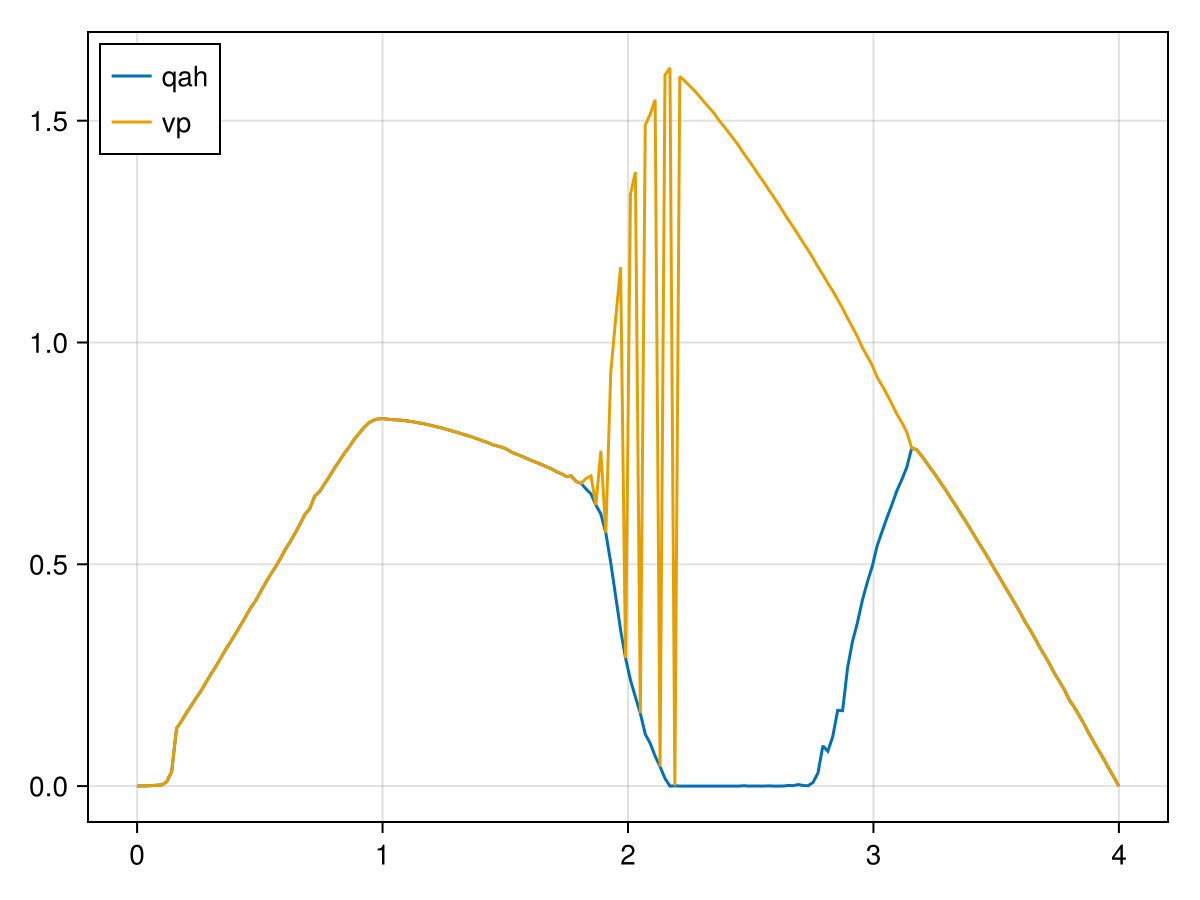

In [397]:
t1 = tauz(simportedqahnosubs)
t2 = tauz(simportedvpnosubs)
fig = Figure()
ax = Axis(fig[1,1]) 
lines!(ax, simportedqahnosubs.ns, t1, label = "qah")
lines!(ax, simportedvpnosubs.ns, t2, label = "vp")
axislegend(ax, position = :lt)
fig

In [390]:
function C2x(s::Self_consistent_data)
    c2pol = zeros(Float64,length(s.ofmats))
    for i in 1:length(s.ofmats)
        c2pol[i] = abs(sum(s.ofmats[i] .* [1, -1, 1, -1, 1, -1, 1, -1]))
    end
    c2pol
end

C2x (generic function with 1 method)

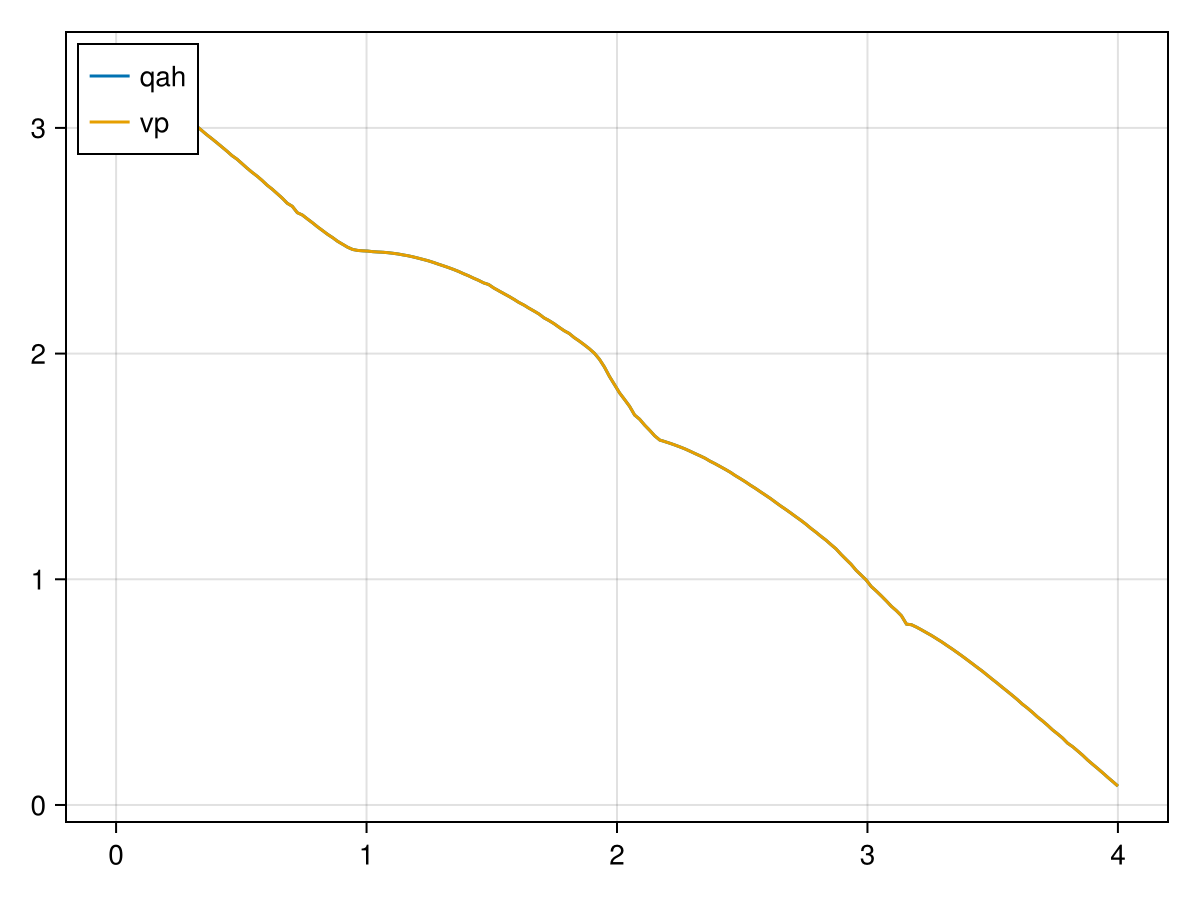

In [398]:
t1 =C2x(simportedqahnosubs)
t2 = C2x(simportedvpnosubs)
fig = Figure()
ax = Axis(fig[1,1]) 
lines!(ax, simportedqahnosubs.ns, t1, label = "qah")
lines!(ax, simportedvpnosubs.ns, t2, label = "vp")
axislegend(ax, position = :lt)
fig

In [389]:
simportedvpnosubs.ofmats[2]

8-element Vector{Float64}:
 0.8785817023723408
 0.13776891876383543
 0.12189883302571554
 0.8775231137270186
 0.8775224482564119
 0.12189811761617507
 0.877523113426816
 0.1218988333248555

In [291]:
l

1×23 DataFrame
 Row │ J        KIVC   M        U1       U2       VP    c2ybreakingmass  n     ⋯
     │ Float64  Bool   Float64  Float64  Float64  Bool  Float64          Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1.0  false      5.0      5.0      0.0  true              0.0      0 ⋯
                                                              16 columns omitted

In [108]:
lbrokensubs = readparams(2281278)

1×23 DataFrame
 Row │ J        KIVC   M        U1       U2       VP    c2ybreakingmass  n     ⋯
     │ Float64  Bool   Float64  Float64  Float64  Bool  Float64          Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1.0  false      5.0      5.0      0.0  true              0.0      0 ⋯
                                                              16 columns omitted

## Butterfly

In [254]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_atlas_plotters.jl")

butterflyvst (generic function with 6 methods)

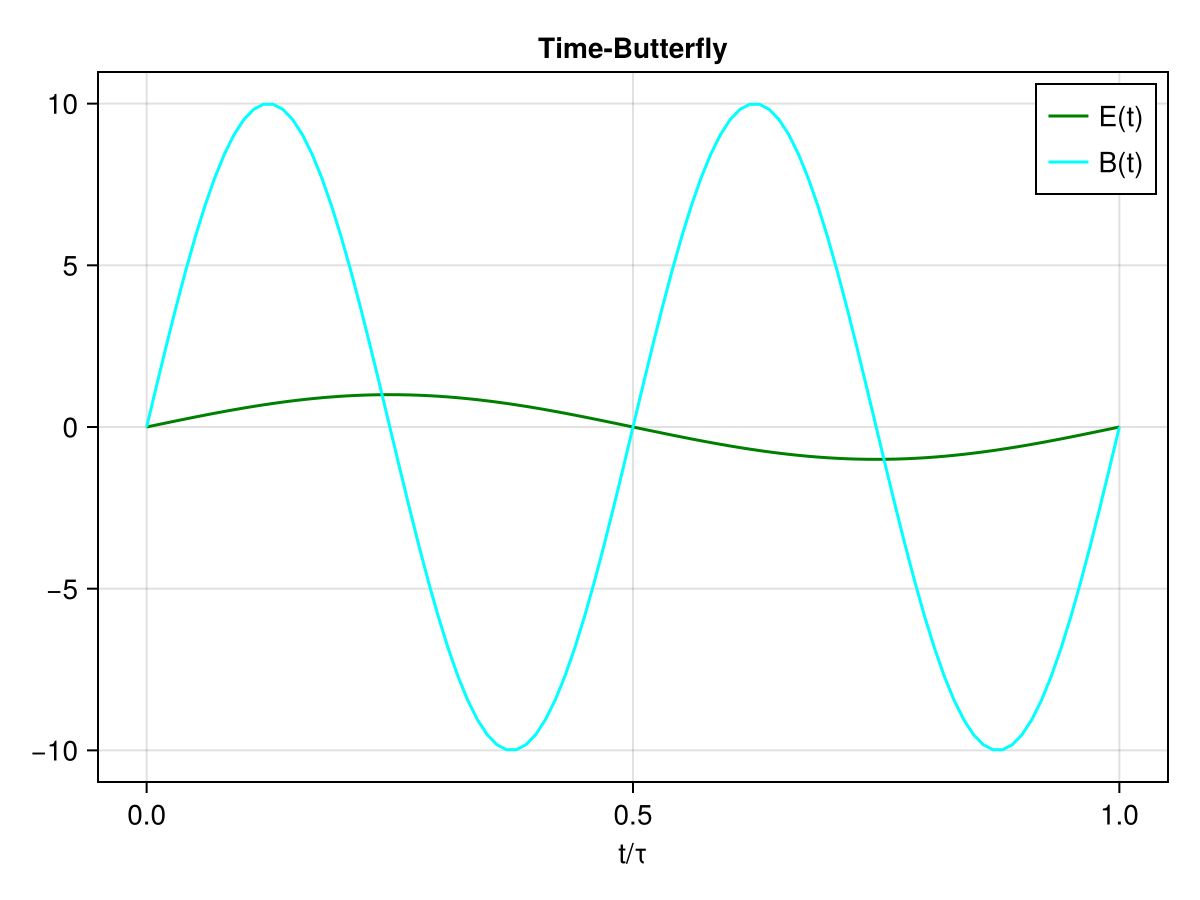

In [255]:
toτ = 0:.01:1
fig = Figure()
ax = Axis(fig[1,1],title = "Time-Butterfly", xlabel = "t/τ")
lines!(ax, [t for t in toτ], [E(t) for t in toτ], color = :green, label = "E(t)")
lines!(ax, [t for t in toτ], [B(t) for t in toτ], color = :cyan, label = "B(t)")
axislegend(ax)
fig

0.5025125628140703
1.5075376884422111
2.492462311557789
3.4974874371859297


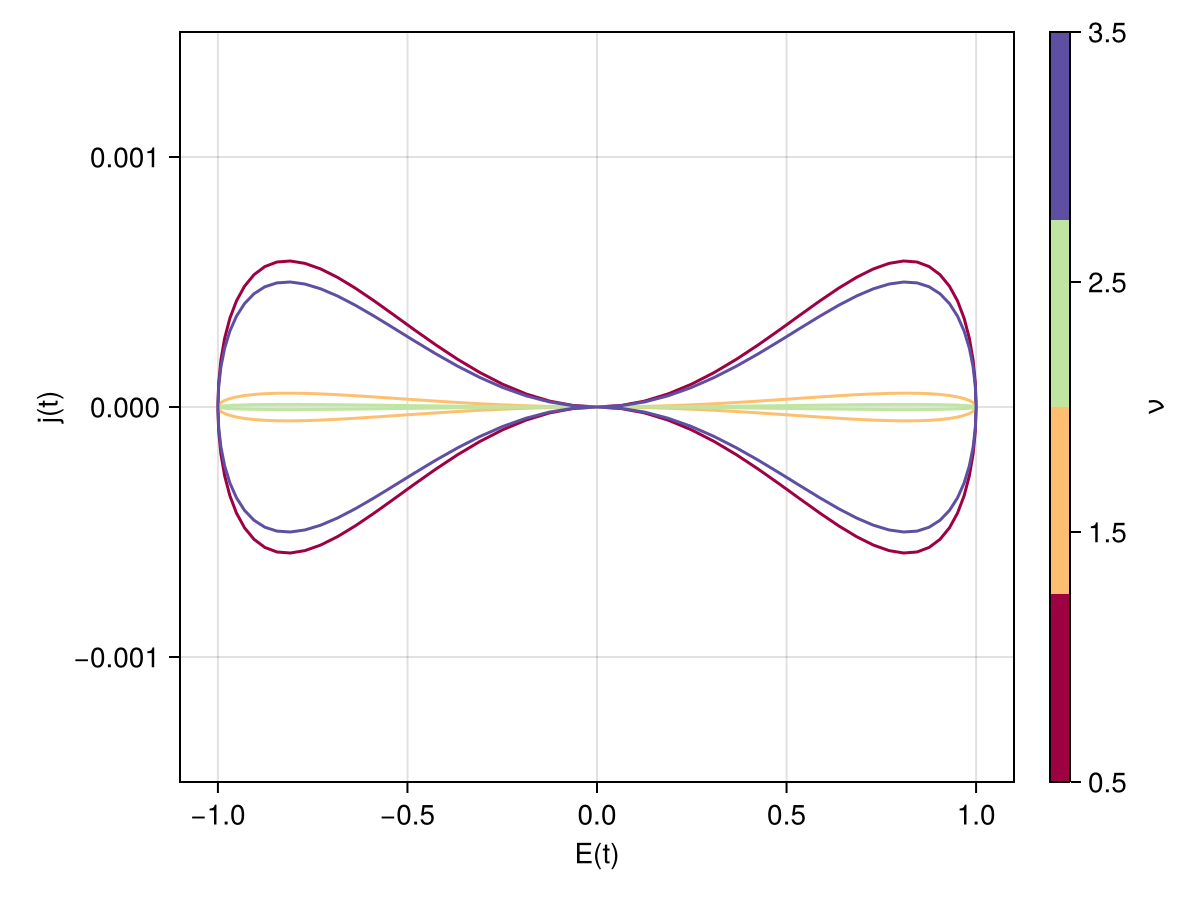

In [261]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/mr_atlas_plotters.jl")
butterflyvst(collect(0.5:1:3.5),PID,ylims = (-1,1).*0.0015)

0.5025125628140703
1.5075376884422111
2.492462311557789
3.4974874371859297


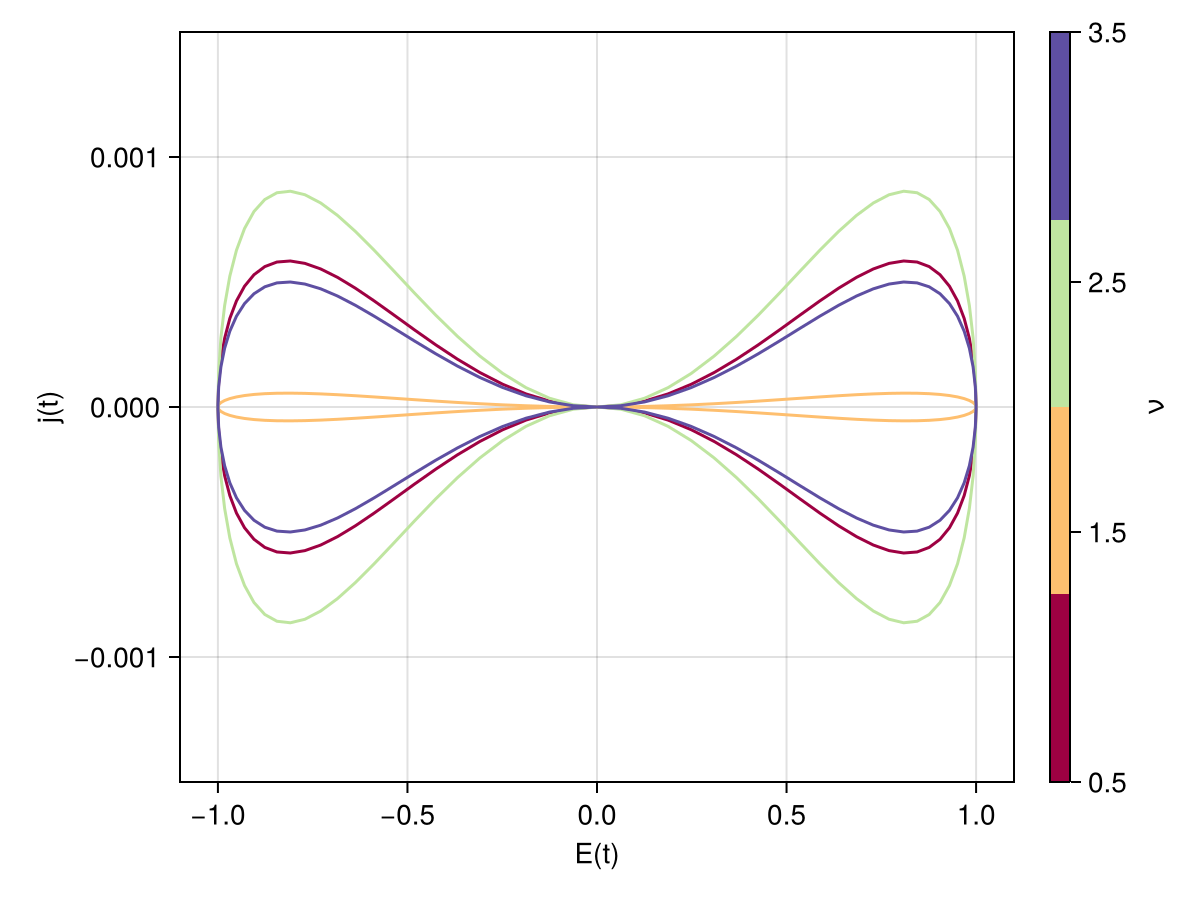

In [262]:
butterflyvst(collect(0.5:1:3.5),PID2, ylims = (-1,1).*0.0015)